In [114]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import warnings
from collections import namedtuple
import cycler
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")
warnings.filterwarnings("ignore")


# Pradonizando os plots


In [2]:
__version__ = '2022.10.04.dev1'




def install():

  
 
    plt.rcParams['figure.figsize'] = (8, 6)

   
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

   
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 10


    # foreground elements get black color explicitly
    plt.rcParams['axes.edgecolor']   = '#000000'
    plt.rcParams['text.color']       = '#000000'
    plt.rcParams['axes.labelcolor']  = '#000000'
    plt.rcParams['xtick.color']      = '#000000'
    plt.rcParams['ytick.color']      = '#000000'

    # larger fonts for better readability
    plt.rcParams['figure.titlesize'] = 24
    plt.rcParams['xtick.labelsize']  = 15
    plt.rcParams['ytick.labelsize']  = 15
    plt.rcParams['axes.labelsize']   = 16
    plt.rcParams['axes.titlesize']   = 16
    plt.rcParams['legend.fontsize']  = 13

    # serif fonts everywhere (text and math)
    
    plt.rcParams['font.family']      = 'serif'

# globals that may be useful for the user when adding other elements

install()

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style('darkgrid',{"grid.color": ".6","grid.linestyle": ":"})
sns.set_context("talk", rc={"lines.linewidth": 3})
sns.axes_style("darkgrid")
sns.husl_palette()
sns.set_palette(sns.husl_palette())

# --------------------------------------------------------


In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins.shape

(344, 7)

In [7]:
display(penguins.loc[penguins['sex'].isna()])
print(penguins.species.unique())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

['Adelie' 'Chinstrap' 'Gentoo']


#### **_Vamos avaliar nossos dados por sexo e especie para verificar qual dados podemos imputar nos NaN_**


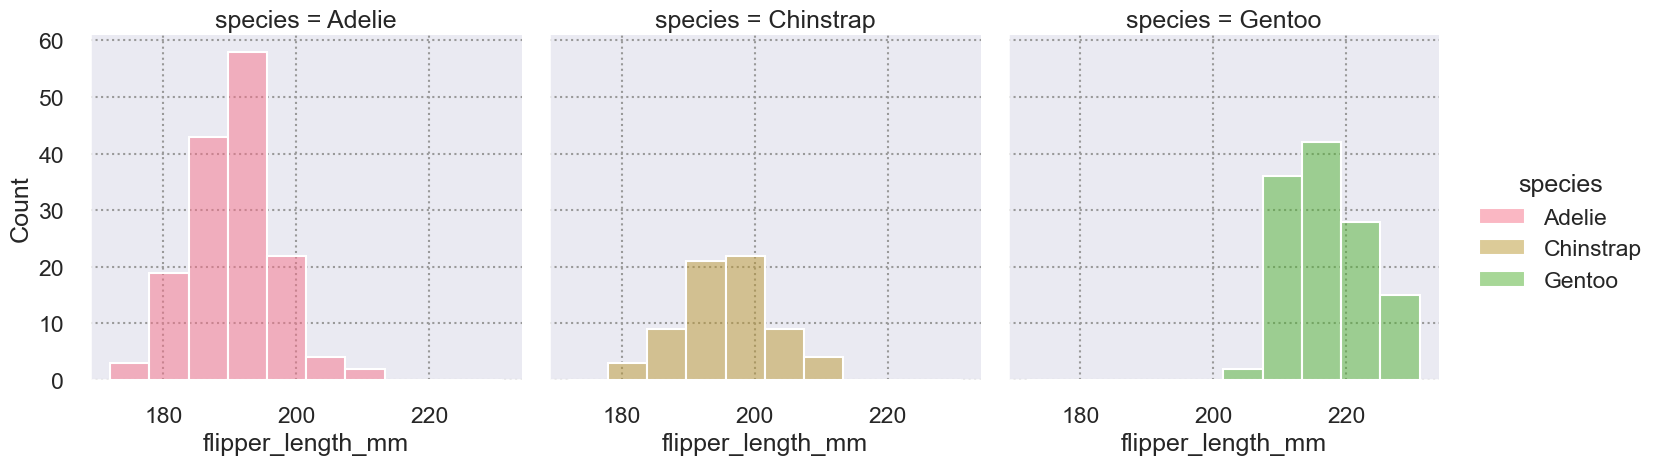

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")
plt.show()

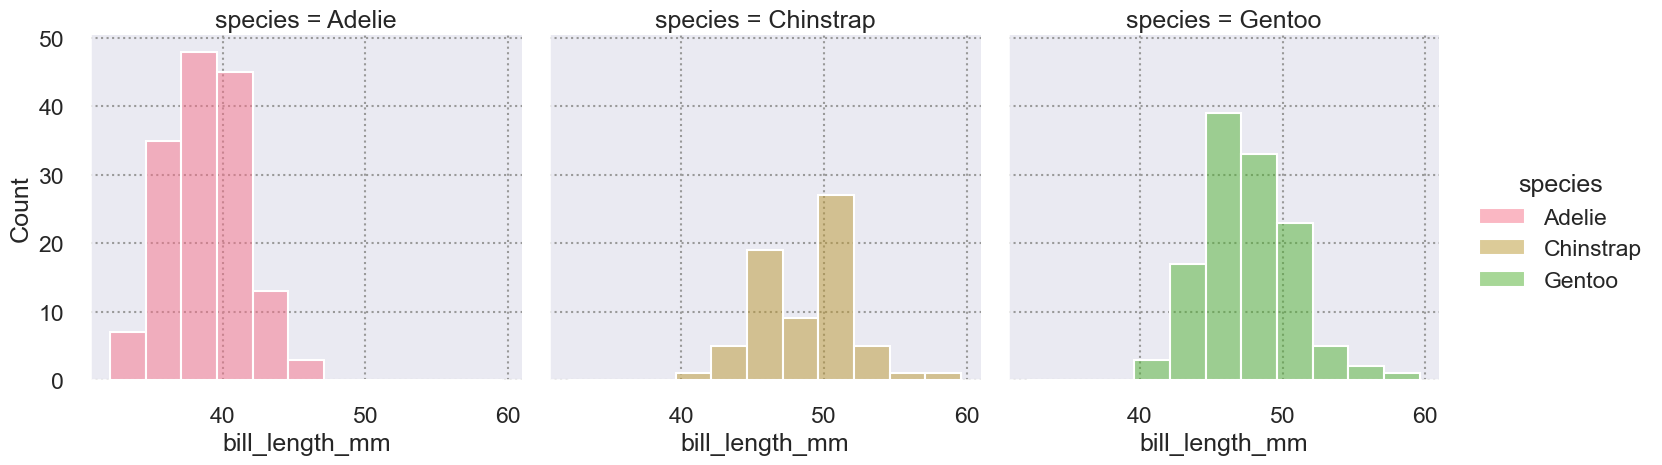

In [9]:
sns.displot(data=penguins, x="bill_length_mm", hue="species", col="species")
plt.show()

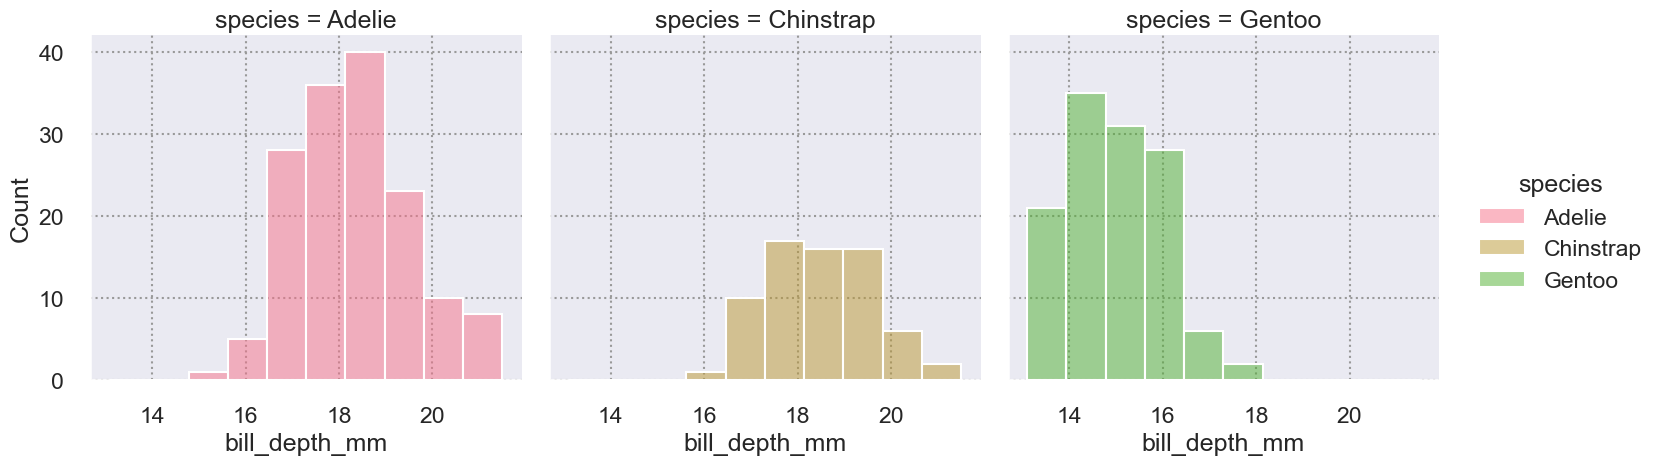

In [10]:
sns.displot(data=penguins, x="bill_depth_mm", hue="species", col="species")
plt.show()

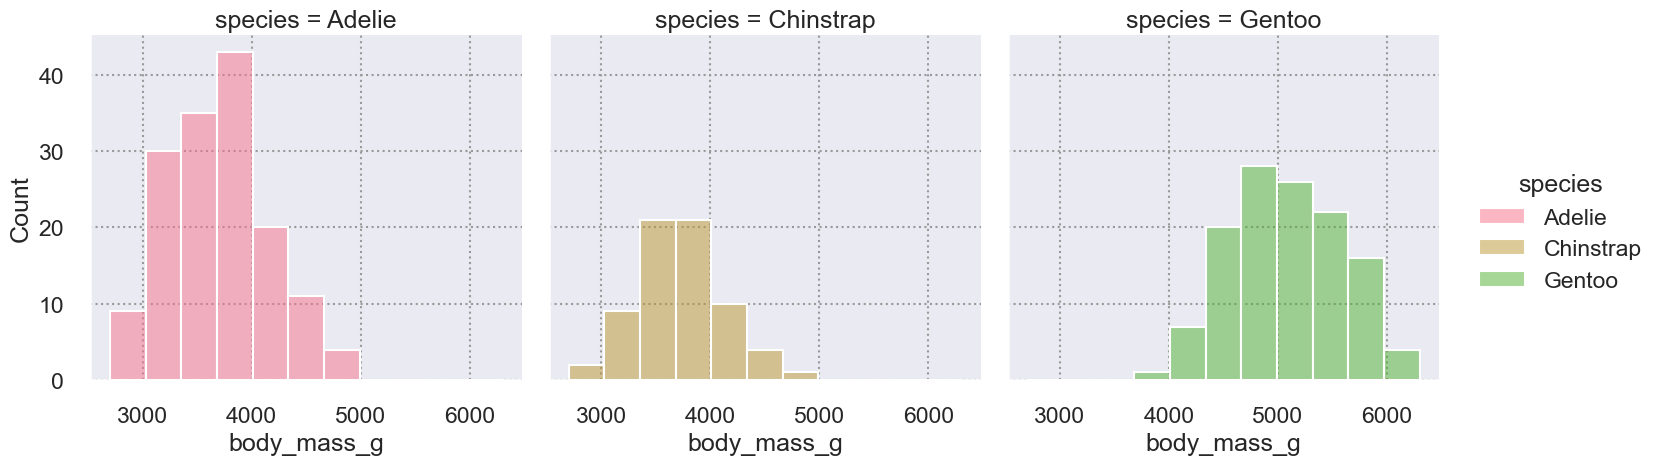

In [236]:
sns.displot(data=penguins, x="body_mass_g", hue="species", col="species")
plt.show()

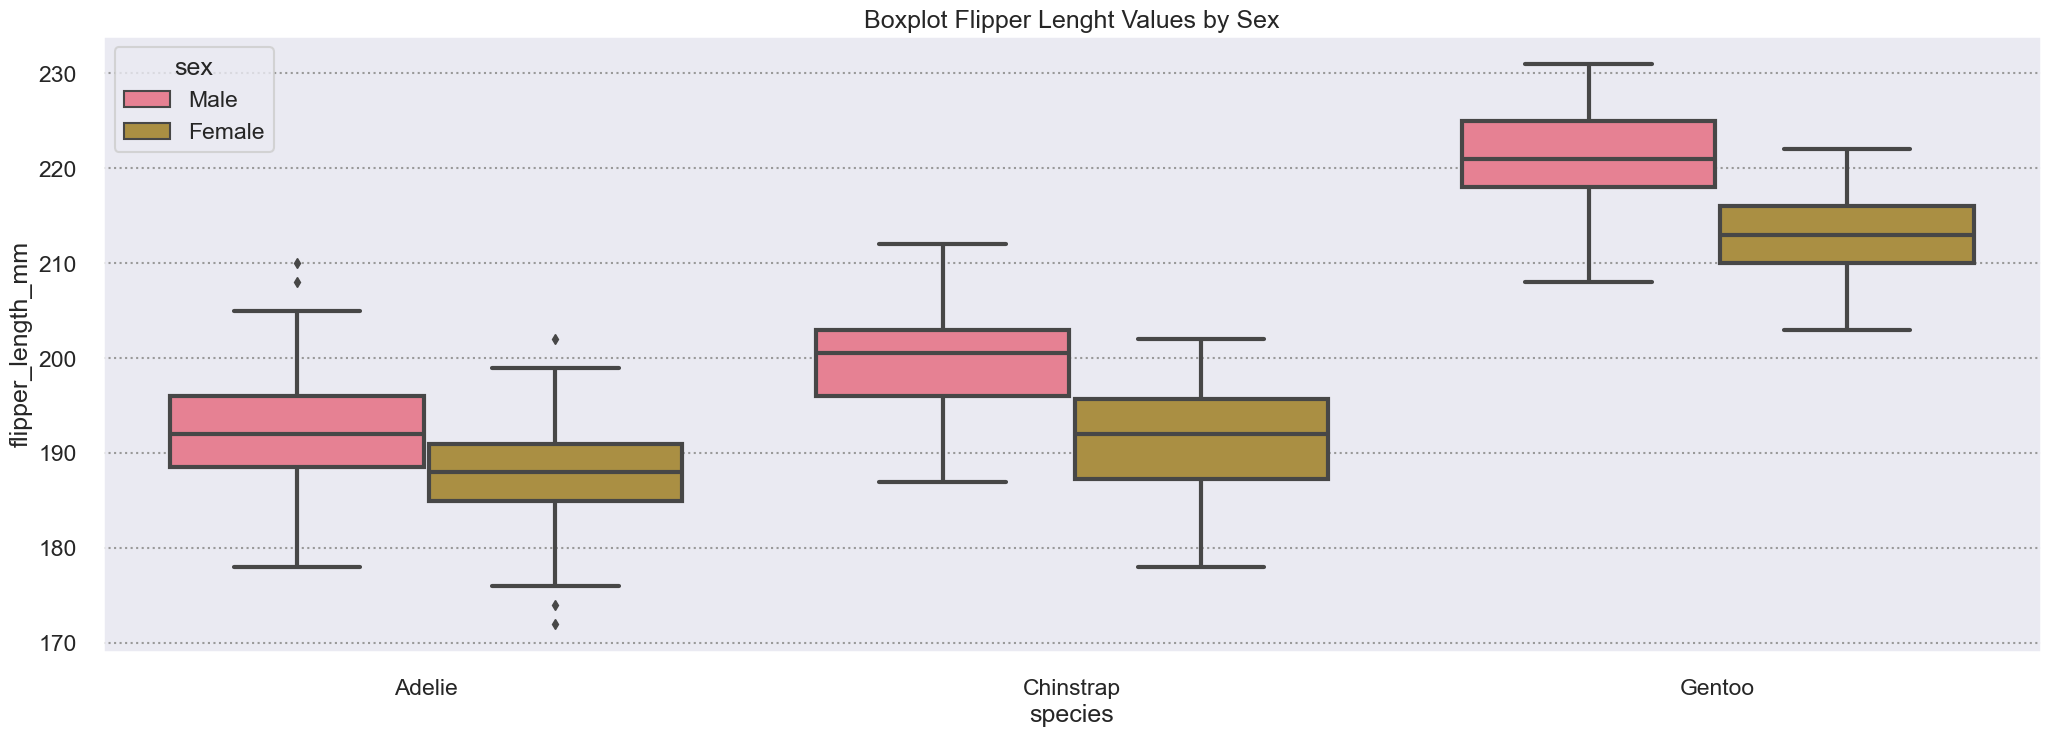

In [234]:
plt.figure(figsize=(25,8))
sns.boxplot(penguins, x='species', y='flipper_length_mm', hue='sex')
plt.title('Boxplot Flipper Lenght Values by Sex')
plt.show()

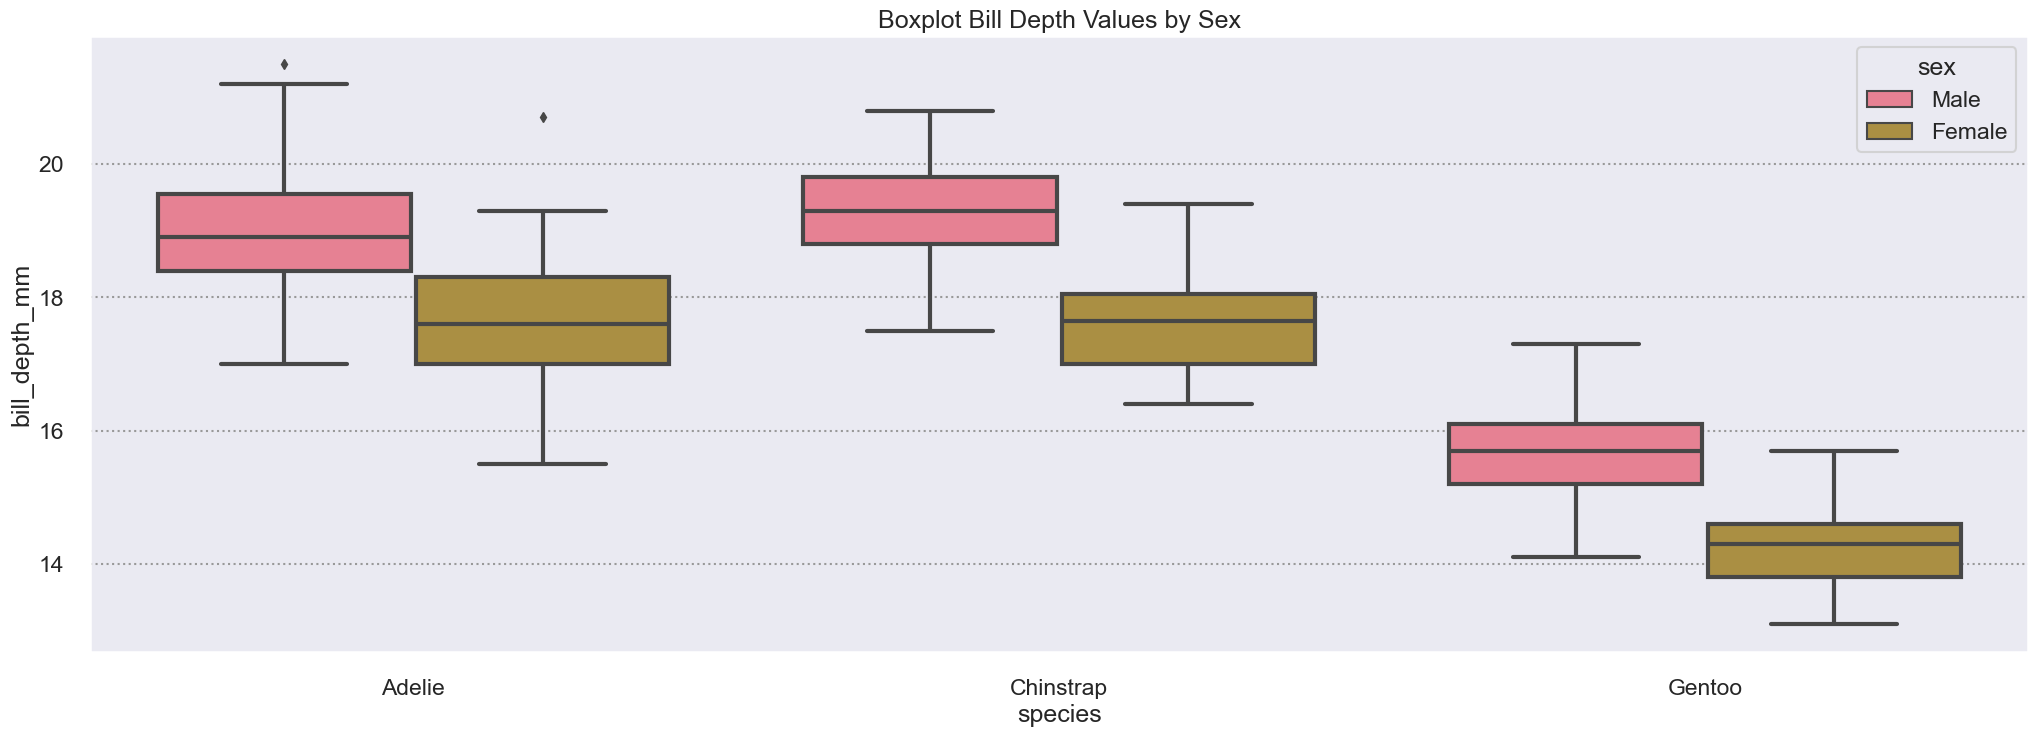

In [233]:
plt.figure(figsize=(25,8))
sns.boxplot(penguins, x='species', y='bill_depth_mm', hue='sex')
plt.title('Boxplot Bill Depth Values by Sex')
plt.show()

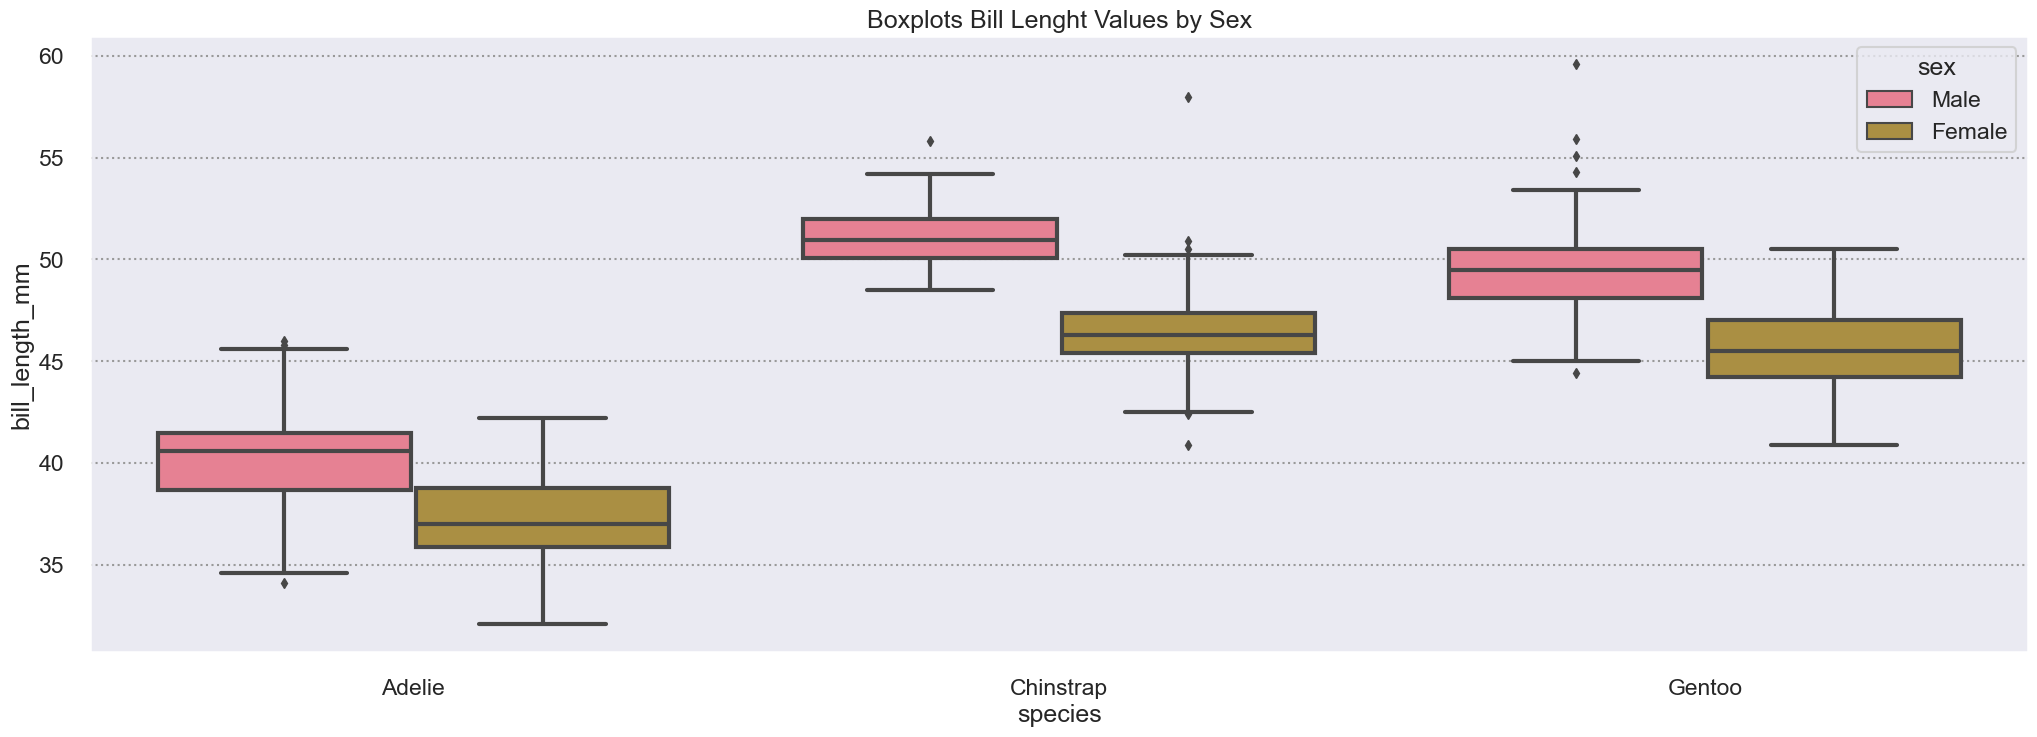

In [232]:
plt.figure(figsize=(25,8))
sns.boxplot(penguins, x='species', y='bill_length_mm', hue='sex')
plt.title('Boxplots Bill Lenght Values by Sex')
plt.show()

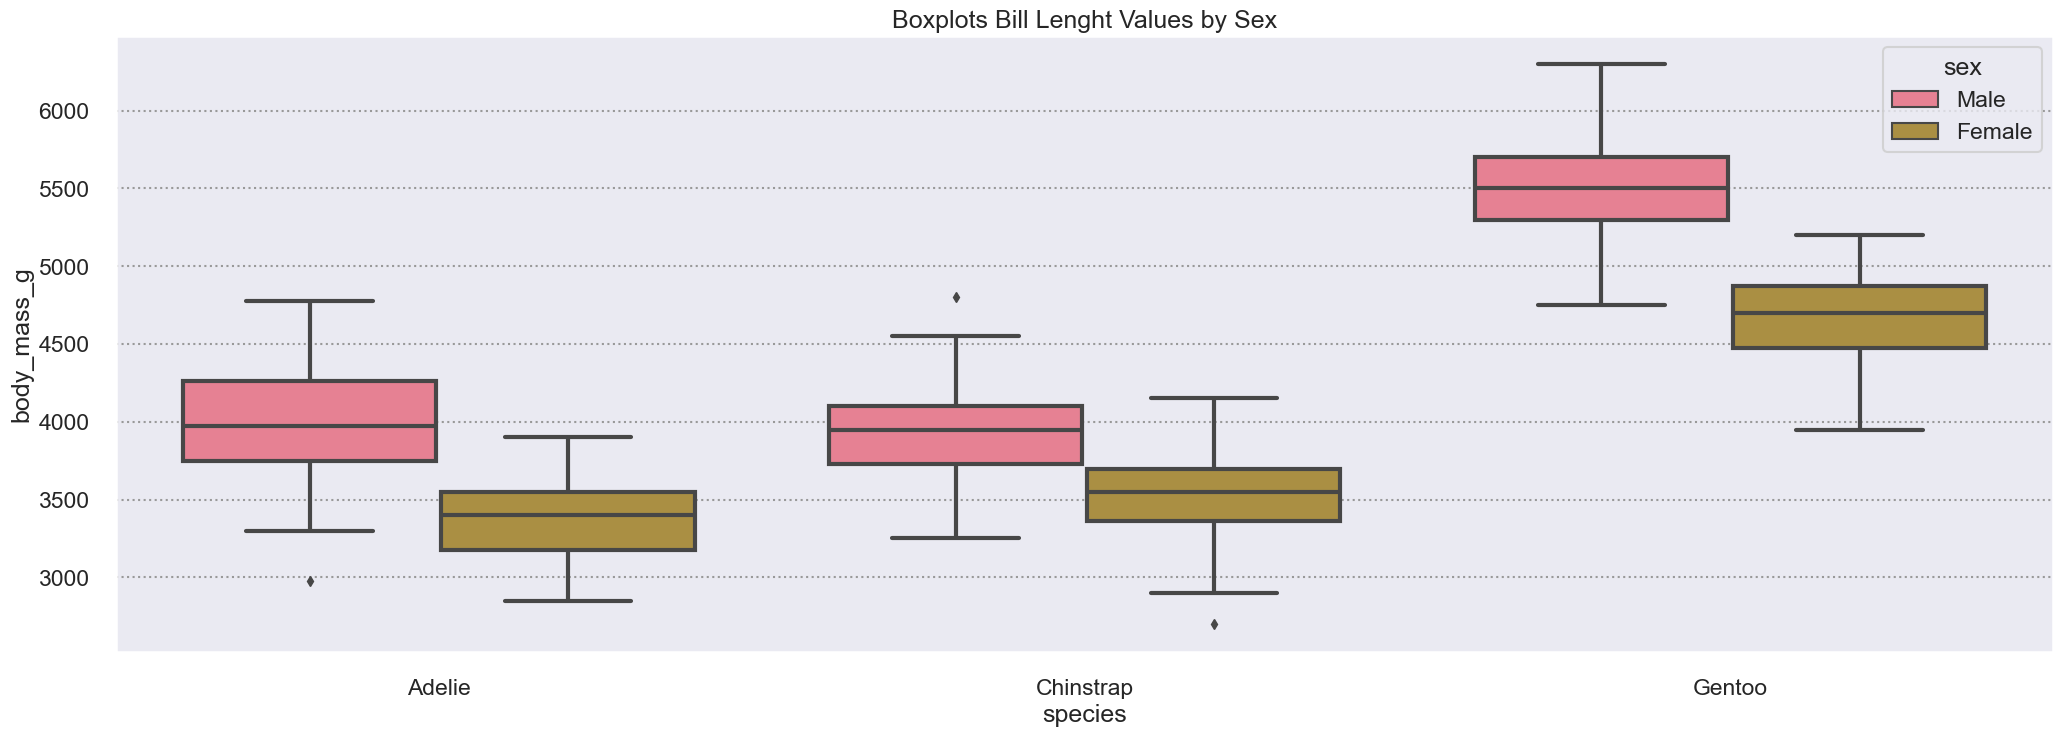

In [231]:
plt.figure(figsize=(25,8))
sns.boxplot(penguins, x='species', y='body_mass_g', hue='sex')
plt.title('Boxplots Bill Lenght Values by Sex')
plt.show()

In [243]:
penguins.groupby(by=['species','island','sex'], as_index=False)['bill_length_mm'].mean(numeric_only=True)

species     island     sex  bill_length_mm
0     Adelie     Biscoe  Female       37.359091
1     Adelie     Biscoe    Male       40.590909
2     Adelie      Dream  Female       36.911111
3     Adelie      Dream    Male       39.982759
4     Adelie  Torgersen  Female       37.554167
5     Adelie  Torgersen    Male       40.148249
6  Chinstrap      Dream  Female       46.573529
7  Chinstrap      Dream    Male       51.094118
8     Gentoo     Biscoe  Female       45.598490
9     Gentoo     Biscoe    Male       49.473770

#### Após análise pelas distribuição terem pontos concentrados em suas médias e poucos outliers, vamos imputar os valores médios para cada grupo, visto que as médias se diferem por sexo e especie


In [19]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [20]:
penguins[penguins['species'] == 'Adelie']['sex'].value_counts()

sex
Male      73
Female    73
Name: count, dtype: int64

In [21]:
penguins[penguins['species'] == 'Gentoo']['sex'].value_counts()

sex
Male      61
Female    58
Name: count, dtype: int64

In [22]:
mean_1 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_length_mm'].mean()
mean_2 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_depth_mm'].mean()
mean_3 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['flipper_length_mm'].mean()
mean_4 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['body_mass_g'].mean()

In [23]:
mean_5 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_length_mm'].mean()
mean_6 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_depth_mm'].mean()
mean_7 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['flipper_length_mm'].mean()
mean_8 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['body_mass_g'].mean()

In [24]:
penguins.loc[penguins['species'] == 'Adelie', 'sex'] = penguins.loc[penguins['species'] == 'Adelie', 'sex'].fillna('Male')

penguins.loc[penguins['species'] == 'Gentoo', 'sex'] = penguins.loc[penguins['species'] == 'Gentoo', 'sex'].fillna('Female')

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'].fillna(mean_1)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'].fillna(mean_2)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'].fillna(mean_3)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'].fillna(mean_4)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'].fillna(mean_5)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'].fillna(mean_6)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'].fillna(mean_7)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'].fillna(mean_8)

In [25]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


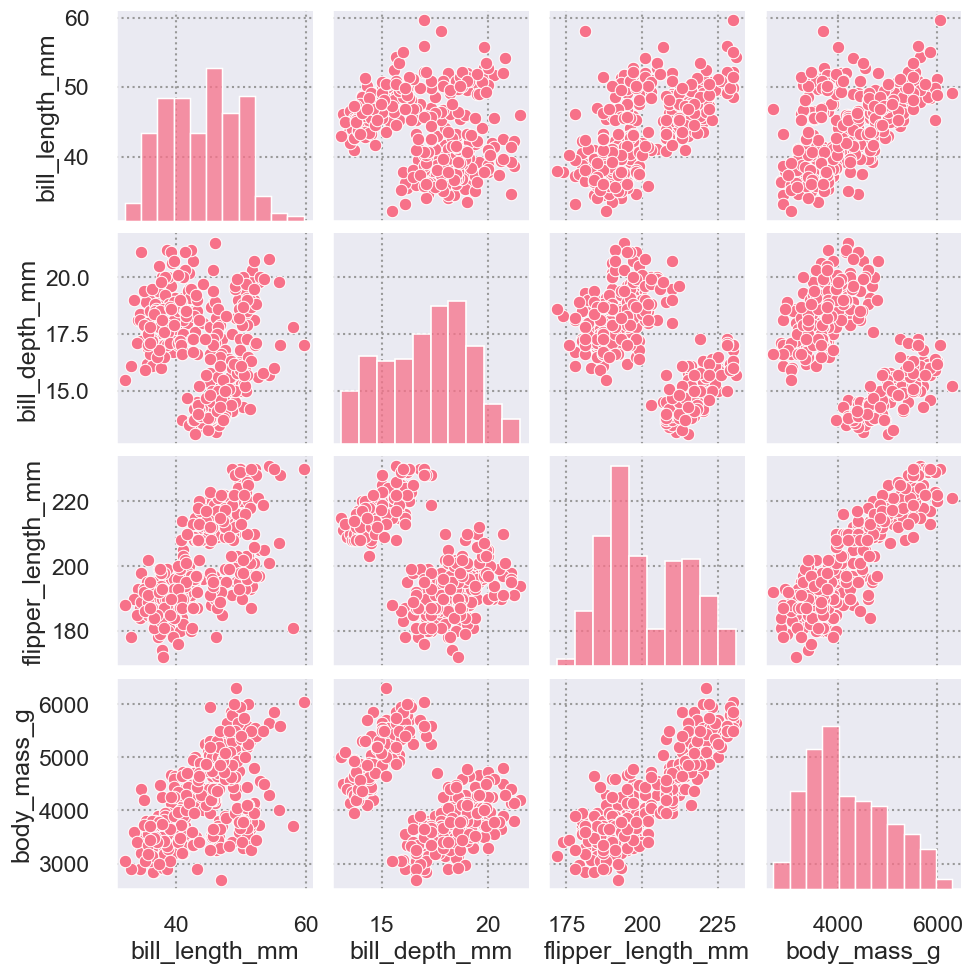

In [237]:
sns.pairplot(penguins)

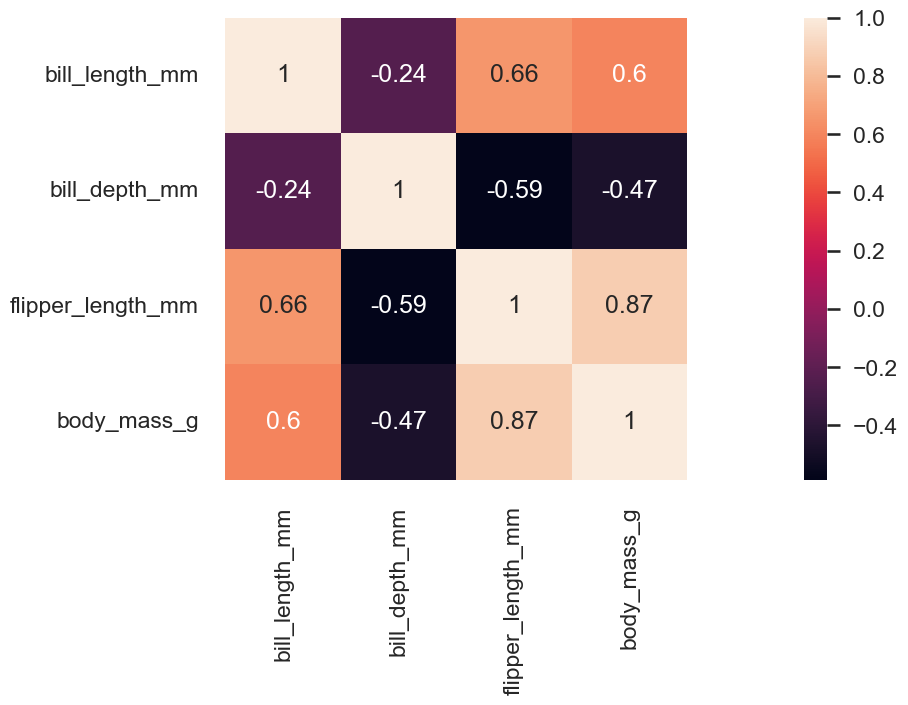

In [242]:
comrat = penguins.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(30, 6))
_ = sns.heatmap(comrat, square=True, annot=True)
plt.show()

In [27]:
df = penguins.copy()

# **_ESTATÍSTICA - PROBABILIDADES, INFERÊNCIAS E REGRESSÕES - UM ESTUDO DE TEORIAS E APLICABILIDADE COM BIBLIOTECAS PYTHON_**

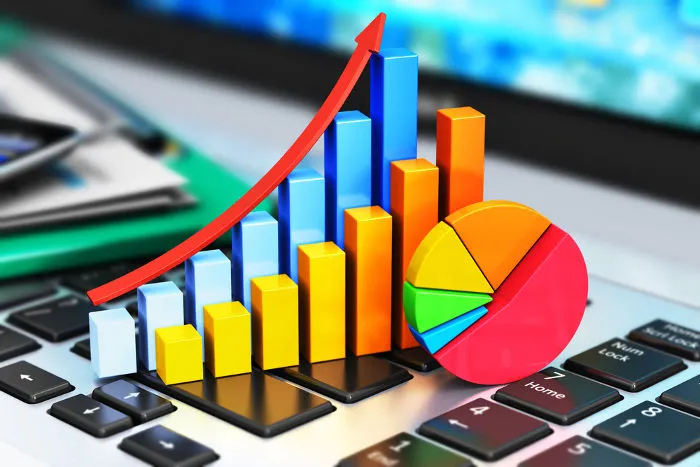


# Estatísticas Bases - são **TESTES** bases que utilizamos em quase todas inferências e análises probabililísticas, aqui vai um resumo:

### Teste de Shapiro-Wilk

O teste de Shapiro-Wilk verifica se uma amostra segue uma distribuição normal. A hipótese nula ($H_0$) e alternativa ($H_1$) são:

- $H_0$: A amostra segue uma distribuição normal.
- $H_1$: A amostra não segue uma distribuição normal.

### Teste de Levene

O teste de Levene verifica a igualdade de variâncias entre duas ou mais amostras. A hipótese nula ($H_0$) e alternativa ($H_1$) são:

- $H_0$: As variâncias são iguais entre os grupos.
- $H_1$: Pelo menos uma das variâncias é diferente.

### Teste de Durbin-Watson

O teste de Durbin-Watson verifica a presença de autocorrelação em séries temporais ou dados de painel. Ele avalia a hipótese nula ($H_0$) de que não há autocorrelação nos erros:

- $H_0$: Não há autocorrelação nos erros.
- $H_1$: Existe autocorrelação nos erros.

### Teste de Jarque-Bera

O teste de Jarque-Bera verifica se uma amostra tem a assimetria e curtose que se espera de uma distribuição normal. As hipóteses são:

- $H_0$: A amostra vem de uma distribuição normal.
- $H_1$: A amostra não vem de uma distribuição normal.

### Teste de Correlação Pearson

O teste de correlação de Pearson avalia a relação linear entre duas variáveis contínuas. Ele testa a hipótese nula ($H_0$) de que não há correlação linear entre as variáveis:

- $H_0$: Não há correlação linear entre as variáveis.
- $H_1$: Existe correlação linear entre as variáveis.

### Teste de Correlação Spearman

O teste de correlação de Spearman avalia a relação monotônica entre duas variáveis, não necessariamente lineares. Ele testa a hipótese nula ($H_0$) de que não há correlação monotônica entre as variáveis:

- $H_0$: Não há correlação monotônica entre as variáveis.
- $H_1$: Existe correlação monotônica entre as variáveis.


---


# Probabilidades


In [28]:
#Frequência Absoluta de Espécies, Ilhas e Sexo

species_abs_freq = df.species.value_counts()
island_abs_freq = df.island.value_counts()
sex_abs_freq = df.sex.value_counts()


print((species_abs_freq))
print((island_abs_freq))
print((sex_abs_freq))


print(f'Por exemplo a frequência absoluta de Adelie: {species_abs_freq[0]}  e a frequência absoluta de Biscoe: {island_abs_freq[0]}')


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
Male      174
Female    170
Name: count, dtype: int64
Por exemplo a frequência absoluta de Adelie: 152  e a frequência absoluta de Biscoe: 168


A frequência relativa \( $f_i$ \) para a categoria \( $i$ \) é calculada como:

$$
f_i = \frac{\text{Número de ocorrências da categoria } i}{\text{Número total de observações}}
$$


In [29]:
# Frequências relativas 

species_rel_freq = df.species.value_counts()/len(df)*100
island_rel_freq = df.island.value_counts()/len(df)*100
sex_rel_freq = df.sex.value_counts()/len(df)*100

print((species_rel_freq))
print((island_rel_freq))
print((sex_rel_freq))

species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: count, dtype: float64
island
Biscoe       48.837209
Dream        36.046512
Torgersen    15.116279
Name: count, dtype: float64
sex
Male      50.581395
Female    49.418605
Name: count, dtype: float64


# Probabilidades

### Fórmulas de Probabilidade Básicas

1. **Probabilidade de um evento:**
   $$ P(A) $$

2. **Probabilidade condicional:**
   $$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

3. **Probabilidade da união de dois eventos (Regra da Soma):**
   $$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $$

4. **Probabilidade da interseção de dois eventos (Regra da Multiplicação):**
   $$ P(A \cap B) = P(A | B) \cdot P(B) $$

5. **Probabilidade da Soma de Eventos Mutuamente Exclusivos**

Para eventos mutuamente exclusivos $A$ e $B$, onde $A \cap B = \emptyset$, a probabilidade da união dos eventos é simplesmente a soma das probabilidades individuais:

$$ P(A \cup B) = P(A) + P(B) $$

6. **Probabilidade do Produto de Eventos Independentes**

Para eventos independentes $A$ e $B$, a probabilidade da interseção dos eventos é o produto das probabilidades individuais:

$$ P(A \cap B) = P(A) \cdot P(B) $$

### Regras da Soma e Interseção

- **Regra da Soma:** Para calcular a probabilidade da união de dois eventos $A$ e $B$, devemos somar as probabilidades dos eventos individuais e subtrair a probabilidade da interseção, para evitar a duplicação da probabilidade dessa interseção.

- **Regra da Interseção:** Para calcular a probabilidade da interseção de dois eventos $A$ e $B$, multiplicamos a probabilidade condicional de $A$ dado $B$ pela probabilidade de $B$. Isso ocorre porque a probabilidade de ambos os eventos ocorrerem ao mesmo tempo é equivalente à probabilidade de $A$ ocorrer dado que $B$ já ocorreu, multiplicado pela probabilidade de $B$ ocorrer inicialmente.

Essas fórmulas e regras são fundamentais na teoria da probabilidade e são amplamente utilizadas para calcular e interpretar probabilidades de eventos e suas interações em contextos estatísticos e analíticos.

### Teorema dos Grandes Números (TGN)

O Teorema dos Grandes Números afirma que, conforme o tamanho da amostra aumenta, a média das amostras tende a se aproximar da média populacional. A forma mais comum do TGN é dada por:

$$ \bar{X}\_n \xrightarrow{p} \mu $$

Onde:

- $\bar{X}_n$ é a média amostral de uma amostra de tamanho $n$.
- $\mu$ é a média populacional.

**Significado:**
O TGN é fundamental na teoria da probabilidade e estatística. Ele indica que, à medida que aumentamos o tamanho da amostra, a média das amostras (a média amostral) ou lê-se, a probabilidade esperada ou esperança estatística, converge para o valor populacional verdadeiro. Em outras palavras, quanto maior a amostra, mais preciso será a média amostral representa a média verdadeira da população.


In [30]:
#Probabilidade Soma 

#Probabilidade de se escolher um pinguim da ilha Biscoe ou de Dream - eventos mutuamente exclusivos
#seguindo - basta somar as freq relativas de Biscoe e Dream
proba_soma_excl = island_rel_freq[0] + island_rel_freq[1]

#Probabilidad de se escolher um pinguim da espécie Adelie ou Fêmea - eventos podem ocorrer juntos
prob_interseccao = len(df.loc[(df['species'] == 'Adelie') & (df['sex'] == 'Female')]['species'])
proba_soma = (species_rel_freq[0]/100 + sex_rel_freq[1]/100) - prob_interseccao

#Probabilidade de se escolher um pinguim de Torgesen e ser Macho e ser da especie Adelie - são eventos independentes, ao se escolher alguma deles as probabilidade de laplace das próximas não se alteram
prob_produto_ind = (island_rel_freq[2]/100 * sex_rel_freq[0]/100 * species_rel_freq[0]/100)*100



print(f'A probabilidade 1:  {proba_soma_excl:,.2F}')
print(f'A probabilidade 2:  {proba_soma:,.2F}')
print(f'A probabilidade 3:  {prob_produto_ind:,.2F}')

A probabilidade 1:  84.88
A probabilidade 2:  -72.06
A probabilidade 3:  3.38


---


# Antes de entrarmos no próximo bloco, deixe-me mostrar uma importante tabela de métodos que podemos invocar ao chamar funções de probabilidade do Scipy

Os métodos, para qualquer distribuição de probabilidade são:

**_Salvo que as probabilidades por ponto em VA contínuas se dará por "pdf()"_**

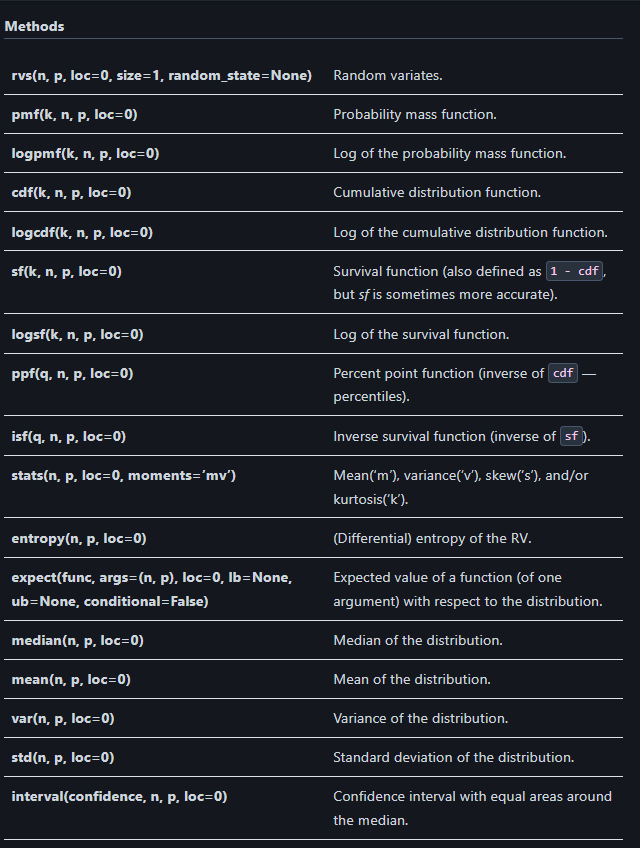


---


# _Distribuição de Variáveis Aleatórias Discretas_

## Variáveis aleatórias são valores resultantes de funções de $x$

Dados discretos são dados provenientes de contagens, portanto, são dados que tomam valores em um espaço finito, como a quantidade de filhos ou quantidade de celular vendido.

Os mais famosos são a Distribuição Binomial e Poisson

## Binomial dado por

É a probabilidade de dada quantidade de sucessos ocorrerem em n eventos cujas probabilidades são mutuamente exclusivas e que possuem probabilidade de sucesso e fracasso fixas em todas as tentativas

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de sucessos.
- \( $k$ \): número de sucessos desejados.
- \( $n$ \): número total de tentativas.
- \( $p$ \): probabilidade de sucesso em cada tentativa.
- \( $\binom{n}{k}$ \): coeficiente binomial, o número de combinações de \( $n$ \) elementos tomados \( $k$ \) de cada vez.

### Esperança (Valor Esperado) da Distribuição Binomial

A esperança \( $E(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição binomial \( $\text{Binomial}(n, p)$ \), onde \( $n$ \) é o número de tentativas e \( $p$ \) é a probabilidade de sucesso em cada tentativa, é dada por:

$$
E(X) = n \cdot p
$$

### Variância da Distribuição Binomial

A variância \( $\text{Var}(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição binomial \( $\text{Binomial}(n, p)$ \) é dada por:

$$
\text{Var}(X) = n \cdot p \cdot (1 - p)
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de sucessos.
- \( $n$ \): número total de tentativas.
- \( $p$ \): probabilidade de sucesso em cada tentativa.

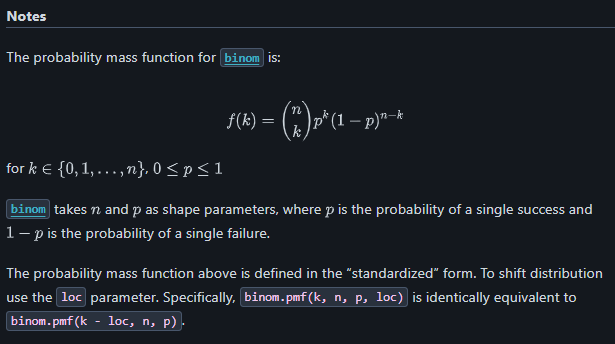

## Poisson dados por

É a probabilidade de n eventos ocorrerem um espaço de tempo dado a uma média de tais eventos em um período de tempo

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Onde:

- \( $k$ \): número de ocorrências do evento.
- \( $\lambda$ \): taxa média de ocorrências do evento por unidade de tempo ou espaço.
- \( $e$ \): base do logaritmo natural (aproximadamente \( $2.71828$ \)).
- \( $k!$ \): fatorial de \( $k$ \), o produto de todos os inteiros de 1 a \( $k$ \).

### Esperança (Valor Esperado) da Distribuição de Poisson

A esperança \( $E(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição de Poisson com parâmetro \( $\lambda$ \) é dada por:

$$
E(X) = \lambda
$$

### Variância da Distribuição de Poisson

A variância \( $\text{Var}(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição de Poisson com parâmetro \( $\lambda$ \) é dada por:

$$
\text{Var}(X) = \lambda
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de ocorrências de um evento.
- \( $\lambda$ \): parâmetro da distribuição de Poisson, que representa a taxa média de ocorrências do evento por unidade de tempo ou espaço.

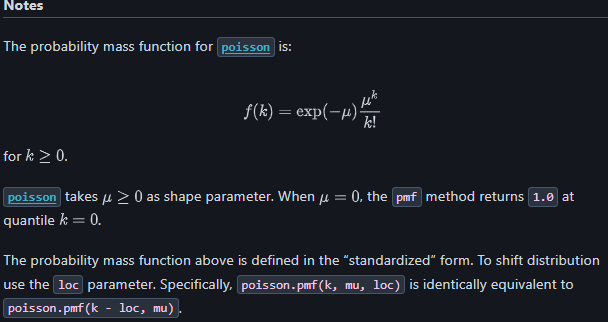

Mais em https://docs.scipy.org/doc/scipy/reference/stats.html


Para essas distribuições vamos usar a biblioteca do Scipy do Python para acessar métodos e funções que vão nos auxiliar


In [31]:
import scipy.stats as st

### Binomial


In [32]:
## no pacote scipy a chamada é st.binom  e usando o método pmf() para calcular probabilidade de pontos ou cdf() para acumulativas
# chamamos mean() para a média da binom e interval() para o intervalo de confiança

#Vamos demonstrar 3 cenários: 
#1 - Probabilidade de em 100 espécimes, 5 serem Adelie
#2 - Probabilidade de em 100 espécimes, pelo menos 60 serem Adelie
#3 - Construir gráficamente a distribuição para todas opção em 100 tentativas e modelando a média e intervalo de confiança

#chamamos o método pmf() para calcular probabilidades de ponto
#o método cdf() ajuda a calcular a probabilidade acumulada até certo ponto
#intervalos nos mostram qual a quantidade de eventos teremos 95% das nossas probabilidades
prob_ponto_binom = st.binom.pmf(5, 100, 0.4418)
prob_acum_binom = st.binom.cdf(60,100, 0.4418)
conf = st.binom.interval(0.95,100,0.4418)
media_binom = st.binom.mean(100, 0.4418)

print(f'Probabilidade de se escolher um pinguim da espécime Adelie: {species_rel_freq[0]:,.2F}%')
print(f'Probabilida 1: {prob_ponto_binom:,.2%}')
print(f'Probabilida 2: {prob_acum_binom:,.2%}')
print(f'Intervaldo de Confiança: {conf}')
print(f'Média: {media_binom}')

Probabilidade de se escolher um pinguim da espécime Adelie: 44.19%
Probabilida 1: 0.00%
Probabilida 2: 99.95%
Intervaldo de Confiança: (35.0, 54.0)
Média: 44.18


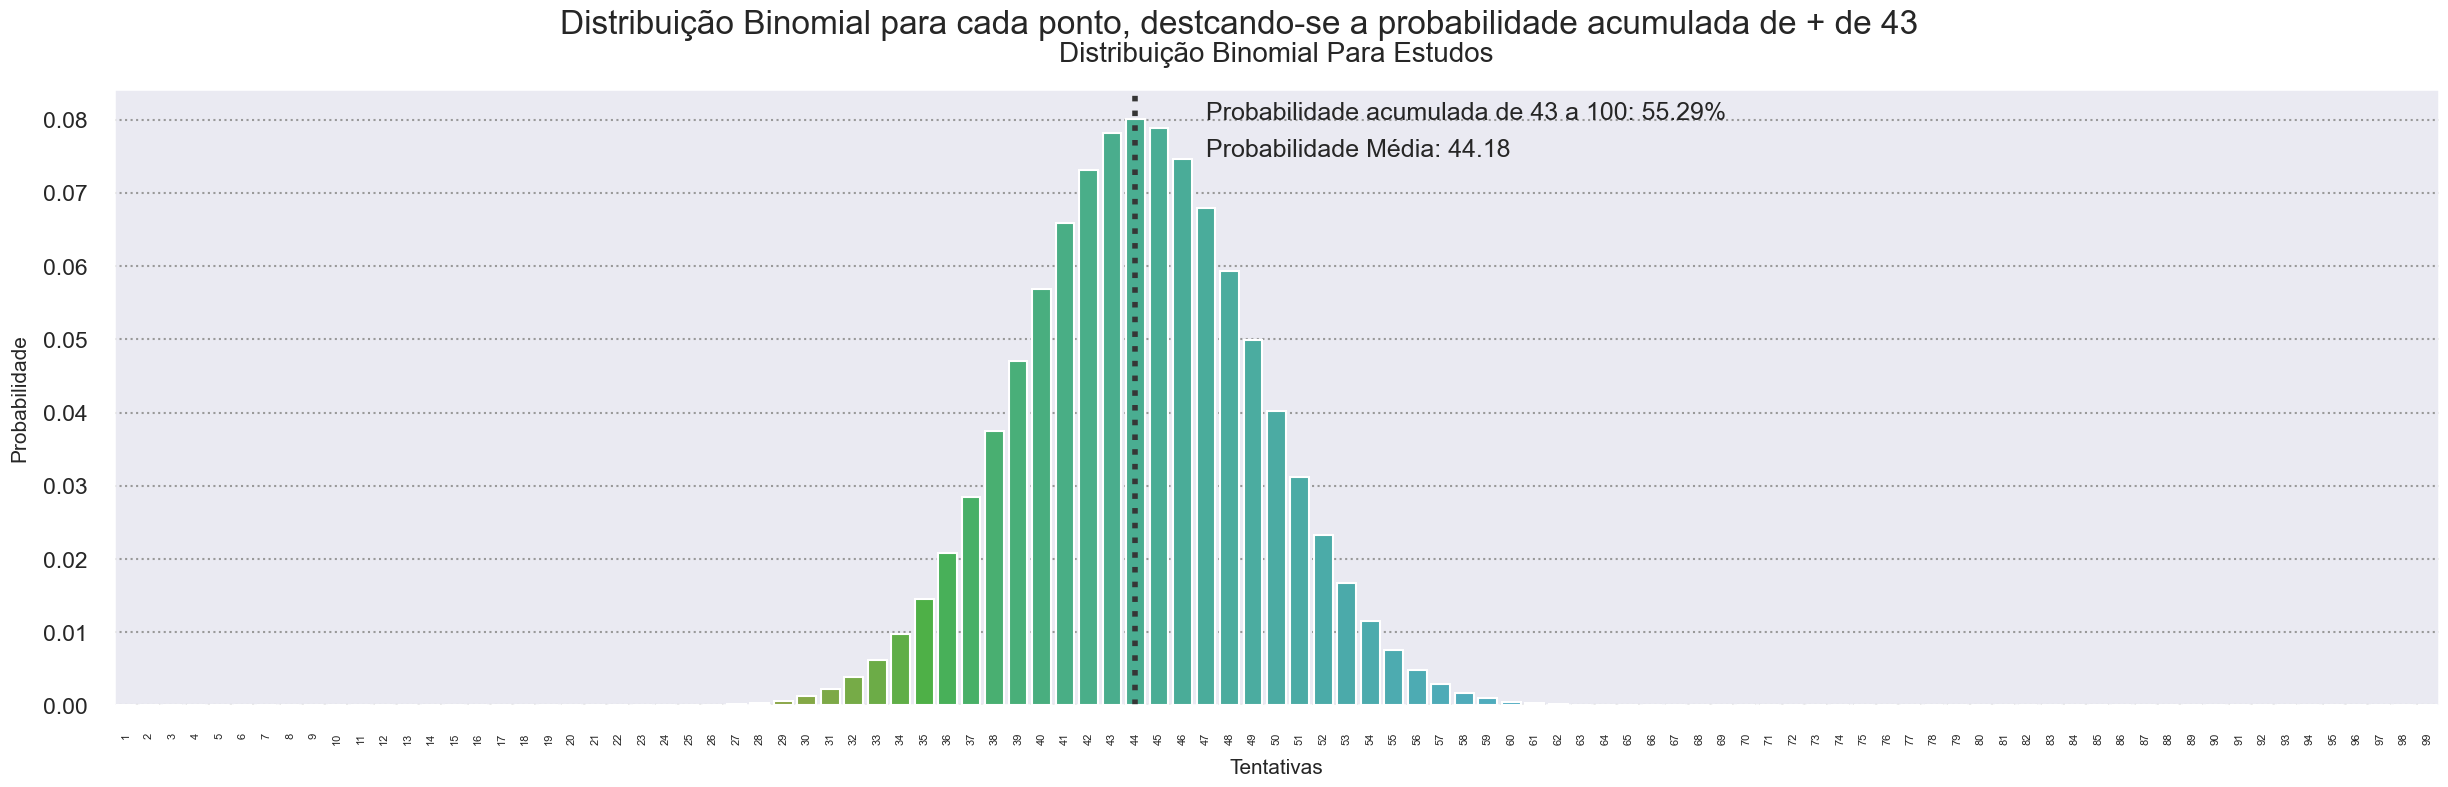

In [229]:
## Distribuição

lista_prob_binom = []
lista_rep = list(range(1,100,1))
for i in lista_rep:
    value = st.binom.pmf(i, 100, 0.4418)
    lista_prob_binom.append(value)

dict = {'Probabilidades' : lista_prob_binom,
        'Tentativas': lista_rep}
df_binom = pd.DataFrame(dict)

plt.figure(figsize=(30,8))
sns.barplot(df_binom, x=df_binom['Tentativas'], y=df_binom['Probabilidades'])
plt.title('Distribuição Binomial Para Estudos', fontsize=20, pad=20)
plt.suptitle('Distribuição Binomial para cada ponto, destcando-se a probabilidade acumulada de + de 43')
plt.xlabel(xlabel='Tentativas', labelpad=10, fontsize=15)
plt.ylabel(ylabel='Probabilidade', labelpad=10, fontsize=15)
plt.axvline(43, linestyle=':',linewidth=4, color='#363636')
plt.xticks(rotation=90, fontsize=8)
plt.annotate(f'Probabilidade acumulada de 43 a 100: {(1-st.binom.cdf(43,100,0.4418)):,.2%}',xy=(45,0.08), xytext=(46,0.08))
plt.annotate(f'Probabilidade Média: {100*0.4418:,.2F}',xy=(45,0.075), xytext=(46,0.075))
plt.show()

### Poisson


In [34]:
#No scipy chamamos a função poisson() e seus métodos

#Em média em cada hora 10 pinguim são capturados
#Em média em cada hora 15 pinguins são capturados
#Em média em cada hora 25 pinguins são capturados

#chamamos o método pmf() para calcular probabilidades de ponto
#o método cdf() ajuda a calcular a probabilidade acumulada até certo ponto
#intervalos nos mostram qual a quantidade de eventos teremos 95% das nossas probabilidades
prob_ponto_poison = st.poisson.pmf(8, 10)
prob_acum_poisson = st.poisson.cdf(8,10)
confianca = st.poisson.interval(0.95, 10)
media = st.poisson.mean(10)

print(f'Probabilidad de no primeiro caso onde a média é de 10 pnguins por hora, qual a probabilidade de exatamente 8 serem capturados: {prob_ponto_poison:,.2%}')
print(f'Probabilidade de até 8 pinguins serem capturados com lambda sendo 10: {prob_acum_poisson:,.2%}')
print(f'Intervalo de Confiança: {confianca}')
print(f'Média Probabilidade: {media}')

Probabilidad de no primeiro caso onde a média é de 10 pnguins por hora, qual a probabilidade de exatamente 8 serem capturados: 11.26%
Probabilidade de até 8 pinguins serem capturados com lambda sendo 10: 33.28%
Intervalo de Confiança: (4.0, 17.0)
Média Probabilidade: 10.0


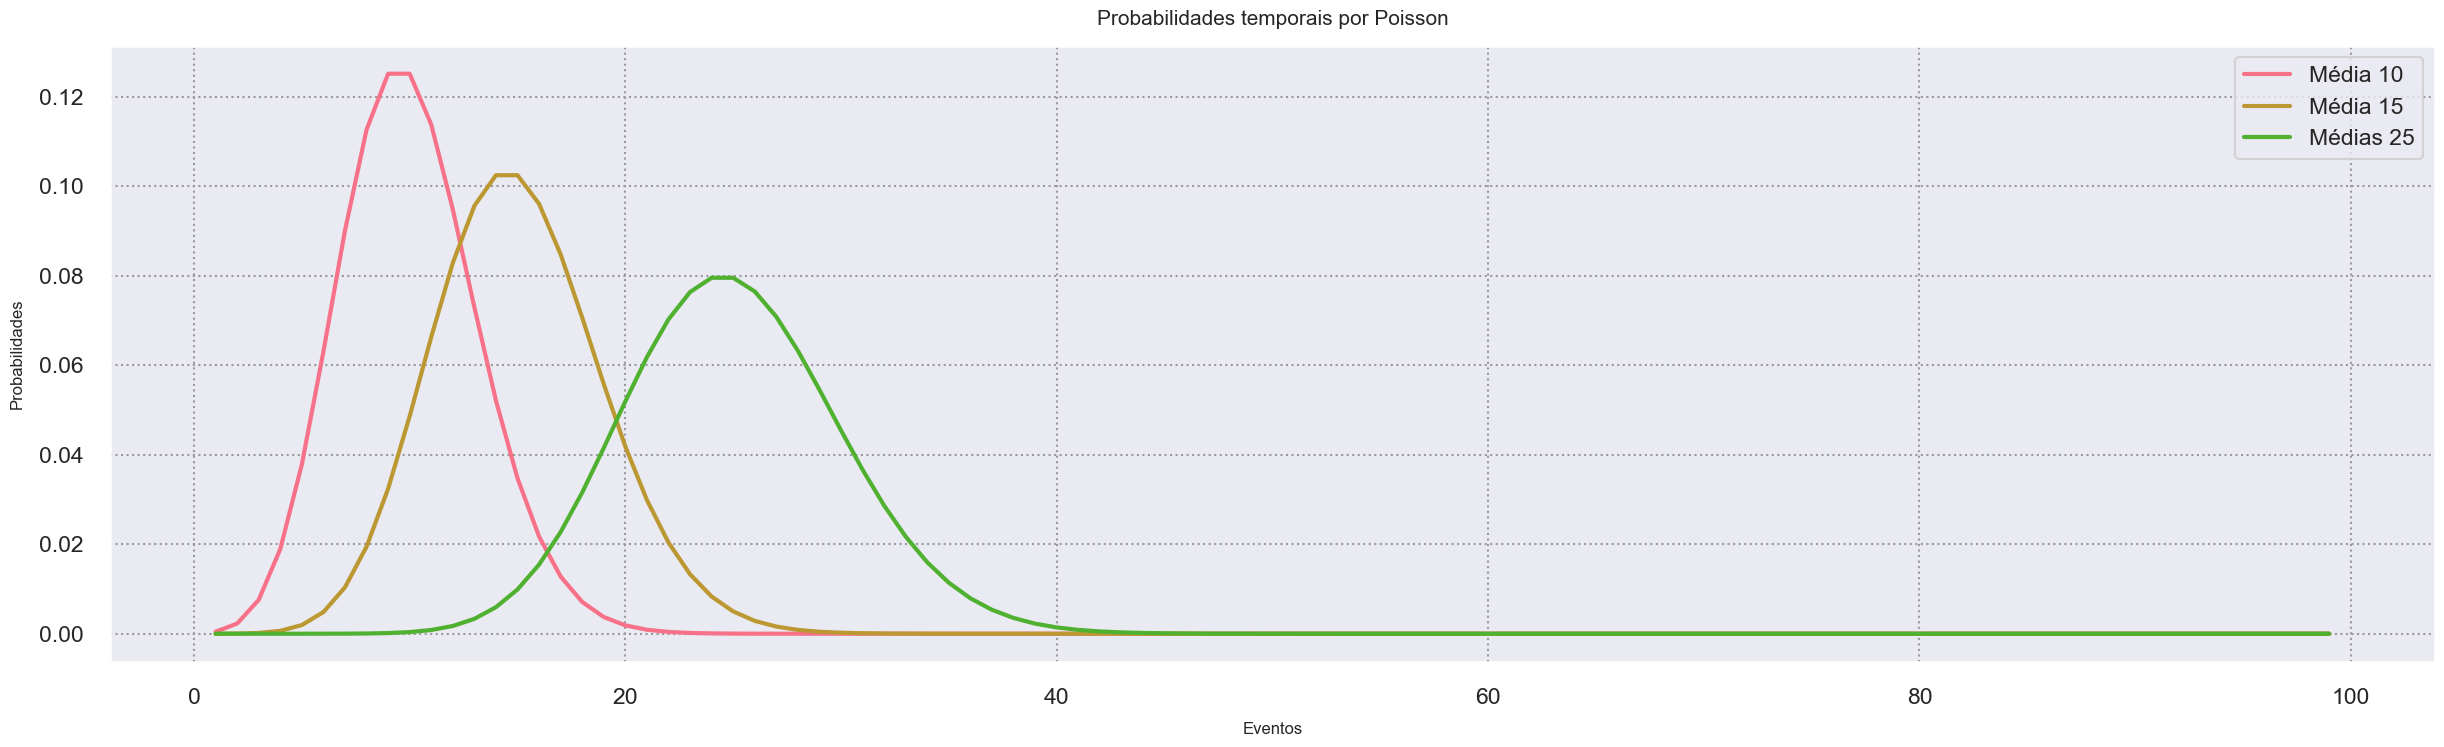

In [228]:
##Plotando as distribuições de cada possibilidade

f1 = []
f2 = []
f3 = []

lista_rep2 = list(range(1,100,1))
for i in lista_rep2:
    value = st.poisson.pmf(i,10)
    f1.append(value)
for i in lista_rep2:
    value = st.poisson.pmf(i,15)
    f2.append(value)
for i in lista_rep2:
    value = st.poisson.pmf(i,25)
    f3.append(value)

dict = {'Tentativas':lista_rep2,
        'Prob10':f1,
        'Prob15':f2,
        'Prob25':f3}

df_poisson = pd.DataFrame(dict)

plt.figure(figsize=(30,8))
plt.title('Probabilidades temporais por Poisson', fontsize=15, pad=15)
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob10'], label='Média 10')
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob15'], label='Média 15')
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob25'], label ='Médias 25')
plt.xlabel(xlabel='Eventos', labelpad=10, fontsize=12)
plt.ylabel(ylabel='Probabilidades', labelpad=10, fontsize=12)
plt.legend()
plt.show()



# Variáveis Aleatórias Contínuas

## Outro tipo de VA são as contínuas, valores resultantes de mensurações

O cálculo de probabilidade nesse caso se dá por densidade de curva. Um exemplo seria a distribuição normal de dados contínuos onde calculamos a densidade da probabilidade:

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Onde:

- \( $x$ \): variável aleatória.
- \( $\mu$ \): média (valor esperado) da distribuição.
- \( $\sigma^2$ \): variância da distribuição (o quadrado do desvio padrão \( $\sigma$ \)).

Para variáveis quantitativas contínuas os dados se encontram entre faixas de valores podendo tomar infinitas formas dentre um mínimo e um máximo

Portanto para a análise de probabilidade de dados contínuos, costumamos calcular as probabilidades provindas de densidades acumuladas de diversas distribuições

No caso de uma distribuição normal, é simples entender a probabilidade pois é crença de que nessa distribuição, valores dentro de 1 desvio padrão encontram-se em aproximadamente 68% dos dados e 2 desvio estão aproximadamente 95% dos dados

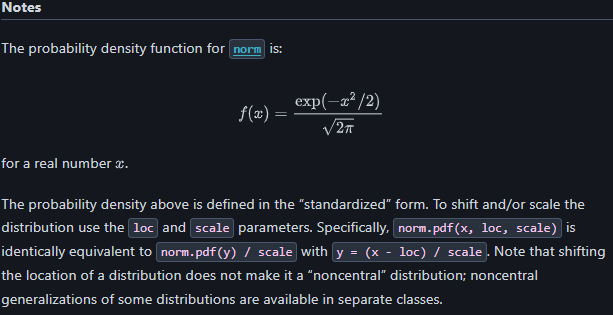

### Porém, essa distribuição, tão desejada em modelos estatísticos e Aprendizado de Máquina, não é tão comumente encontrada no mundo real

### Destaco Weibull, Gamma, Logística, Chi-Quadrado, dentre outras.

Vamos entender como analisar cada uma, descobrir qual distribuição temos e como calcular sua probabilidade

#### Funções: st.norm(), st.dweibull(), st.dgamma(), st.expon(), st.chi(), st.chi2(), st.logistic()

mais em https://docs.scipy.org/doc/scipy/reference/stats.html


Antes vamos testar a normalidade de nossos dados, caso nossas distribuições passem no teste de Shapiro, mais sensível a desvios da normalidade, podemos fazer cálculos pelo Z-Score
Teste de shapiro pode ser feito pelo scipy por st.shapiro(data)



após isso o calculo para o Z-score (normal reduzida), cujo valor é importante para que se saiba a probabilidade e verificar outliers em distribuições normais.

### Z-Score (Escore Padrão)

O Z-score (escore padrão) de um ponto de dados \( x \) com média \( $\mu$ \) e desvio padrão \( $\sigma$ \) é calculado como:

$$
Z = \frac{x - \mu}{\sigma}
$$

Onde:

- \( $x$ \): valor do ponto de dados.
- \( $\mu$ \): média (valor esperado) do conjunto de dados.
- \( $\sigma$ \): desvio padrão do conjunto de dados.


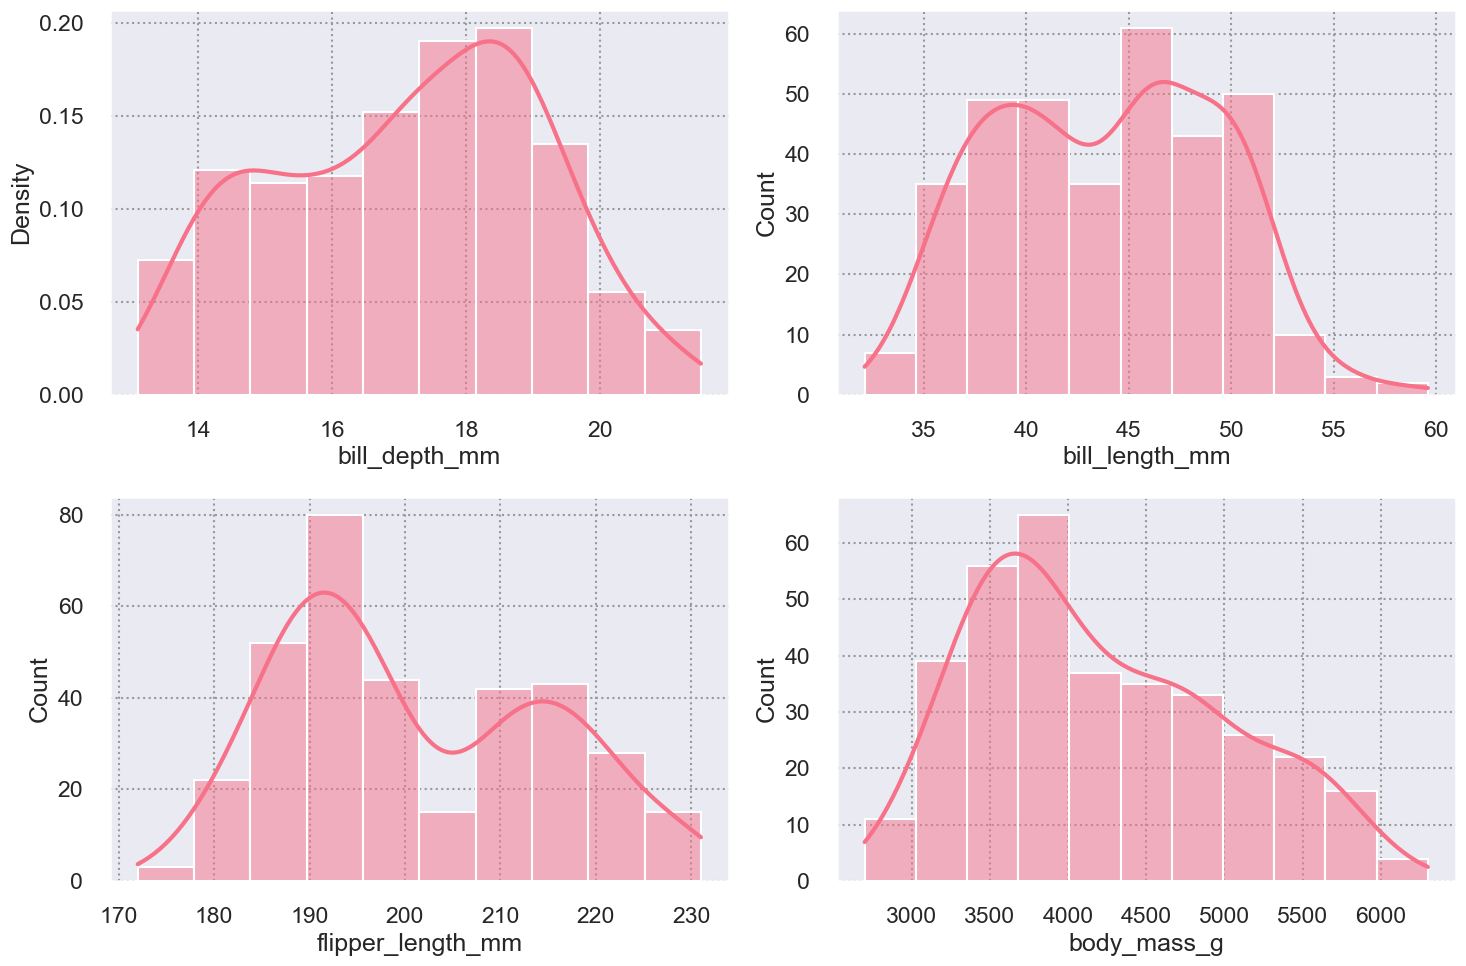

Normal Grafo 1: ShapiroResult(statistic=0.9724009037017822, pvalue=3.856135208479827e-06)
Normal Grafo 2: ShapiroResult(statistic=0.9747693538665771, pvalue=1.0174228009418584e-05)
Normal Grafo 3: ShapiroResult(statistic=0.9512197971343994, pvalue=2.9655846667253627e-09)
Normal Grafo 4: ShapiroResult(statistic=0.9592759013175964, pvalue=3.4799011672248525e-08)


In [36]:
#Pré Visualizando as distribuições de cada var contínua

fig, ax = plt.subplots(2,2,figsize=(15,10))

_ = sns.histplot(df['bill_depth_mm'], ax=ax[0,0], kde=True, stat='density')

_ = sns.histplot(df['bill_length_mm'],ax=ax[0,1], kde=True)

_ = sns.histplot(df['flipper_length_mm'],ax=ax[1,0],kde=True)

_ = sns.histplot(df['body_mass_g'], kde=True,ax=ax[1,1])


fig.tight_layout()
plt.show()

shap1 = st.shapiro(df['bill_depth_mm'])
shap2 = st.shapiro(df['bill_length_mm'])
shap3 = st.shapiro(df['flipper_length_mm'])
shap4 = st.shapiro(df['body_mass_g'])


print(f'Normal Grafo 1: {shap1}')
print(f'Normal Grafo 2: {shap2}')
print(f'Normal Grafo 3: {shap3}')
print(f'Normal Grafo 4: {shap4}')

##### É possível notar que meus dados contínuos não seguem distribuições normais, porém podemos fazer ajuste de bondades com parâmetros estimados para verificar à quais distribuições pertencem para assim podermos calcular as probabilidades.

##### _A ideia desse bloco é explorar essas possibilidades e aprender a lidar com dados reais_


---


# Teste de bondade:

## Para avaliar a aplicabilidade de meus dados à diversas distribuições, utilizaremos o método fit() do scipy.stats e testando a bondade do ajuste com o teste KS

O teste de bondade de ajuste é utilizado para verificar se um conjunto de dados observados \( $O_i$ \) segue uma distribuição de probabilidade específica com parâmetros estimados \( $\hat{\theta}$ \). A estatística de teste geralmente é formulada como:

$$
T = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

Onde:

- \( $O_i$ \): frequências observadas para cada categoria ou intervalo de dados.
- \( $E_i$ \): frequências esperadas para cada categoria ou intervalo de dados sob a distribuição teórica.
- \( $n$ \): número total de categorias ou intervalos de dados.

Porém antes vamos aplicar um rápido teste mais prático para verificar qual distribuição estamos lidando com o teste de Anderson do scipy.stats

### Teste de Anderson-Darling - sendo mais fácil aplicar porém aceitando no scipy, apenas algumas distribuições

O teste de Anderson-Darling é utilizado para verificar se uma amostra de dados segue uma distribuição teórica \( F(x) \). A estatística de teste de Anderson-Darling é calculada como:

$$
A^2 = -n - \sum_{i=1}^{n} \frac{2i - 1}{n} \left[ \ln(F(X_{(i)})) + \ln(1 - F(X_{(n+1-i)})) \right]
$$

Onde:

- \( $n$ \): tamanho da amostra.
- \( $X_{(i)}$ \): i-ésima menor observação na amostra ordenada.
- \( $F(x)$ \): função de distribuição acumulada (CDF) teórica da distribuição a ser testada.

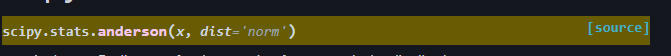

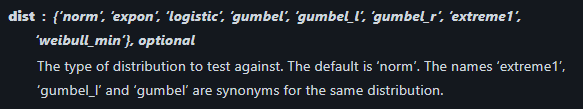


In [37]:

# Distribuições para testar
distributions = ['norm', 'expon', 'logistic','gumbel_r','weibull_min']
for distribution in distributions:
    # Ajuste a distribuição aos dados
    dist = getattr(st, distribution)
    params = dist.fit(df['bill_depth_mm'])
    
    # Calcule o teste de Anderson-Darling
    ad_statistic, critical_values, significance_level = st.anderson(df['bill_depth_mm'], dist=distribution)
    
    # Imprima os resultados
    print(f'Distribuição: {distribution}')
    print(f'Estatística de Anderson-Darling: {ad_statistic}')
    print(f'Valores críticos: {critical_values}')
    print(f'Níveis de significância correspondentes: {significance_level}')
    print()

Distribuição: norm
Estatística de Anderson-Darling: 2.9611562454298337
Valores críticos: [0.569 0.649 0.778 0.908 1.08 ]
Níveis de significância correspondentes: [15.  10.   5.   2.5  1. ]

Distribuição: expon
Estatística de Anderson-Darling: 123.76162855128183
Valores críticos: [0.92  1.076 1.339 1.603 1.954]
Níveis de significância correspondentes: [15.  10.   5.   2.5  1. ]

Distribuição: logistic
Estatística de Anderson-Darling: 3.4297416576217756
Valores críticos: [0.426 0.563 0.66  0.768 0.905 1.009]
Níveis de significância correspondentes: [25.  10.   5.   2.5  1.   0.5]

Distribuição: gumbel_r
Estatística de Anderson-Darling: 6.726592769192507
Valores críticos: [0.469 0.63  0.749 0.868 1.027]
Níveis de significância correspondentes: [25.  10.   5.   2.5  1. ]

Distribuição: weibull_min
Estatística de Anderson-Darling: 2.797924225922486
Valores críticos: [0.313 0.428 0.506 0.568 0.674 0.779 0.919 1.026]
Níveis de significância correspondentes: [0.5   0.75  0.85  0.9   0.95  0.97

#### No teste de anderson caso nossa estatístrica AD seja maior que nossos níveis de significância, rejeitamos a hipótese nula de que nossos dados seguema distribuição teórica


### Vamos passar aos testes KS com as features proporcionadas por fit()

Fit() é um dos métodos de distribuições, ele retorna args que melhor ajustam seus dados à uma distribuição passada. st.gamma.fit(dados) -> retorna os args para uma distribuição gamma que melhor ajusta seus dados à própria distribuição gamma

Após passamos um teste de KS ou Kolmogorov-Smirnov

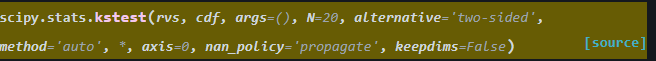

Caso p_value do teste KS seja < 0.05 (considerando um nível de confiança padrão de 95%), significa que há evidências suficientes para rejeitar a hipótese nula de que seus dados seguem a distribuição passada.
Caso p_value seja maior > 0.05, podemos considerar que os args do fit() se encaixam bem aos seus dados e portanto podem ser usados para calcular as probabilidades conforme a distribuição testada


Como estamos aplicando estudos vamos utilizar apenas as variáveis "bill_depth_mm" e "bill_length_mm"


In [246]:
#Gamma
gg = st.gamma.fit(df['bill_depth_mm'], floc=0)
d, p_value = st.kstest(df['bill_depth_mm'], 'gamma', args=gg)
print(f'Estatística D: {d}, Valor-p: {p_value}')


##Qui-Quadrado
chi = st.chi2.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'chi2', args=chi)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Weibull
weibull = st.dweibull.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'dweibull', args=weibull)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Pareto
pareto = st.pareto.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'pareto', args=pareto)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Normal 
norm = st.norm.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'norm', args=norm)
print(f'Estatística D: {d}, Valor-p: {p_value}')

Estatística D: 0.09168285394761799, Valor-p: 0.005751081183505389
Estatística D: 0.22334056527915858, Valor-p: 1.483693884837712e-15
Estatística D: 0.09200646289760532, Valor-p: 0.005518718293975217
Estatística D: 0.21514568391535882, Valor-p: 1.8647972441774698e-14
Estatística D: 0.08008117270134596, Valor-p: 0.022916014263616082


In [247]:
#Gamma
gg = st.gamma.fit(df['bill_length_mm'], floc=0)
d, p_value = st.kstest(df['bill_length_mm'], 'gamma', args=gg)
print(f'Estatística D: {d}, Valor-p: {p_value}')


##Qui-Quadrado
chi = st.chi2.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'chi2', args=chi)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Weibull
weibull = st.dweibull.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'dweibull', args=weibull)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Pareto
pareto = st.pareto.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'pareto', args=pareto)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Normal 
norm = st.norm.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'norm', args=norm)
print(f'Estatística D: {d}, Valor-p: {p_value}')



Estatística D: 0.08343517319261118, Valor-p: 0.015664266113068617
Estatística D: 0.8974922246832591, Valor-p: 0.0
Estatística D: 0.03881640711386819, Valor-p: 0.6630793613535295
Estatística D: 0.23015008750168167, Valor-p: 1.6796395992296638e-16
Estatística D: 0.07138866408098316, Valor-p: 0.05712464539722051


In [40]:
#bill_depth_mm teoricamente, a um nível de confiança de 95%, não se encaixou em nenhum teste, porém após avalidado o hist e qqplot podemos acreditar em um nível de confiança de 90% 
#já bill_length_mm teve excelente performance nas features proporcionadas por fit() nas distribuição weibull


#probabilidade de bill_depth_mm se considerando os args do fit() à um nível de confiança de 90%
norm = st.norm.fit(df['bill_depth_mm'])
prop_bill = st.norm.pdf(16, norm[0], norm[1])
prop_bill_acum = st.norm.cdf(16, norm[0], norm[1])

#probabilidade de bill_length_mm considerando os args do fit() à distribuição weibull
weibull = st.dweibull.fit(df['bill_length_mm'])
prop_len = st.dweibull.pdf(43, weibull[0], weibull[1])
prop_len_acum = st.dweibull.cdf(43, weibull[0], weibull[1])


print(f'Probabilidade ponto da normal: {prop_bill:,.2%}')
print(f'Probabilidade acumulada da normal: {prop_bill_acum:,.2%}')
print(f'Probabilidade ponto da weibull: {prop_len:,.2%}')
print(f'Probabilidade acumulada da weibull: {prop_len_acum:,.2%}')

Probabilidade ponto da normal: 17.08%
Probabilidade acumulada da normal: 28.00%
Probabilidade ponto da weibull: 34.83%
Probabilidade acumulada da weibull: 21.99%


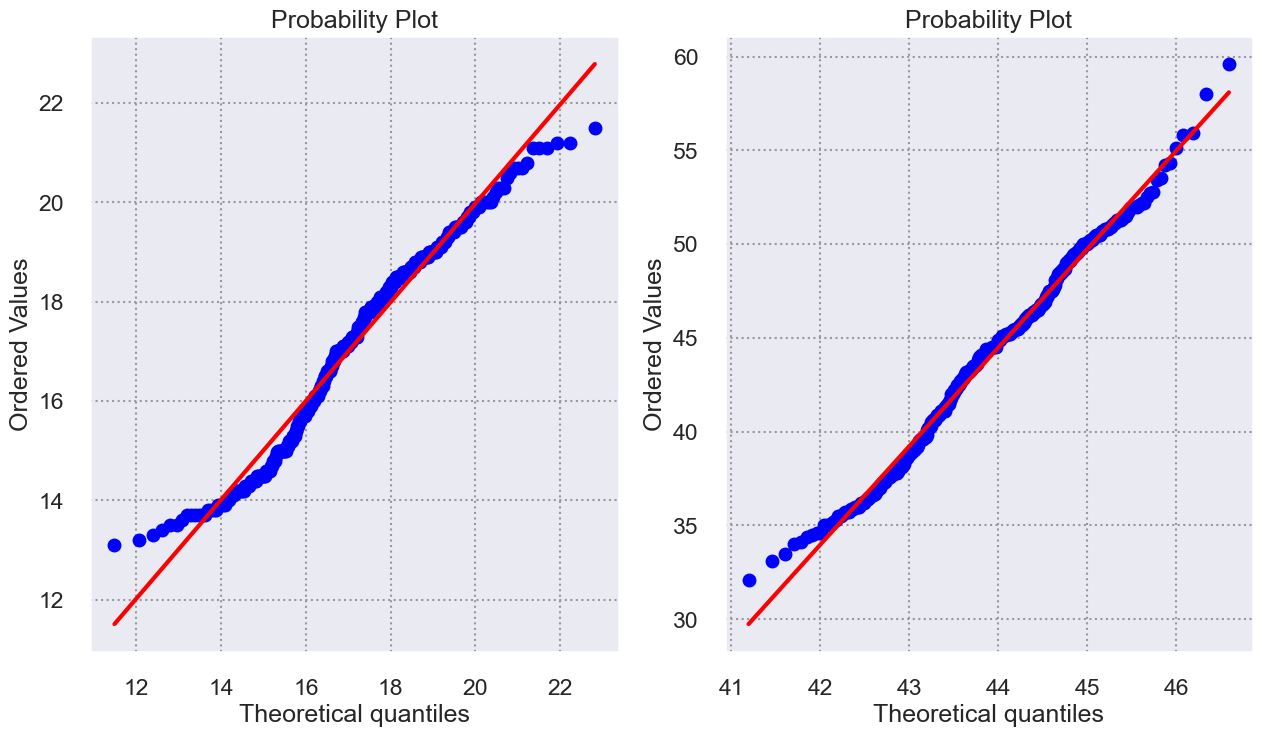

In [41]:
##QQPLOTS DAS DISTRIBUIÇÕES AJUSTADAS
fig, ax = plt.subplots(1,2,figsize=(15,8))

#st.probplot() plota com qqplot com qqline para analisarmos a distribuição por quantis -> quanto mais pontos encaixados na linhas vermelha, mais próxima nossos dados são de dada distribuição
st.probplot(df['bill_depth_mm'], dist='norm', sparams=(norm[0], norm[1]), plot=ax[0])
st.probplot(df['bill_length_mm'], dist='dweibull', sparams=(weibull[0], weibull[1]), plot=ax[1])

plt.show()

In [42]:
st.norm.interval(0.95, norm[0], norm[1]) #intervalo de dados de 95% de chances de se encontrar o evento

(13.285800858686901, 21.011359173788943)

In [43]:
norm[0] #Esperança média

17.148580016237922

### Portanto notamos que por mais que nossos dados não possuam distribuições normais, podemos ajustá-los para se encaixar em alguma distribuição do mundo real e analisar probabilidades aproximadas acumuladas.


---


# Visto a base de probabilidade, está na hora de analisarmos a Inferência em si. Vamos trabalhar estimando parâmetros, intervalos e produzindo testes de hipóteses paramétricos e não paramétricos

Aqui vamos abordar conceitos de inferência. A inferência estatística é determinar um parâmetro, ou resposta, de uma população tendo-se apenas uma amostra da mesma. Como por exemplo, determinar a média de todos os estudantes do Brasil com uma amostra.
Vale ressaltar que as amostras precisam ser aleatórias onde todos os elementos da população tenham chance de entrar e representativas o suficiente para não excluir nenhuma parte da população

Agora, podemos determinar um parâmetro seja por ponto ou intervalo.

Conceitos importantes:

- Estimação:
  Processo de se retirar respostas de amostras por ponto, intervalo ou teste de hipóteses
- Estimador e Estimativa:
  Estimador é a variável aleatória ou y que surge como uma função ou cálculo para trazer uma estimativa mais precisa sobre a população


---


## Estimação por Ponto:

Alguns exemplos são:

### Estimação da Média e Variância

#### Média Amostral (\( $\bar{x}$ \)):

$$ \bar{x} = \frac{1}{n} \sum\_{i=1}^{n} x_i $$

#### Variância Amostral (\( $s^2$ \)):

$$ s^2 = \frac{1}{n-1} \sum\_{i=1}^{n} (x_i - \bar{x})^2 $$

### Estimação da Proporção

#### Proporção Amostral (\( $\hat{p}$ \)):

$$ \hat{p} = \frac{x}{n} $$

### Erro Padrão e Covariância

#### Erro Padrão da Média (\( $SE(\bar{x})$ \)):

$$ SE(\bar{x}) = \frac{s}{\sqrt{n}} $$

#### Covariância Amostral (\( $s_{xy}$ \)):

$$ s*{xy} = \frac{1}{n-1} \sum*{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

### Mínimos Quadrados Ordinários (OLS)

#### Estimação do Coeficiente Linear (\( $\hat{\beta}_0$ \)) e do Coeficiente Angular (\( $\hat{\beta}_1$ \)):

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x*i - \bar{x})(y_i - \bar{y})}{\sum*{i=1}^{n} (x_i - \bar{x})^2} $$

$$ \hat{\beta}\_0 = \bar{y} - \hat{\beta}\_1 \bar{x} $$

AGORA VAMOS ESTIMAR UMA POR UMA EM UMA AMOSTRA EXTRAÍDA DOS NOSSOS DADOS SOBRE PENGUINS
PARA INFERÊNCIA EU OPTO POR USAR A BILBIOTECA _statsmodels_ DO PYTHON


In [44]:
#Retirando uma amostra - Optei por testar duas amostras, uma com apenas 50 elementos e outra com a metade dos elemtos 
import statsmodels.stats as sts

amostra_menor = df.sample(n=50, replace=True) 
amostra_maior = df.sample(frac=0.5)


In [45]:
print(amostra_menor.shape)
print(amostra_maior.shape)

(50, 7)
(172, 7)


In [46]:
#Dados da população
array = df['body_mass_g']
print(f'Média População: {np.mean(array):.2F}')
print(f'Desvio e Variância População: {np.std(array):.2F} & {np.var(array):.2F}')

Média População: 4202.86
Desvio e Variância População: 800.29 & 640456.44


In [248]:
#Estimando as médias de ambos para a variável massa

print(f'Estimando por cálculo a média da menor amostra seria: {sum(amostra_menor.body_mass_g)/len(amostra_menor)}')
print(f'Estimando por cálculo a média da maior amostra seria: {(sum(amostra_maior.body_mass_g)/len(amostra_maior)):.2F}')

Estimando por cálculo a média da menor amostra seria: 4076.0
Estimando por cálculo a média da maior amostra seria: 4242.01


### Vamos usar statsmodels invocando a classe weightstats.DescrStatsW()

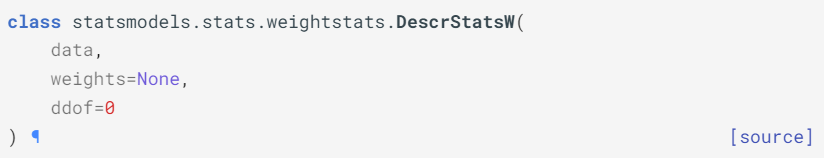

Lembre-se ddof = degrees of freedom - para testes T

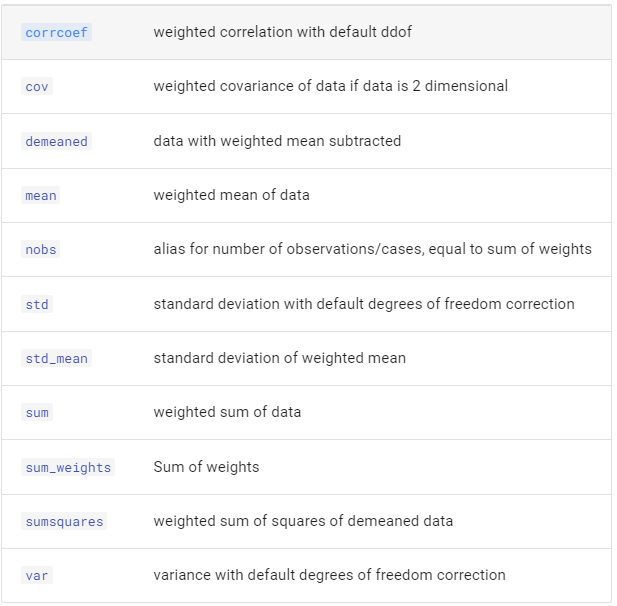

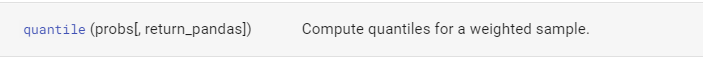


In [48]:
# Agora usando a biblioteca statsmodel

from statsmodels.stats.weightstats import DescrStatsW

desc = DescrStatsW(amostra_menor['body_mass_g'])

media = desc.mean
var = desc.var
desvio = desc.std
err_m = desc.std_mean
cv = desc.std / desc.mean *100

print(f'Media amostral: {media:.2F}')
print(f'Variância amostral: {var:.2F}')
print(f'Desvio amostral: {desvio:.2F}')
print(f'Erro Padrão da Média: {err_m:.2F}')
print(f'Covariância: {cv:.2F}')

Media amostral: 4076.00
Variância amostral: 579174.00
Desvio amostral: 761.03
Erro Padrão da Média: 108.72
Covariância: 18.67


In [49]:
desc = DescrStatsW(amostra_maior['body_mass_g'])

media = desc.mean
var = desc.var
desvio = desc.std
err_m = desc.std_mean
cv = desc.std / desc.mean *100

print(f'Media amostral: {media:.2F}')
print(f'Variância amostral: {var:.2F}')
print(f'Desvio amostral: {desvio:.2F}')
print(f'Erro Padrão da Média: {err_m:.2F}')
print(f'Covariância: {cv:.2F}')

Media amostral: 4242.01
Variância amostral: 555167.60
Desvio amostral: 745.10
Erro Padrão da Média: 56.98
Covariância: 17.56


##### É possível notar que as estimativas estão próximas aos parâmetros da população, e vale ressaltar que ao se aumentar a quantidade de elementos na amostra a média pode se aproximar cada vez mais do parâmetro original da População


---


## Estimação por intervalo de Confiança

Feito a estimação por ponto, cabe agora estimar intervalo, a boa prática em estatística nos induz a estimar por intervalos já que, comumente, nossas estimativas possuem certas margens de erro. Para tal, apresentar uma faixa de valores onde podemos ter 95%, 90% ou 99% de chances de nossa estimativa realmente estar, ajuda muito e também se apresentada junto à umas estimativa apresentam resultados muito confiáveis e precisos
Para isso, usamos técnicas provenientes de distribuição de estimativas amostrais, selecinando o melhor método (estatística)

O primeiro passo é decidir qual estatística crítica utilizar a partir de uma estatística amostral (como Z, t, F, Chi). Quando estimamos um parâmetro, é fundamental considerar a incerteza associada à estimativa. Para quantificar essa incerteza, definimos um nível de confiança e selecionamos valores críticos (ou seja, limites) nas distribuições das estatísticas Z, t, F, Chi-squared, Z de proporção, etc., onde todos os valores possíveis têm uma probabilidade de 95% (ou outro nível de confiança escolhido) de conter a verdadeira estimativa do parâmetro.

Para médias, quando se conhece o desvio padrão da população, usamos a estatística Z e quando não sabemos o desvio, a estatística t é usada

Para proporção, também usamos a estatística Z porém com certas mudanças

Já para variâncias a estatística x² ou F são as mais recomendadas

Saber a estatística usada vai nos dar o limite crítico de α a um nível de significância determinado

As fórmulas usadas seguem-se:

### Intervalo de Confiança para Teste \( t \)

Para um teste \( $t$ \) de uma única média, o intervalo de confiança pode ser dado por:

$$ \bar{x} \pm t\_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Onde:

- \( $\bar{x}$ \) é a média amostral,
- \( $t_{\alpha/2, n-1}$ \) é o valor crítico da distribuição \( $t$ \) com \( $n-1$ \) graus de liberdade e nível de significância \( $\alpha$ \),
- \( $s$ \) é o desvio padrão amostral,
- \( $n$ \) é o tamanho da amostra,
- \( $SE(\bar{x})$ = $\frac{s}{\sqrt{n}}$ \) é o erro padrão da média.

### Intervalo de Confiança para Teste \( $z$ \)

Para um teste \( $z$ \) (normal), o intervalo de confiança pode ser dado por:

$$ \bar{x} \pm z\_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Onde:

- \( $\bar{x}$ \) é a média amostral,
- \( $z_{\alpha/2}$ \) é o valor crítico da distribuição normal padrão para o nível de significância \( $\alpha$ \),
- \( $\sigma$ \) é o desvio padrão populacional (conhecido),
- \( $n$ \) é o tamanho da amostra,
- \( $SE(\bar{x})$ = $\frac{\sigma}{\sqrt{n}}$ \) é o erro padrão da média.

### Intervalo de Confiança para Teste \( $\chi^2$ \)

Para um teste \( $\chi^2$ \), o intervalo de confiança para a variância pode ser dado por:

$$ \left( \frac{(n-1)s^2}{\chi^2*{\alpha/2, n-1}}, \frac{(n-1)s^2}{\chi^2*{1-\alpha/2, n-1}} \right) $$

Onde:

- \( $s^2$ \) é a variância amostral,
- \( $\chi^2_{\alpha/2, n-1}$ \) e \( $\chi^2_{1-\alpha/2, n-1}$\) são os quantis da distribuição \( $\chi^2$ \) com \( $n-1$ \) graus de liberdade e níveis de significância \( $\alpha/2$ \) e \( $1-\alpha/2 $\), respectivamente,
- \( $SE(s^2)$ = $\sqrt{\frac{2(n-1)}{\chi^2_{\alpha/2, n-1}} - 1}$ \) é o erro padrão da variância.

### Intervalo de Confiança para o Teste $F$

A fórmula do intervalo de confiança para o teste F pode ser expressa como:

$$ \left( \frac{s*1^2}{s_2^2} \right) \cdot F*{\alpha/2, \, v*1, \, v_2} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \left( \frac{s_1^2}{s_2^2} \right) \cdot F*{1-\alpha/2, \, v_1, \, v_2} $$

**Onde:**

- $s_1^2$ e $s_2^2$ são as variâncias amostrais das duas populações.
- $F_{\alpha/2, \, v_1, \, v_2}$ e $F_{1-\alpha/2, \, v_1, \, v_2}$ são os quantis da distribuição F com $v_1$ e $v_2$ graus de liberdade para os percentis $\alpha/2$ e $1-\alpha/2$, respectivamente.

### Intervalo de Confiança para o Teste t de Duas Médias

A fórmula do intervalo de confiança para o teste t de duas médias pode ser expressa como:

$$ \bar{x}_1 - \bar{x}\_2 \pm t_{\alpha/2, \, v} \cdot \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $$

**Onde:**

- $\bar{x}_1$ e $\bar{x}_2$ são as médias amostrais das duas populações.
- $s_1^2$ e $s_2^2$ são as variâncias amostrais das duas populações.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.
- $t_{\alpha/2, \, v}$ é o quantil da distribuição t de Student com $v$ graus de liberdade para o percentil $\alpha/2$.

O erro padrão para cada intervalo de confiança é dado pela expressão $\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$, que representa a variabilidade esperada das médias amostrais em relação às médias populacionais.


In [50]:
# Vamos resgatar as médias encontradas nas estimativas de ponto e trabalhar nos intervalos

import statsmodels.stats.proportion as stpr


#media = desc.mean
#var = desc.var
#desvio = desc.std
#err_m = desc.std_mean

#Intervalo de Confiança para teste z
ci_mean_z = desc.zconfint_mean() #para média e nao teste

#Intervalo de Confiança para teste t
ci_mean = desc.tconfint_mean() #para média e nao teste

#Intervalo de Confiança para 1 proporção
# number of successes, can be pandas Series or DataFrame. Arrays must contain integer values if method is “binom_test”.
# count = sucessos
# nobs = tamanho da amostra
ci_prop1 = stpr.proportion_confint(count=50, nobs=100)

#Intervalo de Confiança para 2 proporções
ci_prop2 = stpr.confint_proportions_2indep(count1=50, nobs1=100, count2=30, nobs2=90)

#Intervalo de Confiança para diferenças de duas médias Z e T
desc2 = sts.weightstats.DescrStatsW(amostra_menor['body_mass_g'])

desc_g = sts.weightstats.CompareMeans(desc,desc2) #as duas medias e/ou proporções para CompareMeans deve ser instancias de DescrStatsW
ci_2means_z = desc_g.zconfint_diff()
ci_2means_t = desc_g.tconfint_diff()


#Intervalo de Confiança para Variância
#Para variância ainda desconheço um calculo por método direto. Portanto vamos usar o teste Chi Quadrado para calcular com a biblioteca Scipy
sample_variance = np.var(amostra_maior['body_mass_g'], ddof=1) #ou desc.var também é válido
df = len(amostra_maior) - 1
alpha = 0.05
chi2_lower_tail = st.chi2.ppf(alpha / 2, df)
chi2_upper_tail = st.chi2.ppf(1 - alpha / 2, df)
ci_lower = (df * sample_variance) / chi2_upper_tail
ci_upper = (df * sample_variance) / chi2_lower_tail



In [51]:
print(f'Intervalo de Conf teste 1: {ci_mean_z}')
print(f'Intervalo de Conf teste 1: {ci_mean}')
print(f'Intervalo de Conf teste 1: {ci_prop1}')
print(f'Intervalo de Conf teste 1: {ci_prop2}')
print(f'Intervalo de Conf teste 1: {ci_2means_z}')
print(f'Intervalo de Conf teste 1: {ci_2means_t}')
print(f'Intervalo de Conf teste 1: {ci_lower} - {ci_upper}')

Intervalo de Conf teste 1: (4130.335145984948, 4353.6882989006635)
Intervalo de Conf teste 1: (4129.539152596413, 4354.4842922891985)
Intervalo de Conf teste 1: (0.4020018007729973, 0.5979981992270027)
Intervalo de Conf teste 1: (0.026156727507188615, 0.2975616978115092)
Intervalo de Conf teste 1: (-70.82942026171048, 402.85286514732223)
Intervalo de Conf teste 1: (-72.13951514643492, 404.16296003204667)
Intervalo de Conf teste 1: 456662.15424521186 - 698611.5368049992


---


# Testes de Hipóteses

## Agora que conseguimos estimar uma estatística e definir o intervalo de confiança em torna dela, vamos trabalhar com testes de hipóteses

## Um teste de hipótese nada mais é que uma forma de decidir aceitar ou rejeitar uma hipótese acerca de algo, tomada em função de uma estimativa de uma amostra, como uma média

- **Hipótese Nula ($H_0$):**
  A hipótese nula é uma afirmação inicial assumida como verdadeira para o propósito do teste. É geralmente o estado de equilíbrio, uma afirmação de que não há efeito ou relação entre variáveis, ou que qualquer efeito observado é devido ao acaso. O objetivo do teste é avaliar se há evidências suficientes para rejeitar a hipótese nula em favor da hipótese alternativa.

- **Hipótese Alternativa ($H_1$):**
  A hipótese alternativa é o oposto da hipótese nula. Ela representa o que o pesquisador deseja provar ou demonstrar. É a afirmação de que há algum efeito ou relação significativa entre variáveis na população estudada. O teste de hipótese visa determinar se os dados fornecem evidências suficientes para rejeitar a hipótese nula em favor da hipótese alternativa.

### Teste Unicaudal e Teste Bicaudal

Na estatística, ao realizar um teste de hipótese, podemos ter diferentes abordagens quanto à direção do efeito que estamos interessados em testar:

- **Teste Unicaudal:**
  Um teste unicaudal é utilizado quando temos uma hipótese alternativa direcionada para apenas uma direção específica. Isso significa que estamos interessados em saber se a média, proporção ou outro parâmetro é maior ou menor do que um valor específico. Formalmente, as hipóteses são:

  - $H_0$: O parâmetro é igual ao valor específico.
  - $H_1$: O parâmetro é maior ou menor do que o valor específico, dependendo do teste unicaudal escolhido.

- **Teste Bicaudal:**
  Um teste bicaudal é utilizado quando estamos interessados em saber se a média, proporção ou outro parâmetro é diferente de um valor específico, sem indicar uma direção específica. Formalmente, as hipóteses são:

  - $H_0$: O parâmetro é igual ao valor específico.
  - $H_1$: O parâmetro é diferente do valor específico (ou seja, maior ou menor).


**Para um teste unilateral à esquerda, o valor p é igual à probabilidade: valor p = cdf(ts).</br>
Para um teste unilateral à direita, o valor p é igual a um menos essa probabilidade: valor p = 1 - cdf(ts).</br>
Para um teste bilateral, o valor de p é igual a duas vezes o valor de p para o valor de p com cauda inferior se o valor da estatística de teste de sua amostra for negativo. No entanto, o valor de p é igual a duas vezes o valor de p para o valor de p com cauda superior, se o valor da estatística de teste da sua amostra for positivo.</br>**

### Erro Tipo I e Erro Tipo II

Durante a condução de um teste de hipótese, existem dois tipos de erros que podem ocorrer, dependendo da decisão tomada com base nos dados:

- **Erro Tipo I:**
  O erro Tipo I ocorre quando rejeitamos erroneamente a hipótese nula ($H_0$), sendo que ela é realmente verdadeira na população. Em termos de probabilidade, o erro Tipo I é a probabilidade de rejeitar $H_0$ quando $H_0$ é verdadeira. É comumente denotado como $\alpha$, o nível de significância do teste.

- **Erro Tipo II:**
  O erro Tipo II ocorre quando falhamos em rejeitar a hipótese nula ($H_0$), sendo que ela é falsa na população (ou seja, a hipótese alternativa $H_1$ é verdadeira). Em termos de probabilidade, o erro Tipo II é a probabilidade de não rejeitar $H_0$ quando $H_1$ é verdadeira. É comumente denotado como $\beta$.

### Relação com Testes Unicaudal e Bicaudal:

- Em um teste unicaudal, o erro Tipo I é concentrado em apenas uma extremidade da distribuição (por exemplo, à direita da distribuição para um teste unicaudal à direita).
- Em um teste bicaudal, o erro Tipo I é dividido entre as duas extremidades da distribuição (por exemplo, tanto à direita quanto à esquerda da distribuição).

Esses conceitos são fundamentais para compreender os resultados de testes estatísticos e para tomar decisões informadas com base nas evidências disponíveis nos dados de um estudo ou experimento.

Vamos olhar os testes paramétricos (usados com estimativas) - testes paramétricos entendem que a distribuição dos dados são normalmente distribuídas e para testes com dois ou mais grupos deve-se verificar a homocedasticidade - Teste de Levenne ou Durbin-Watson onde h0 = var iguais e ha = var diferentes

### Teste de Hipótese Z de uma Proporção

A fórmula do teste de hipótese Z para uma proporção pode ser expressa como:

$$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}} $$

**Onde:**

- $\hat{p}$ é a proporção amostral.
- $p_0$ é a proporção na hipótese nula.
- $n$ é o tamanho da amostra.

### Teste de Hipótese Z de duas Proporções

A fórmula do teste de hipótese Z para duas proporções pode ser expressa como:

$$ Z = \frac{(\hat{p}\_1 - \hat{p}\_2) - (p_1 - p_2)}{\sqrt{\hat{p}(1 - \hat{p}) \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}} $$

**Onde:**

- $\hat{p}_1$ e $\hat{p}_2$ são as proporções amostrais das duas populações.
- $p_1$ e $p_2$ são as proporções na hipótese nula.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.
- $\hat{p} = \frac{n_1 \hat{p}_1 + n_2 \hat{p}_2}{n_1 + n_2}$ é a proporção combinada das amostras.

### Teste t de uma Amostra

A fórmula do teste t de uma amostra pode ser expressa como:

$$ t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}} $$

**Onde:**

- $\bar{x}$ é a média amostral.
- $\mu_0$ é a média na hipótese nula.
- $s$ é o desvio padrão da amostra.
- $n$ é o tamanho da amostra.

### Teste t de duas Amostras (com variâncias iguais)

A fórmula do teste t de duas amostras (com variâncias iguais) pode ser expressa como:

$$ t = \frac{\bar{x}\_1 - \bar{x}\_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

**Onde:**

- $\bar{x}_1$ e $\bar{x}_2$ são as médias amostrais das duas populações.
- $s_p$ é o desvio padrão agrupado das amostras.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.

### Teste t de Welch (com variâncias diferentes)

A fórmula do teste t de Welch (com variâncias diferentes) pode ser expressa como:

$$ t = \frac{\bar{x}\_1 - \bar{x}\_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

**Onde:**

- $\bar{x}_1$ e $\bar{x}_2$ são as médias amostrais das duas populações.
- $s_1^2$ e $s_2^2$ são as variâncias amostrais das duas populações.
- $n_1$ e $n_2$ são os tamanhos das amostras das duas populações.

### Teste t Pareado

A fórmula do teste t pareado pode ser expressa como:

$$ t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} $$

**Onde:**

- $\bar{d}$ é a média das diferenças pareadas.
- $s_d$ é o desvio padrão das diferenças pareadas.
- $n$ é o número de pares pareados.

### Teste Qui-Quadrado

A fórmula do teste qui-quadrado pode ser expressa como:

$$ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

**Onde:**

- $O_i$ são as frequências observadas.
- $E_i$ são as frequências esperadas sob a hipótese nula.
  Uma dica, o erro padrão (ou margem de erro) desses testes é o denominador da divisão

OBS: Anova será tratado a parte


##### Vamos aplicar testes t, z, prop e demonstrar seus intervalos de confiança e em um segundo bloco vamos plotar três testes, um de teste t de uma e duas amostras e outro para proporção e mais um do chi-quadrado para independência de categorias e proporções de tabelas de contingência


In [52]:
## Antes do teste vamos avaliar a normalidade dos dados analisados e a variância dos mesmos
#Para isso vamos usar o scipy mais uma vez para invocar as funções de Shapiro e Levenne para grupos

teste_shap_body_mass = st.shapiro(amostra_maior['body_mass_g'])
teste_shap_body_mass_2 = st.shapiro(amostra_menor['body_mass_g'])
teste_levenne = st.levene(amostra_maior['body_mass_g'],amostra_menor['body_mass_g'])

print(f'Teste de shapiro para amostra 1: {teste_shap_body_mass[1]}')
print(f'Teste de shapiro para amostra 1: {teste_shap_body_mass_2[1]}')
print(f'Teste de Levene para homocedasticidade das variâncias: {teste_levenne[1]}')

Teste de shapiro para amostra 1: 6.54506657156162e-05
Teste de shapiro para amostra 1: 0.05730065330862999
Teste de Levene para homocedasticidade das variâncias: 0.5357484445521298


##### Vale notar que os testes foram feitos exclusivamente para estudo, as amostras selecionadas foram propositalmente definidas para passar no teste de levene


- #### Concluímos que as variâncias são homocedasticas, ou seja, não há necessidade de correções de Welch para o teste t ou z

- #### Já na normalidade, meus dados sofrem desvios da normalidade

- #### Mas no caso da normalidade, caso a amostra seja grande o suficiente, podemos invocar o TLC. Vamos ver como funciona na prática


### Teorema do Limite Central (TLC)

O Teorema do Limite Central é um dos conceitos fundamentais na teoria da probabilidade e estatística. Ele afirma que, independentemente da distribuição da população original, a distribuição das médias amostrais de uma variável aleatória tende a se aproximar de uma distribuição normal conforme o tamanho da amostra aumenta.

Formalmente, o Teorema do Limite Central pode ser expresso da seguinte maneira:

Seja $X_1, X_2, \ldots, X_n$ uma amostra aleatória de uma variável aleatória com média $\mu$ e variância $\sigma^2$. Se $n$ é grande o suficiente, então a distribuição da média amostral $\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$ se aproxima de uma distribuição normal com média $\mu$ e variância $\frac{\sigma^2}{n}$.

Em termos matemáticos, isso pode ser representado como:

$$ \bar{X}\_n \xrightarrow{d} N\left(\mu, \frac{\sigma^2}{n}\right) $$

onde:

- $\bar{X}_n$ é a média amostral.
- $\mu$ é a média populacional.
- $\sigma^2$ é a variância populacional.
- $N(\mu, \frac{\sigma^2}{n})$ é uma distribuição normal com média $\mu$ e variância $\frac{\sigma^2}{n}$.

### Implicações do Teorema do Limite Central:

1. **Aplicabilidade Generalizada:** O TLC se aplica a uma ampla gama de distribuições populacionais, independentemente de sua forma original.
2. **Base para Inferência Estatística:** A normalidade das médias amostrais é crucial para a inferência estatística, permitindo o uso de testes baseados na distribuição normal.

3. **Importância em Estudos e Experimentos:** Permite o uso de métodos estatísticos baseados em distribuições normais, mesmo quando a distribuição original não é normal, desde que o tamanho da amostra seja grande o suficiente.

O Teorema do Limite Central é essencial para a compreensão de como as amostras de dados se comportam e é um dos pilares da teoria estatística aplicada em várias áreas científicas e práticas de análise de dados.


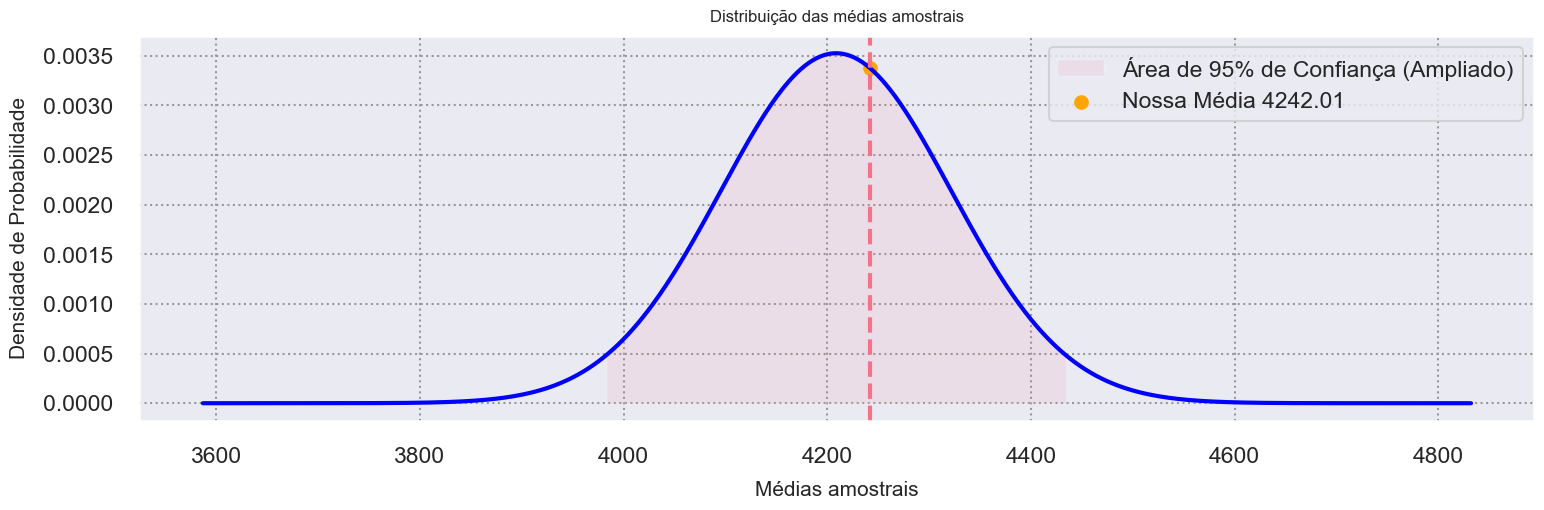

Nossa média: 4242.011722442806 & a médias das amostras: 4208.66 são valores próximos
Podemos também notar que nossa média se encontra em uma área de 95% de chance de ocorrer
Nosso erro padrão um pouco alto: 56.98 indica que o IC à 95% é 4130.33 até 4353.69 


In [53]:
nossa_media_amostral_1 = np.mean(amostra_maior['body_mass_g'])
nosso_erro_padrao = np.std(amostra_maior['body_mass_g'], ddof=1) / np.sqrt(len(amostra_maior))
limite_inferior_conf_nossa_amostra = nossa_media_amostral_1 - (1.96*nosso_erro_padrao) #Margem de erro
limite_superior_conf_nossa_amostra = nossa_media_amostral_1 + (1.96*nosso_erro_padrao) #Margem de erro

df = penguins.copy()

#vamos aplicar diversas amostragens:

lista_repeticao = list(range(1,300))
lista_vazia = []
for x in lista_repeticao:
    amostra = df.sample(n=50, replace=True)
    value = np.mean(amostra['body_mass_g'])
    lista_vazia.append(value)

dados = {'Amostras':lista_repeticao,
        'Medias':lista_vazia}

dados = pd.DataFrame(dados)


media_das_medias_amostrais = np.mean(dados['Medias'])
desvio_padrao_das_medias = np.std(dados['Medias'],ddof=1)
erro_padrao = desvio_padrao_das_medias / np.sqrt(len(dados))




x = np.linspace(min(dados['Medias']) - 300, max(dados['Medias']) + 300, 1000)
y = st.norm.pdf(x, media_das_medias_amostrais, desvio_padrao_das_medias)

lower_bound_ampliado = media_das_medias_amostrais - 2 * desvio_padrao_das_medias
upper_bound_ampliado = media_das_medias_amostrais + 2 * desvio_padrao_das_medias

plt.figure(figsize=(18, 5))
plt.title('Distribuição das médias amostrais', pad=10, fontsize=12)
sns.lineplot(x = x, y = y, color='b')
plt.xlabel(xlabel='Médias amostrais', labelpad=10, fontsize=15)
plt.ylabel(ylabel='Densidade de Probabilidade', labelpad=10, fontsize=15)
plt.fill_between(x, y, where=(x >= lower_bound_ampliado) & (x <= upper_bound_ampliado), alpha=0.1,
                 label='Área de 95% de Confiança (Ampliado)')
plt.scatter(x = nossa_media_amostral_1, y = st.norm.pdf(nossa_media_amostral_1,media_das_medias_amostrais, desvio_padrao_das_medias), label = f'Nossa Média {nossa_media_amostral_1:.2F}', color='orange')
plt.axvline(x = nossa_media_amostral_1, linestyle='--')
plt.legend()
plt.show()
print(f'Nossa média: {nossa_media_amostral_1} & a médias das amostras: {media_das_medias_amostrais:.2F} são valores próximos\nPodemos também notar que nossa média se encontra em uma área de 95% de chance de ocorrer')
print(f'Nosso erro padrão um pouco alto: {nosso_erro_padrao:.2F} indica que o IC à 95% é {limite_inferior_conf_nossa_amostra:.2F} até {limite_superior_conf_nossa_amostra:.2F} ')

#### Portanto, visto que amostras relativamente grandes, podemos confiar na média independentemente se a distribuição de nossa amostra segue uma distribuição com desvios de uma normal. O ideia, sempre será aplicar o teste às diversas amostras encontradas em um intervalo de 95% (2 desvios) e calcular o erro tipo II e poder de cada ponto

#### Mas mantenha em mente que por mais que testes paramétricos sejam mais fortes com grandes amostras, sempre equipare o valor-p com testes não paramétricos correspondentes e verifique outliers em seus dados


In [54]:
##Biblioteca usada será statsmodels
##Para testes de duas amostras sem homocedasticidade, usar o param usevar = 'unequal'


desc = sts.weightstats.DescrStatsW(amostra_maior['body_mass_g'])

#Teste t para uma média
#H0 = 4200 é igual a média da massa em gramas dos penguins
#HA = média da massa em gramas dos penguins é diferente de 6000
#alternative -> 'two-sided' = bicaudal, 'larger' - massa media é maior que 6000, 'smaller' - massa média é menor que 6000
teste_t_1_amostra = desc.ttest_mean(value = 4000, alternative='two-sided')
t_statistic, p_value_t, df_t = teste_t_1_amostra
ci_mean = desc.tconfint_mean(alpha = 0.05) #igual na inferência, assim temos acesso ao nossos intervalos de confiança para a média



#Teste t para duas médias
desc2 = sts.weightstats.DescrStatsW(amostra_menor['body_mass_g'])
desc_g = sts.weightstats.CompareMeans(desc,desc2)
#H0 médias dos grupos são iguais
#HA médias diferentes
#Caso não haja homocedasticidade adicionar parâmetro usevar='unequal' (correção de Welch)
teste_t_2_amostras = desc_g.ttest_ind(alternative='two-sided')
t_statistic_t2, p_value_t2, df_2 = teste_t_2_amostras
ci_mean_t_2 = desc_g.tconfint_diff(alpha = 0.05)




#Teste Z para uma média
#H0 = 6000 é igual a média da massa em gramas dos penguins
#HA = média da massa em gramas dos penguins é diferente de 6000
#alternative -> 'two-sided' = bicaudal, 'larger' - massa media é maior que 6000, 'smaller' - massa média é menor que 6000
teste_z_1_amostra = desc.ztest_mean(value = 6000, alternative = 'larger')
z_statistic, p_value_z = teste_z_1_amostra
ci_mean_z = desc.zconfint_mean()


#Teste Z para uma proporção 
df = penguins.copy()
tamanho = len(df)
z_prop_1 = sts.proportion.proportions_ztest(count = sex_abs_freq[0] , nobs =  tamanho, value= 10)
z_prop_stats, p_value  = z_prop_1
z_prop_1_cf = sts.proportion.proportion_confint(count = sex_abs_freq[0], nobs = tamanho)



#Test Z para duas proporções - não temos dados ao teste mas segue a lógica e código
#z_prop_2 = sts.proportion.test_proportions_2indep(count1=, nobs1=, count2=, nobs2=)
#z_prop_2_cf = sts.proportion.confint_proportions_2indep(count1=, nobs1=, count2=, nobs2=)




print(f'Teste t 1 amostra p_value: {p_value_t} e IC de: {ci_mean}')
print(f'Teste t 2 amostras p_value: {p_value_t2} e IC de: {ci_mean_t_2}')
print(f'Teste z 1 amostra p_value: {p_value_z} e IC de: {ci_mean_z}')
print(f'Teste z 1 proporção p_value: {p_value} e IC de: {z_prop_1_cf}')



Teste t 1 amostra p_value: 3.5441529037399515e-05 e IC de: (4129.539152596413, 4354.4842922891985)
Teste t 2 amostras p_value: 0.17089587599878348 e IC de: (-72.13951514643492, 404.16296003204667)
Teste z 1 amostra p_value: 1.0 e IC de: (4130.335145984948, 4353.6882989006635)
Teste z 1 proporção p_value: 0.0 e IC de: (0.4529804376554914, 0.5586474693212529)


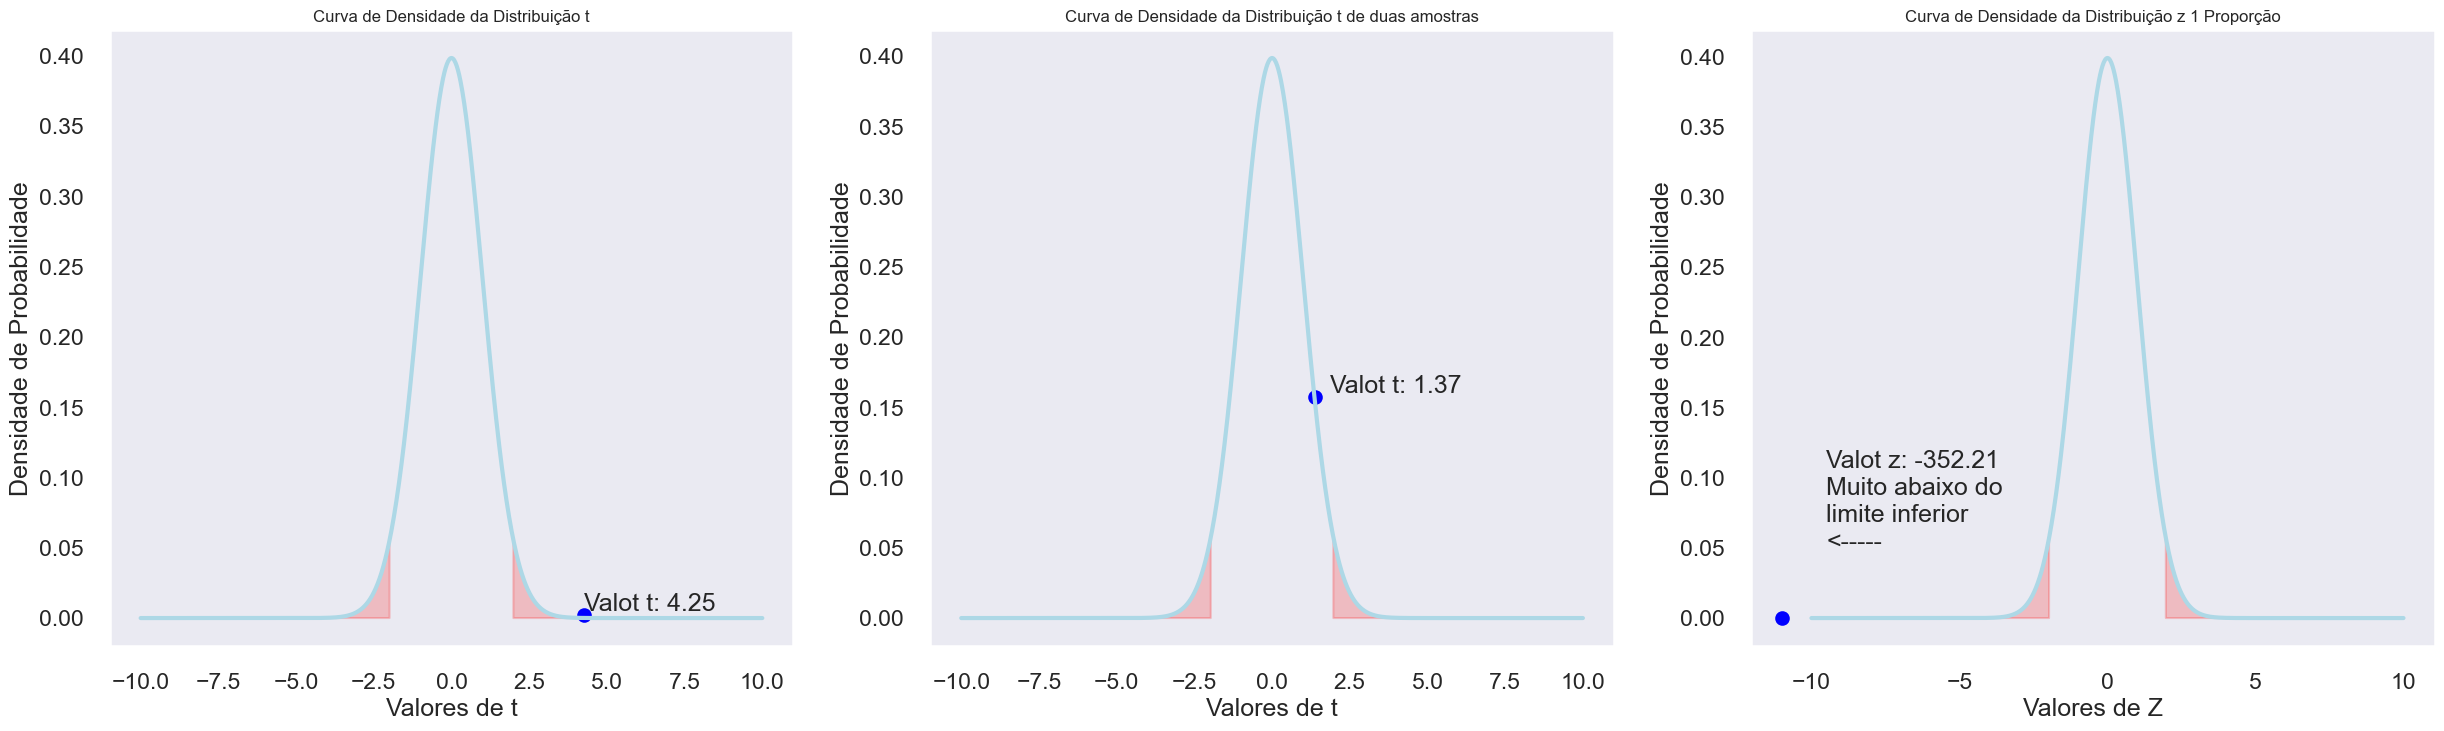

In [227]:
#para criar um gráfico usaremos scipy para calcular o ponto da região critica e dados aleatórios para preencher a curva
df_t = len(amostra_maior) - 1 #teste t
df2 = (len(amostra_maior) + len(amostra_menor)) - 2 #teste t

alpha = 0.05

t_critico = st.t.ppf(1 - alpha / 2, df_t) #st.t.ppf() -> usamos ppf() para retornar o ponto critico 
t_critico_2 = st.t.ppf(1 - alpha/2, df2)
z_prop_critc = st.norm.ppf(1 - alpha/2)

x = np.linspace(-10, 10, 1000) #criando faixa de valores
x2 = np.linspace(-10,10,1000)


y_t_1 = st.t.pdf(x, df_t)
y_t_2 = st.t.pdf(x2, df2)
y_z = st.norm.pdf(x2)

y_1 = st.t.pdf(t_statistic, df_t)
y_2 = st.t.pdf(t_statistic_t2, df2)
y_3 = st.norm.pdf(z_prop_stats)




f, ax = plt.subplots(1,3,figsize=(30,8))

_ = sns.lineplot(x = x, y = y_t_1, ax=ax[0], color='lightblue')
ax[0].scatter(x = t_statistic ,y = st.t.pdf(t_statistic, df_t)+0.002, color='blue')
ax[0].fill_between(x, 0, y_t_1, where=(x < - t_critico)| (x > t_critico), color='red',alpha = 0.2)
ax[0].set_title('Curva de Densidade da Distribuição t', fontsize=12)
ax[0].set_xlabel('Valores de t')
ax[0].set_ylabel('Densidade de Probabilidade')
ax[0].text(x = t_statistic, y = y_1 + 0.005, s=f'Valot t: {t_statistic:.2F}')
ax[0].grid(False)


_ = sns.lineplot(x = x2, y = y_t_2, ax=ax[1], color='lightblue')
ax[1].scatter(x = t_statistic_t2 ,y = st.t.pdf(t_statistic_t2, df2)+0.002, color='blue')
ax[1].fill_between(x2, 0, y_t_2, where=(x2 < - t_critico_2)| (x2 > t_critico_2), color='red',alpha = 0.2)
ax[1].set_title('Curva de Densidade da Distribuição t de duas amostras', fontsize=12)
ax[1].set_xlabel('Valores de t')
ax[1].set_ylabel('Densidade de Probabilidade')
ax[1].text(x = t_statistic_t2 + 0.5, y = y_2 + 0.005, s=f'Valot t: {t_statistic_t2:.2F}')
ax[1].grid(False)



_ = sns.lineplot(x = x2, y = y_z,  ax=ax[2], color='lightblue')
ax[2].fill_between(x2, 0, y_z, where=(x2 < - z_prop_critc)| (x2 > z_prop_critc), color='red',alpha = 0.2)
ax[2].scatter(x = -11, y = 0, color='blue')
ax[2].set_title('Curva de Densidade da Distribuição z 1 Proporção', fontsize=12)
ax[2].set_xlabel('Valores de Z')
ax[2].set_ylabel('Densidade de Probabilidade')
ax[2].text(x = -10 + 0.5, y = 0.05, s=f'Valot z: {z_prop_stats:.2F}\nMuito abaixo do\nlimite inferior\n<-----')
ax[2].grid(False)




plt.show()



In [56]:
#Teste Chi-Squared
#H0 - as categorias (variáveis) são independentes
#HA - as categorias (variáveis) são dependentes
df = penguins.copy()
from statsmodels.stats.contingency_tables import Table
df_contingency = pd.pivot_table(df, index = 'sex', columns = 'species', aggfunc = 'size', fill_value=0)
table = Table(df_contingency)
result = table.test_nominal_association()

print(result)

df          2
pvalue      0.8946619685045746
statistic   0.2226186417427462


#### Feito os teste e plotado os gráficos, podemos notar que no teste t de uma amostra, tivemos um valor t dentro da zona de rejeição, o teste t de duas amostras fora da zona e o teste z de uma proporção dentro da zona também. Então temos uma ideia de que no primeiro e terceiro teste as diferenças são estatísticamente significativas, porém no segunda não temos provas o suficiente para rejeitar a H0 de que as médias são iguais


---


## Agora, para nossos três gráficos vamos plotar a curva de poder e OC dos testes, ela vai nos ajudar a ter uma noção do poder do teste e probabilidade do erro tipo II para cada média ou diferença

### Efeito d de Cohen

O efeito d de Cohen é uma medida estatística utilizada para quantificar a diferença entre duas médias populacionais em termos de desvio padrão. É especialmente útil em estudos experimentais para avaliar o tamanho do efeito de uma intervenção, tratamento ou manipulação experimental.

1. **A fórmula para calcular o efeito d de Cohen é:**

$$ d = \frac{\bar{X}\_1 - \bar{X}\_2}{s} $$

Onde:

- $\bar{X}_1$ e $\bar{X}_2$ são as médias das duas amostras comparadas.
- $s$ é o desvio padrão combinado das duas amostras.

#### Interpretação do Efeito d:

- **Tamanho do Efeito:** O valor de d indica o tamanho do efeito da diferença entre as duas médias. Quanto maior o valor de d, maior é a diferença relativa entre as médias.

- **Direção do Efeito:** O sinal de d (positivo ou negativo) indica a direção da diferença entre as médias. Um valor positivo de d indica que a média de $\bar{X}_1$ é maior do que a média de $\bar{X}_2$, enquanto um valor negativo indica o oposto.

- **Interpretação Geral:** Segundo as diretrizes comuns de Cohen, um efeito d de cerca de 0,2 é considerado pequeno, 0,5 é considerado médio e 0,8 ou mais é considerado grande. Esses valores são usados para contextualizar a significância prática da diferença observada.

#### Leitura do Efeito d:

- **Comparação de Estudos:** O efeito d de Cohen facilita a comparação entre estudos diferentes, mesmo quando as unidades de medida podem variar, pois é uma medida padronizada.

- **Decisões de Política e Prática:** Ajuda na interpretação das implicações práticas dos resultados estatísticos, ajudando a decidir se uma diferença é clinicamente ou pragmaticamente significativa.

Efeito de cohen mede a magnitudade da diferença entre médias de dois grupos os comparativas

E para poder medir o poder de cada e subtraír 1 por ele mesmo, e teremos a probabilidade do Erro Tipo II

Depois podemos usar esse d-Cohen para calcular poder em funções do statsmodels

2. **Cálculo do Poder do Teste:**

   Para um teste unicaudal à direita (para detectar se $\bar{X}$ é maior que $\mu_{H_0}$) ou bicaudal, o poder do teste pode ser calculado usando a distribuição normal padrão:

   - **Teste Unicaudal (à direita):**
     $$ \text{Poder} = P(Z > Z\_{\text{crítico}}) $$

   - **Teste Bicaudal:**
     $$ \text{Poder} = P(Z > Z*{\text{crítico}}) + P(Z < -Z*{\text{crítico}}) $$

   Onde:

   - $Z_{\text{crítico}}$ é o valor crítico correspondente ao nível de significância $\alpha$ (por exemplo, $Z_{\text{crítico}} = Z_{\alpha}$ para um teste unicaudal ou $Z_{\text{crítico}} = Z_{\alpha/2}$ para um teste bicaudal).

### Agora, caso não tenhamos o d-Cohen podemos calcular por fórmulas de Poder do Teste e Cálculos Relacionados

1. **Poder do Teste:**

O poder do teste é a probabilidade de rejeitar corretamente a hipótese nula ($H_0$) quando ela é falsa (ou seja, quando a hipótese alternativa $H_A$ é verdadeira). É dado por:

$$ \text{Poder do Teste} = 1 - \beta $$

Onde $\beta$ é o erro tipo II, a probabilidade de não rejeitar $H_0$ quando $H_A$ é verdadeira.

2. **Cálculo do Z-Estatístico:**

O Z-estatístico é usado para comparar a média amostral com a média sob a hipótese nula, normalizado pelo erro padrão (SE):

$$ Z*{\text{estatístico}} = \frac{\bar{X} - \mu*{H_0}}{SE} $$

Onde:

- $\bar{X}$ é a média amostral.
- $\mu_{H_0}$ é a média sob a hipótese nula.
- $SE$ é o erro padrão da média.

3. **Cálculo da Média Amostral Crítica:**

A média amostral crítica é a média teórica que levaria à rejeição da hipótese nula, calculada usando o Z-estatístico:

$$ \bar{X}_{\text{crítica}} = \mu_{H*0} + Z*{\text{estatístico}} \cdot SE $$

4. **Z-Hat (Zha):**

O Z-Hat (Zha) é usado para calcular a probabilidade do erro tipo II. Ele representa a distância entre a média amostral crítica e a média sob a hipótese alternativa, normalizado pelo erro padrão:

$$ Z*{\text{ha}} = \frac{\bar{X}*{\text{crítica}} - \mu\_{H_A}}{SE} $$

Onde $\mu_{H_A}$ é a média sob a hipótese alternativa.

5. **Probabilidade do Erro Tipo II por Z-Hat:**

A probabilidade do erro tipo II por Z-Hat é a área sob a curva normal padrão à direita de Z-Hat:

$$ P(\text{Erro Tipo II}) = P(Z > Z\_{\text{ha}}) $$

### Considerações:

- O poder do teste aumenta com o aumento do tamanho da amostra e com o aumento do efeito do tratamento ou diferença a ser detectada.
- O Z-Hat é usado para calcular a probabilidade do erro tipo II, que é crucial para avaliar a sensibilidade do teste em detectar efeitos verdadeiros.

Estas fórmulas são essenciais para compreender como calcular e interpretar o poder do teste e a probabilidade do erro tipo II em estudos de hipóteses estatísticas.


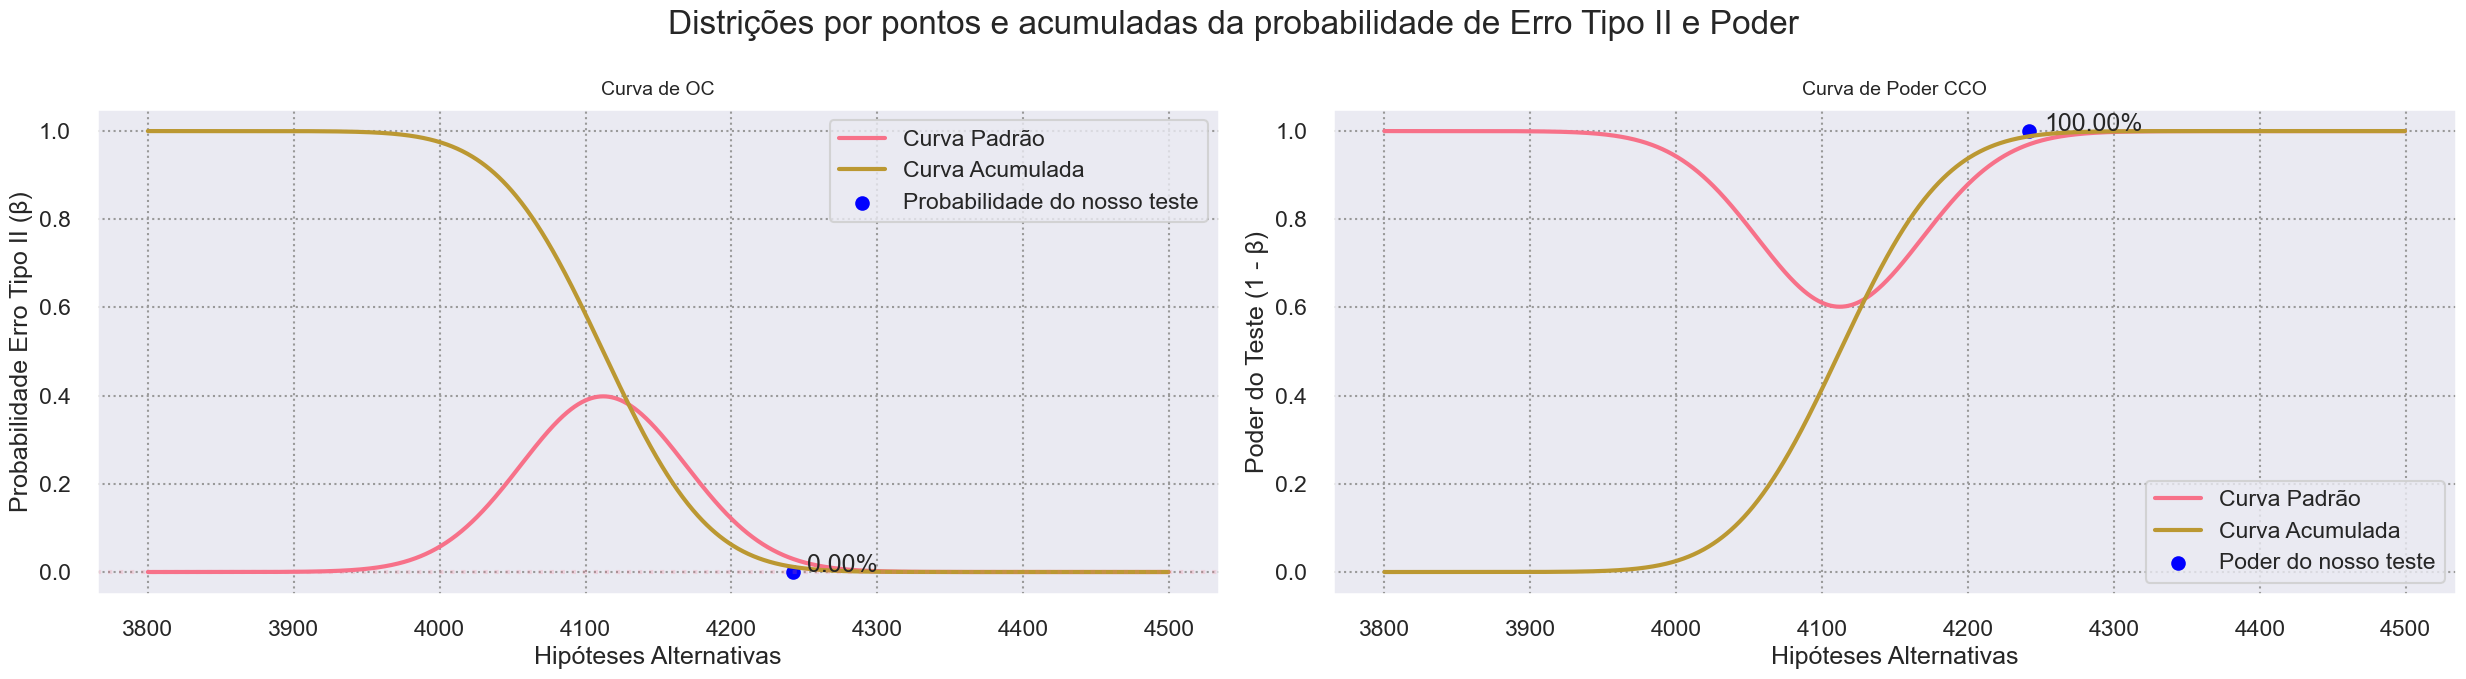

In [57]:
from statsmodels.stats.power import TTestIndPower #para testes de poder T de duas amostras
from statsmodels.stats.power import TTestPower #para testes de poder t de uma amostra
from statsmodels.stats.power import NormalIndPower #para teste z prop e z media
from pingouin import compute_effsize_from_t #melhor método para calculo de efeito de poder para teste t usando o t estatístico



d_cohen_t_1 = compute_effsize_from_t(t_statistic, N=len(amostra_maior))
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size=d_cohen_t_1,
                                 nobs1=len(amostra_maior),
                                 alpha=0.05)
nosso_b_t1 = 1 - power # A probabilidade do erro tipo II do nosso teste aplicado

#desc = sts.weightstats.DescrStatsW(amostra_maior['body_mass_g']) 
#desc é um obj que referencia um método do statsmodels com diversas estatísticas
dif = desc.mean #nossa média / H0

lista_b_ponto_t1 = [] #lista vazia que irá receber b pontual
lista_p__ponto_t1 = [] #lista vazia que irá receber poder pontual
lista_b_ac_t1 = [] #lista vazia que irá receber b acumulado
lista_p__ac_t1 = [] #lista vazia que irá receber poder acumulado
df = len(amostra_maior) - 1 #nossos graus de liberade
t_critico = st.t.ppf(1 - alpha / 2, df) #nosso t critico
x = 4000 + (t_critico * (desc.std / np.sqrt(len(amostra_maior)))) #nossa média crítica
lista_valores_para_equiparar_t1 = np.arange(3800, 4500, 0.5) #criando uma lista onde cada valor será testado
for i in lista_valores_para_equiparar_t1:
    t = (x - i) / (desc.std / np.sqrt(len(amostra_maior))) #nosso t beta
    beta_ponto = st.t.pdf(t, df) #calculando probabilidade de t beta pontual
    beta_ac = st.t.cdf(t, df) #calculando probabilidade de t beta acumulada
    poder_ponto = 1 - beta_ponto
    poder_ac = 1 - beta_ac
    lista_b_ponto_t1.append(beta_ponto)
    lista_p__ponto_t1.append(poder_ponto)
    lista_b_ac_t1.append(beta_ac)
    lista_p__ac_t1.append(poder_ac)


plt.figure(figsize=(25, 7))

plt.subplot(1, 2, 1)
plt.title('Curva de OC', fontsize=14, pad=10)
plt.suptitle('Distrições por pontos e acumuladas da probabilidade de Erro Tipo II e Poder')
sns.lineplot(x=lista_valores_para_equiparar_t1, y =lista_b_ponto_t1, label='Curva Padrão')
sns.lineplot(x = lista_valores_para_equiparar_t1, y= lista_b_ac_t1, label='Curva Acumulada')
plt.xlabel('Hipóteses Alternativas')
plt.ylabel('Probabilidade Erro Tipo II (β)')
plt.scatter(x = dif, y = nosso_b_t1, label='Probabilidade do nosso teste', color='blue')
plt.axhline(nosso_b_t1, alpha = 0.2, linestyle='dotted')
plt.text(x = dif + 10, y=nosso_b_t1, s=f'{nosso_b_t1:.2%}')
plt.legend()


plt.subplot(1, 2, 2)
sns.lineplot(x=lista_valores_para_equiparar_t1, y=lista_p__ponto_t1, label='Curva Padrão')
sns.lineplot(x=lista_valores_para_equiparar_t1, y=lista_p__ac_t1, label='Curva Acumulada')
plt.title('Curva de Poder CCO', fontsize=14, pad=10)
plt.xlabel('Hipóteses Alternativas')
plt.ylabel('Poder do Teste (1 - β)')
plt.scatter(x = dif, y = power,label='Poder do nosso teste', color='blue')
plt.text(x = dif + 10, y=power, s=f'{power:.2%}')
plt.legend()



plt.tight_layout()
plt.show()


### Testes Não Paramétricos e suas Aplicações

Os testes não paramétricos são métodos estatísticos que não exigem que os dados sigam uma distribuição específica (como a distribuição normal). Eles são úteis quando os dados não atendem às suposições dos testes paramétricos tradicionais ou quando os dados são ordinais.

#### Quando usar testes não paramétricos:

- **Dados Ordinais:** Quando os dados são classificados ou ordenados, mas a escala exata não é necessariamente linear.
- **Distribuição Não Normal:** Quando os dados não seguem uma distribuição normal e a transformação dos dados não é adequada ou desejável.

- **Pequenas Amostras:** Quando as amostras são pequenas e os testes paramétricos podem não ser robustos o suficiente.

#### Teste de Mann-Whitney (U de Mann-Whitney) - (Teste $t$ de duas amostras independentes):

O teste de Mann-Whitney é usado para comparar duas amostras independentes. Ele avalia se a distribuição de probabilidades de uma amostra é maior ou menor do que a de outra amostra. A estatística U de Mann-Whitney é calculada como:

$$ U = R_1 - \frac{n_1(n_1 + 1)}{2} $$

Onde:

- $R_1$ é a soma dos postos da primeira amostra.
- $n_1$ é o tamanho da primeira amostra.

#### Teste de Wilcoxon para amostras pareadas (Wilcoxon Signed-Rank Test) - (Teste $t$ de duas amostras pareadas):

O teste de Wilcoxon para amostras pareadas é usado para comparar duas amostras relacionadas ou emparelhadas. Ele testa se há uma diferença significativa entre as medições antes e depois de uma intervenção. A estatística de teste de Wilcoxon é calculada usando os postos das diferenças entre pares de observações.

#### Teste de Kruskal-Wallis - (ANOVA):

O teste de Kruskal-Wallis é uma extensão do teste de Mann-Whitney para mais de dois grupos independentes. Ele é usado para determinar se há diferenças significativas entre três ou mais grupos independentes. A estatística de teste de Kruskal-Wallis é calculada como:

$$ H = \frac{12}{N(N + 1)} \sum\_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N + 1) $$

Onde:

- $R_i$ é a soma dos postos para o grupo $i$.
- $n_i$ é o tamanho do grupo $i$.
- $N$ é o total de observações em todos os grupos combinados.
- $k$ é o número de grupos.

### Considerações:

- Os testes não paramétricos são úteis quando as suposições dos testes paramétricos não são atendidas ou quando não se deseja fazer suposições sobre a distribuição dos dados.
- Eles fornecem uma abordagem robusta e flexível para análise estatística em uma variedade de situações, especialmente quando os dados são não normais ou a escala de medição é ordinal.

- A escolha do teste não paramétrico adequado depende da natureza dos dados e das perguntas de pesquisa específicas.

Esses testes desempenham um papel crucial na análise estatística, oferecendo alternativas válidas e confiáveis aos testes paramétricos tradicionais, especialmente em situações onde as suposições paramétricas não são atendidas.


In [58]:
from pingouin import mwu 

In [59]:
teste_u = mwu(amostra_maior['body_mass_g'], amostra_menor['body_mass_g'])
teste_u

U-val alternative     p-val       RBC      CLES
MWU  4798.0   two-sided  0.213217 -0.115814  0.557907

In [60]:
teste_t_2_amostras

(1.3738195707208714, 0.17089587599878348, 220.0)

##### Podemos notar que entre o teste t de duas amostras e o teste não parmétrico, os valores de p_value são quase idênticos, reforçando a prova que com grandes amostras nossos testes podem ser poderosos mesmo com desvios da normalidade


In [61]:
##Vale ressaltar que o pingouins é uma biblioteca mais fácil e ágil de testes 

# from pingouin import ttest, ptests, welch_anova, anova, mancova -> testes

## Temos também testes de normalidade e homocedasticidade

# from pingouin import homoscedasticity, normality, anderson

In [62]:
##Temos também o calculo para teste t pareado
from pingouin import wilcoxon

#teste_u_pareado = wilcoxon() #x e y precisam ter o mesmo tamanho

In [122]:
##Vale ressaltar algo interessante de pingouins, o shift plot e o display

from pingouin import print_table, plot_shift, qqplot


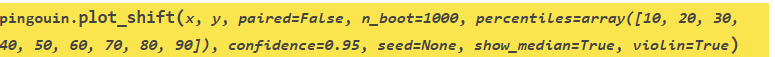

Bom grárfico paraa avaliar em quantis as mudanças de valores entre dois grupos


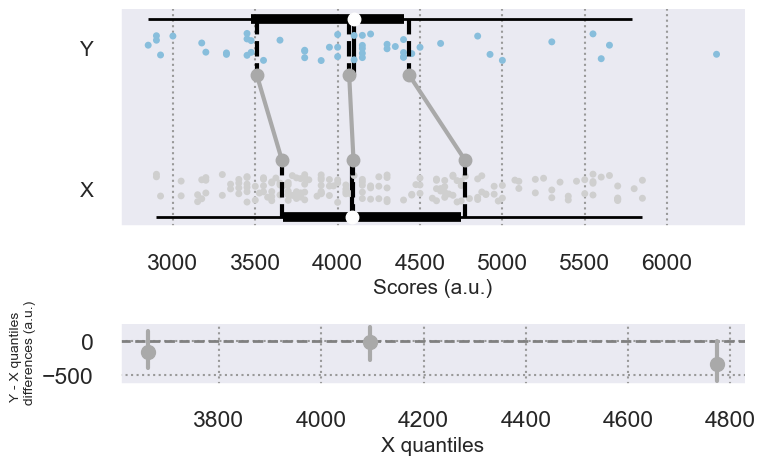

In [123]:
##Bom grárfico paraa avaliar em quantis as mudanças de valores entre dois grupos
plot_shift(amostra_maior['body_mass_g'], amostra_menor['body_mass_g'],percentiles=[25, 50, 75], show_median=True, violin=False)
plt.show()

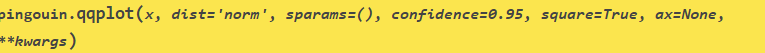

Bom qqplot do pingouins para avaliar distribuição com intervalos de confiança


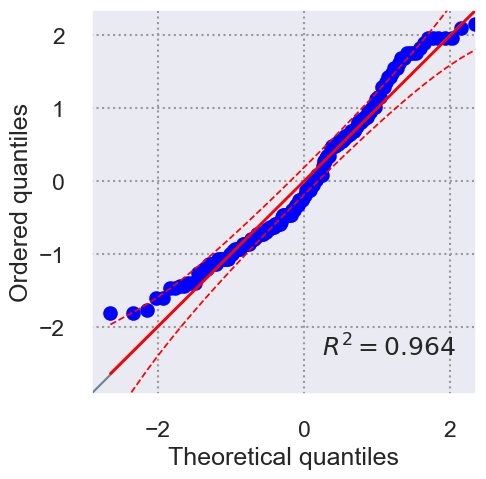

In [65]:
fig, ax1 = plt.subplots(figsize=(9,5))
_ = qqplot(amostra_maior['body_mass_g'], dist='norm', ax=ax1)
plt.show()

Pingouins também oferece teste de poder para teste t, anova e chi



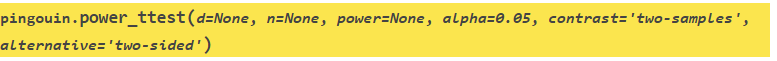

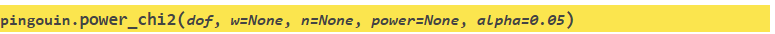

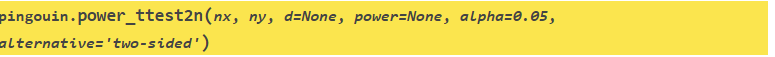


Gráfico para correlação intra sujeitos - avaliar relação entre duas variáveis quebradas por alguma categoria


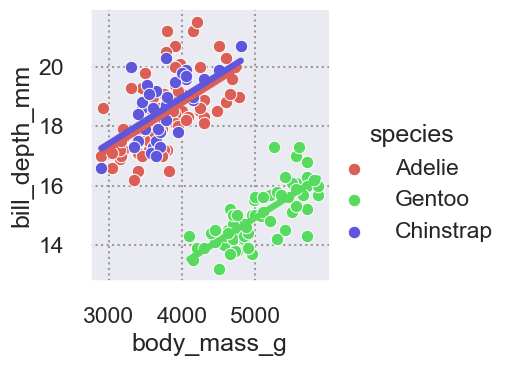

In [66]:
from pingouin import plot_rm_corr


plot_rm_corr(data=amostra_maior, x='body_mass_g', y='bill_depth_mm',
                    subject='species', legend=True)

                    
plt.show()

## Anova é um teste paramétrico cujo principal intuito (one way ANOVA) é compara média de três ou mais grupos sobre uma variável quantitativa

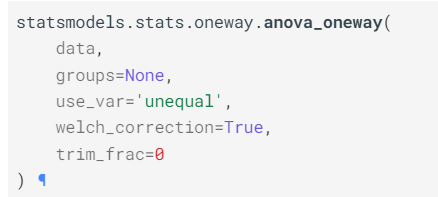

Vale entender, que data são seus dados em arrays, groups os grupos analisados. Use_var = 'unequal' e welch_correction = True quando seus dados possuem variâncias diferentes entre grupos (Teste de Levene)

A fórmula de ANOVA se da por:

### Teste ANOVA (Análise de Variância)

A fórmula geral para o teste ANOVA pode ser expressa como:

$$ F = \frac{MS*{\text{entre}}}{MS*{\text{dentro}}} = \frac{\text{variabilidade entre grupos}}{\text{variabilidade dentro dos grupos}} $$

**Onde:**

- $MS_{\text{entre}}$ é a média dos quadrados entre grupos.
- $MS_{\text{dentro}}$ é a média dos quadrados dentro dos grupos.

### Fórmula dos Quadrados para ANOVA

As fórmulas dos quadrados para ANOVA são:

- **Soma Total dos Quadrados (SQT):**
  $$ SQT = \sum (X\_{ij} - \bar{X})^2 $$

- **Soma dos Quadrados Entre Grupos (SQE):**
  $$ SQE = \sum n_j (\bar{X}\_j - \bar{X})^2 $$

- **Soma dos Quadrados Dentro dos Grupos (SQR):**
  $$ SQR = \sum \sum (X\_{ij} - \bar{X}\_j)^2 $$

**Onde:**

- $X_{ij}$ são os valores individuais observados.
- $\bar{X}$ é a média geral de todos os valores.
- $\bar{X}_j$ é a média do grupo $j$.
- $n_j$ é o tamanho do grupo $j$.

### Teste F para ANOVA

O teste F para ANOVA usa a razão F e pode ser interpretado como:

$$ F = \frac{MS*{\text{entre}}}{MS*{\text{dentro}}} $$

onde $MS_{\text{entre}}$ e $MS_{\text{dentro}}$ são definidos como:

$$ MS*{\text{entre}} = \frac{SQE}{k - 1} $$
$$ MS*{\text{dentro}} = \frac{SQR}{N - k} $$

**Onde:**

- $k$ é o número de grupos (ou níveis) do fator.
- $N$ é o número total de observações.
- $SQE$ é a soma dos quadrados entre grupos.
- $SQR$ é a soma dos quadrados dentro dos grupos.

A estatística F compara a variabilidade entre os grupos


In [67]:
from statsmodels.stats.oneway import anova_oneway, effectsize_oneway, confint_effectsize_oneway


data = {
    'species': ['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo'],
    'body_mass_g': [3750, 3800, 3250, 3700, 3450, 3650, 5000, 5200, 5100]
}

df = pd.DataFrame(data)

body_mass = data['body_mass_g']
especies = data['species']

teste_anova = anova_oneway(df['body_mass_g'], groups=df['species'])


In [68]:
print(teste_anova)


statistic = 115.30159070144141
pvalue = 0.000529800723000724
df = (2.0, 3.6172820920880016)
df_num = 2.0
df_denom = 3.6172820920880016
nobs_t = 9.0
n_groups = 3
means = [3600. 3600. 5100.]
nobs = [3. 3. 3.]
vars_ = [92500. 17500. 10000.]
use_var = unequal
welch_correction = True
tuple = (115.30159070144141, 0.000529800723000724)


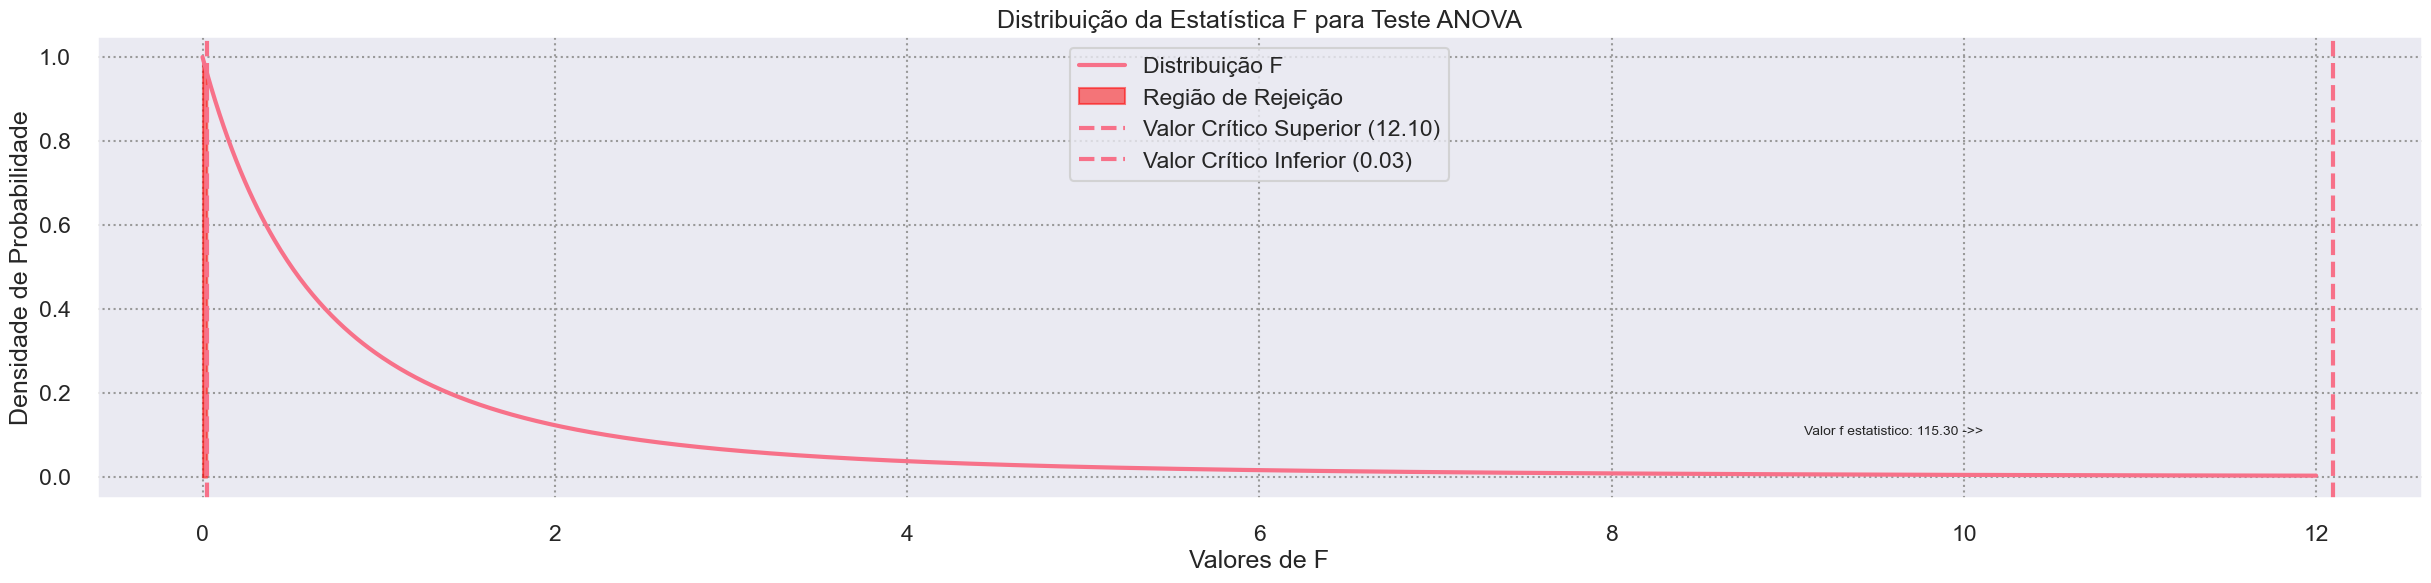

In [221]:
f = 115.30159070144141
DFG = 2.0
DFE = 3.6172820920880016

alpha = 0.05
f_critico_superior = st.f.ppf(1 - alpha/2, DFG, DFE)
f_critico_inferior = st.f.ppf(alpha/2, DFG, DFE)

x = np.linspace(0, 12, 1000)
y_f = st.f.pdf(x, DFG, DFE)

fig, ax = plt.subplots(figsize=(30, 6))

sns.lineplot(x = x, y = y_f, label='Distribuição F')
ax.fill_between(x, 0, y_f, where=(x > f_critico_superior), color='r', alpha=0.5, label='Região de Rejeição')
ax.fill_between(x, 0, y_f, where=(x < f_critico_inferior), color='r', alpha=0.5)
ax.axvline(f_critico_superior, linestyle='--', label=f'Valor Crítico Superior ({f_critico_superior:.2f})')
ax.axvline(f_critico_inferior, linestyle='--', label=f'Valor Crítico Inferior ({f_critico_inferior:.2f})')
ax.set_title('Distribuição da Estatística F para Teste ANOVA')
ax.set_xlabel('Valores de F')
ax.set_ylabel('Densidade de Probabilidade')
ax.text(x = f_critico_superior - 3, y= 0.1, s=f'Valor f estatistico: {f:.2F} ->>', size=10)
ax.legend()
ax.grid(True)

In [70]:
f = 115.30159070144141
df_f = (2.0, 3.6172820920880016)
means = np.array([3600., 3600., 5100.])
nobs = np.array([3., 3., 3.])
vars_ = np.array([92500., 17500., 10000.])
effect_size = effectsize_oneway(means, vars_, nobs, use_var='unequal')
print(f"Tamanho do Efeito: {effect_size}")
ci_effect_size = confint_effectsize_oneway(f, df_f)
print(f"Intervalo de Confiança para o Tamanho do Efeito: {ci_effect_size}")

Tamanho do Efeito: 30.344827586206893
Intervalo de Confiança para o Tamanho do Efeito: f2 = [  3.09417312 101.89763423]
eta2 = [0.75575044 0.9902816 ]
ci_omega2 = [0.58144374 0.98226927]
ci_nc = [ 20.47501641 674.28539023]
ci_f = [ 1.75902619 10.09443581]
ci_eta = [0.86933908 0.99512894]
ci_f_corrected = [ 2.1543583  12.36310848]


Um f² (tamanho do efeito) de 30% significa que aproximadamente 30% da variabilidade na variável dependente (desempenho no teste) pode ser explicada pelas diferenças entre os grupos (fatores). Porém dado que o intervalo de confiança é amplo, é difícil afirmar com precisão qual é o verdadeiro impacto dos grupos (fatores) na variável dependente. Mas sabemos que talvez esse IC amplo pode ser causa de uma comparação entre dois grupos que não tenham grandes diferenças


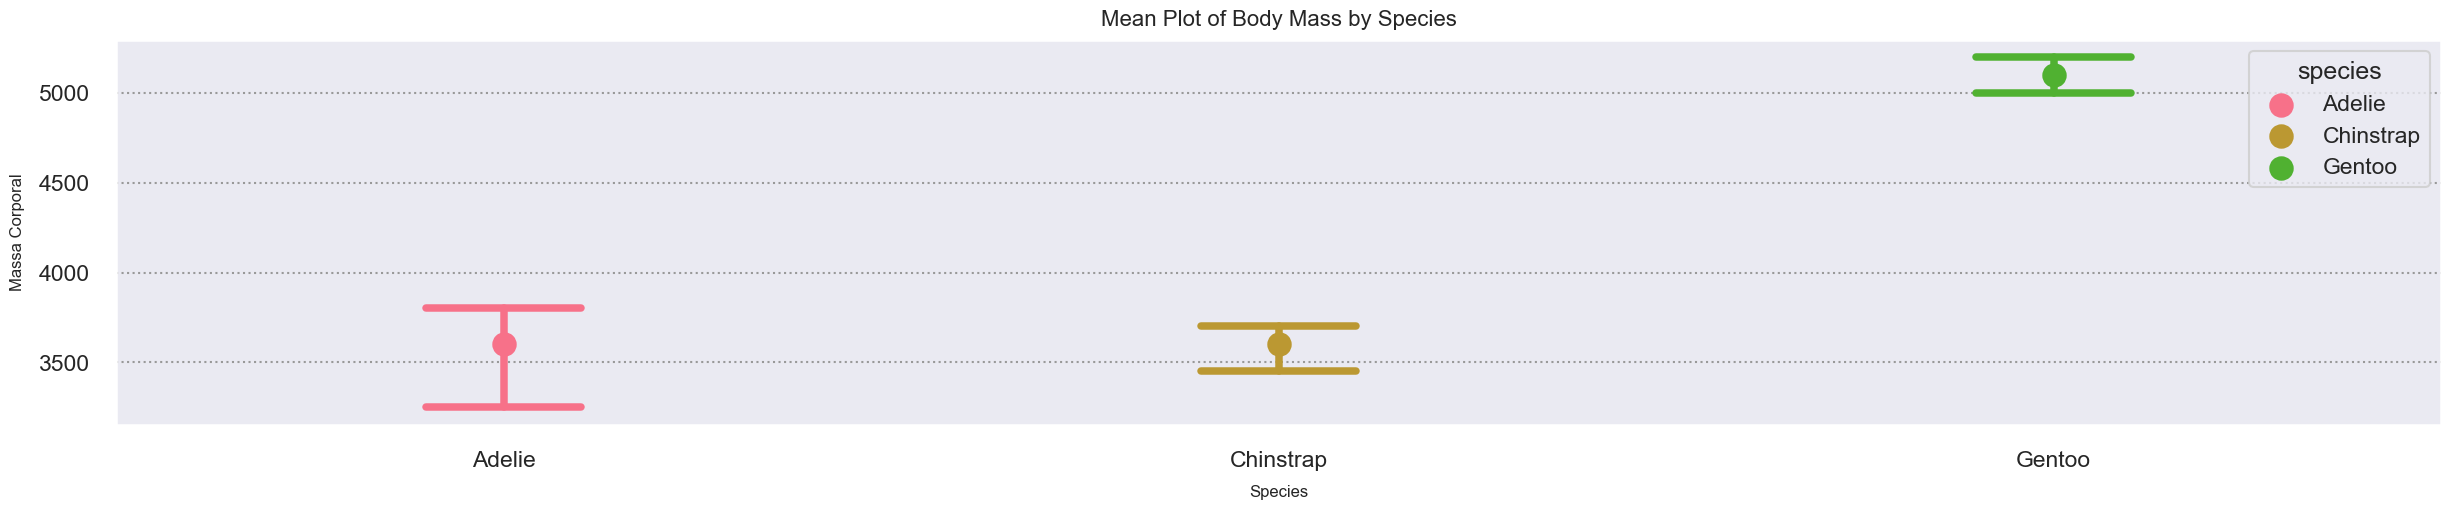

In [219]:
plt.figure(figsize=(30,5))
sns.pointplot(x='species', y='body_mass_g', data=df, capsize=0.2, join=False, hue='species')
plt.title('Mean Plot of Body Mass by Species', fontsize=16, pad=10)
plt.xlabel('Species', fontsize=12, labelpad=10)
plt.ylabel('Massa Corporal', fontsize=12, labelpad=10)
plt.show() 

## O teste de Tukey HSD nos ajuda a identificar pares de grupos com diferenças médias significativas - um bom método pré testes estatísticos

### Teste de Tukey (Intervalo de Confiança para Diferença de Médias)

O teste de Tukey é usado para comparar todas as possíveis combinações de médias em múltiplos grupos. A fórmula para o intervalo de confiança da diferença entre duas médias pode ser expressa como:

$$ \bar{x}_i - \bar{x}\_j \pm q_{\alpha, \, df*{\text{dentro}}} \cdot \sqrt{\frac{MS*{\text{dentro}}}{n}} $$

**Onde:**

- $\bar{x}_i$ e $\bar{x}_j$ são as médias de dois grupos diferentes.
- $q_{\alpha, \, df_{\text{dentro}}}$ é o valor crítico de Tukey para um nível de significância $\alpha$ e graus de liberdade do denominador $df_{\text{dentro}}$.
- $MS_{\text{dentro}}$ é a média dos quadrados dentro dos grupos.
- $n$ é o tamanho das amostras nos grupos comparados.


In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['body_mass_g'], df['species'])

In [73]:
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2  meandiff p-adj    lower     upper   reject
--------------------------------------------------------------
   Adelie Chinstrap      0.0    1.0 -501.0471  501.0471  False
   Adelie    Gentoo   1500.0 0.0002  998.9529 2001.0471   True
Chinstrap    Gentoo   1500.0 0.0002  998.9529 2001.0471   True
--------------------------------------------------------------


Um teste de Tukey nos ajuda a avaliar isso melhor. Podemos notar quais grupos possuem diferenças significativas entre si, com seu valor-p, IC das diferenças e a diferença média entre cada comparação

Agora um plot_simultaneous() ajuda a visualizar as médias de cada grupo, e seus intervalos de confiança


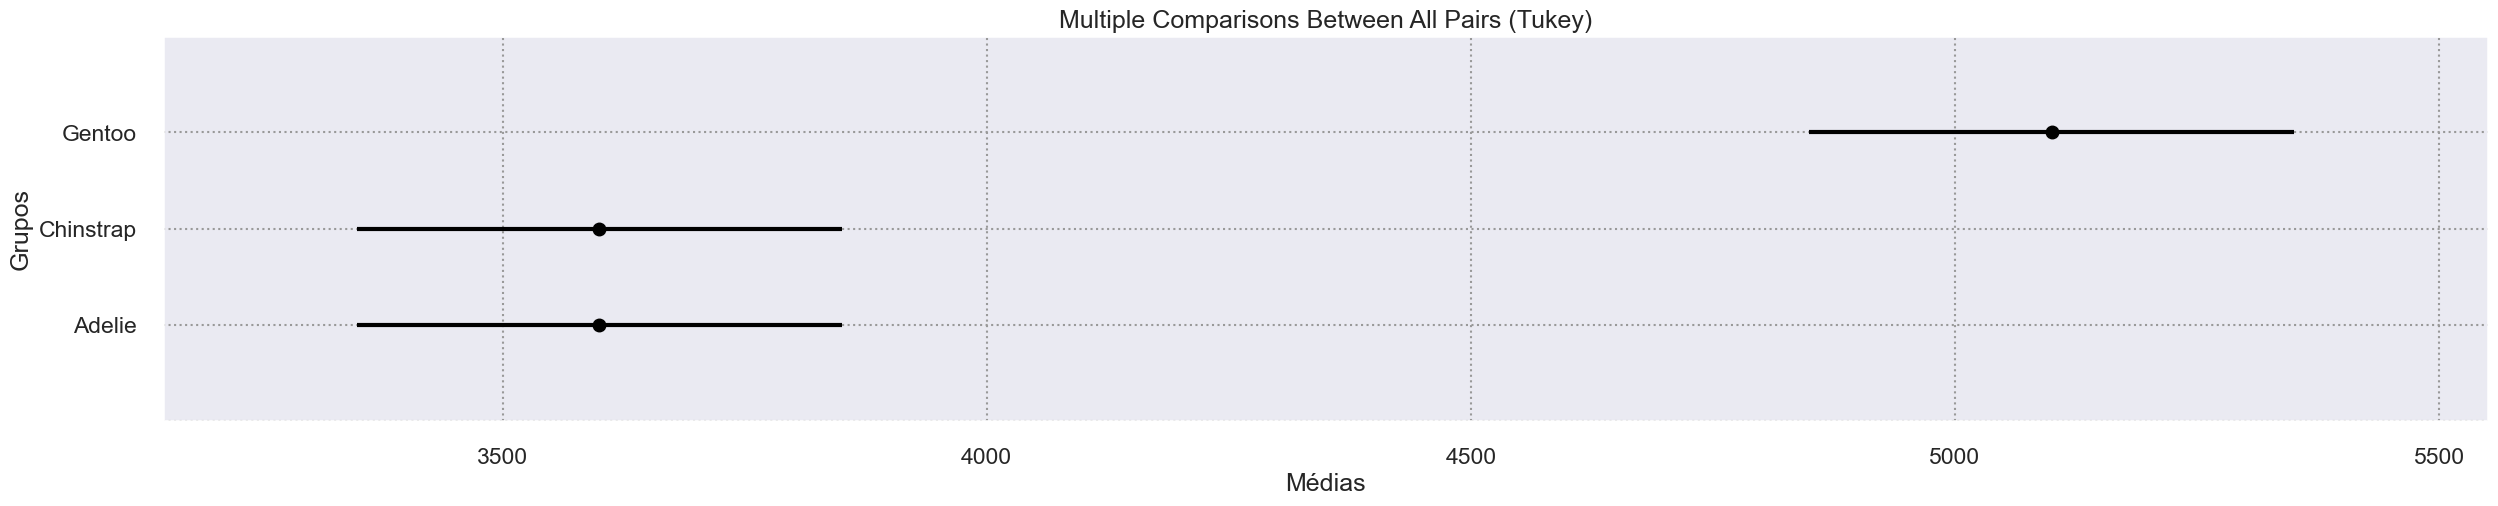

In [220]:
tukey_results.plot_simultaneous(figsize=(30, 5), xlabel='Médias', ylabel='Grupos')
plt.show()

# REGRESSÕES

## **Regressão Linear**

## O que é Regressão Linear?

### A regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (y) e uma ou mais variáveis independentes (x). O objetivo é ajustar uma linha reta que melhor represente a relação entre as variáveis.

A regressão linear é, portanto, um método de estimação de uma reta para explicar a variabilidade de uma variável independente (ou explicativa) para uma variável dependente(ou resposta)

A estimativa da reta se dá pela reta com o menor erro residual do plano.

- Erros Residuais

Os erros residuais (ou simplesmente resíduos) são as diferenças entre os valores observados da variável dependente (os pontos de dados reais) e os valores preditos pela reta de regressão.

#### Fórmula dos Erros Residuais

Para cada observação \($i$\), o erro residual \($e_i$\) é dado por:

$$
e_i = y_i - \hat{y}_i
$$

Onde:

- \($y_i$\) é o valor observado da variável dependente para a \($i$\)-ésima observação.
- \($\hat{y}_i$\) é o valor predito pela reta de regressão para a \($i$\)-ésima observação.

#### Exemplo de Cálculo dos Erros Residuais

Suponha que temos os seguintes dados de exemplo:

| \(x\) | \(y\) |
| ----- | ----- |
| 1     | 2     |
| 2     | 3     |
| 3     | 4     |

E a equação da reta de regressão é:

$$
\hat{y} = 1 + 1x
$$

Os valores preditos \($\hat{y}$\) para cada \($x$\) são:

- Para \($x = 1$\): \($\hat{y} = 1 + 1 \cdot 1 = 2$\)
- Para \($x = 2$\): \($\hat{y} = 1 + 1 \cdot 2 = 3$\)
- Para \($x = 3$\): \($\hat{y} = 1 + 1 \cdot 3 = 4$\)

Os resíduos \($e_i$\) são:

- Para \($x = 1$\): \($e_1$ = $y_1$ - $\hat{y}_1 = 2 - 2 = 0$\)
- Para \($x = 2$\): \($e_2$ = $y_2$ - $\hat{y}_2 = 3 - 3 = 0$\)
- Para \($x = 3$\): \($e_3$ = $y_3$ - $\hat{y}_3 = 4 - 4 = 0$\)

Neste caso específico, todos os resíduos são zero, indicando que a reta de regressão ajusta perfeitamente os dados.

Onde:

- \($y_i$\) é o valor observado da variável dependente para a \($i$\)-ésima observação.
- \($\hat{y}_i$\) é o valor predito pela reta de regressão para a \($i$\)-ésima observação.

### Mínimos Quadrados Ordinários (OLS)

Os Mínimos Quadrados Ordinários (OLS) são um método para estimar os coeficientes de uma regressão linear. O objetivo do OLS é encontrar os coeficientes que minimizam a soma dos quadrados dos resíduos (a diferença entre os valores observados e os valores preditos pelo modelo).

A equação da reta da regressão linear é dada por:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Onde:

- $\hat{y}$ é o valor predito da variável dependente.
- $\beta_0$ é o intercepto da reta.
- $\beta_1$ é o coeficiente angular (inclinação) da reta.
- $x$ é o valor da variável independente.

### Objetivo do OLS

O objetivo do OLS é minimizar a soma dos quadrados dos resíduos (SQE):

$$
\text{SQE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Onde:

- $y_i$ é o valor observado da variável dependente.
- $\hat{y}_i$ é o valor predito da variável dependente.
- $n$ é o número de observações.

### Estimativa dos Coeficientes

Os coeficientes $\beta_0$ e $\beta_1$ são estimados da seguinte forma:

$$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

Onde:

- $\bar{x}$ é a média dos valores de $x$.
- $\bar{y}$ é a média dos valores de $y$.

Os Mínimos Quadrados Ordinários fornecem uma maneira simples e eficiente de ajustar um modelo de regressão linear, garantindo que a linha ajustada minimize os erros de previsão.

### Pressupostos da Regressão Linear para Inferências:

- #### Linearidade entre as variáveis
- #### Distribuição Normal dos resíduos
- #### Homocedasticidade dos valores de $y$ e resíduos
- #### Independência dos erros
- #### Distribuição normal de $y$

Falhas na linearidade e normalidade dos resíduos podem afetar diretamente os coeficientes preditos e os intervalos de confiança de cada, podendo enviesar os resultados e o coeficiente de determinação
Já a heterocedasticidade pode, não só enviesar os coeficientes, como trazer resultados errados dos testes F e t, importantes para avaliar se há uma regressão e o quão confiável são os coeficientes, respectivamente

Podemos notar que a variabilidade e outliers importam muito dentro do contexto de uma regressão linear, portanto avaliar seus dados antes de uma aplicação é essencial

**Ou seja, falhas do modelo de regressão podem ser resultados de oultliers, escalas diferentes entre $x$ e $y$, além de variabilidade significativamente diferentes, estruturas de sazonalidade (há regressões específicas para quando as variáveis $x$ e $y$ possuem correlação) e relações não lineares**

### Coeficiente de Determinação $R^2$

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

O O coeficiente de determinação, frequentemente denotado como $R^2$, é uma medida estatística que indica a proporção da variabilidade da variável dependente que é explicada pelos regressores no modelo de regressão linear.
Dele você vai entender o quando sua variável $x$ explica $y$

### Agora vamos a prática


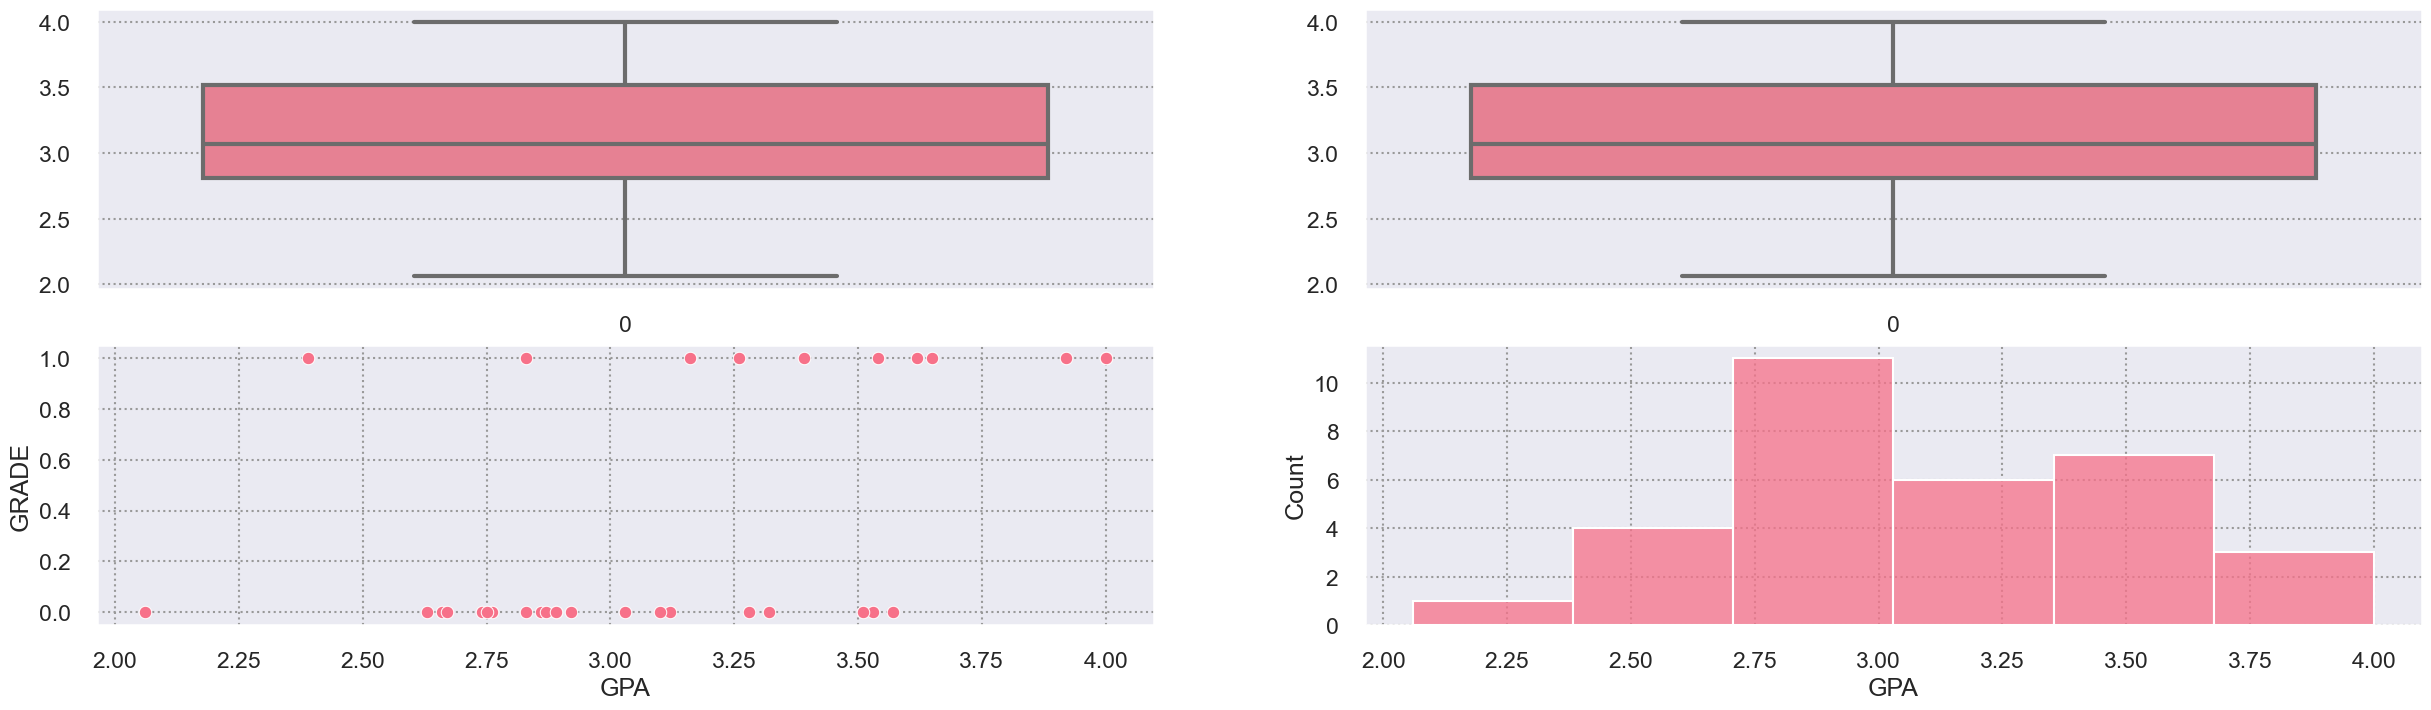

In [218]:
# Primeiro, avaliação de outliers,normalidade dos dados e correlação linear

import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
x_graphs = spector_data.exog['GPA'] 
y_graphs = spector_data.endog

fig, ax = plt.subplots(2,2,figsize=(30,8))
sns.boxplot(x_graphs, ax=ax[0,0])
sns.boxplot(x_graphs, ax=ax[0,1])
sns.scatterplot(x = x_graphs, y = y_graphs, ax=ax[1,0])
sns.histplot(x_graphs, ax=ax[1,1])
plt.show()

Sim, podemos notar que nossa variável x e y não possuem linearidade, aparentam mais terem uma relação logística, mas falaremos disso mais a frente


In [76]:
#Correlação de Pearson
corr = st.pearsonr(x_graphs, y_graphs)
corr

PearsonRResult(statistic=0.4971474369377158, pvalue=0.0037947542820355173)

## Mesmo havendo correlação podemos notar falta de linearidade nos dados


In [252]:
## Vamos usar o statsmodels para regressões lineares quando a ideia é inferência e não predição. Para previsões usamos o sklearn



spector_data = sm.datasets.spector.load()

x = spector_data.exog['GPA']
y = spector_data.endog

x = sm.add_constant(x, prepend=False) #adicionamos uma constante ao x para criarmos um coef de intercepto para nossos dados para que o intercept não seja 0

mod = sm.OLS(y, x)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     9.849
Date:                Sat, 22 Jun 2024   Prob (F-statistic):            0.00379
Time:                        19:46:09   Log-Likelihood:                -17.039
No. Observations:                  32   AIC:                             38.08
Df Residuals:                      30   BIC:                             41.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.5140      0.164      3.138      0.0

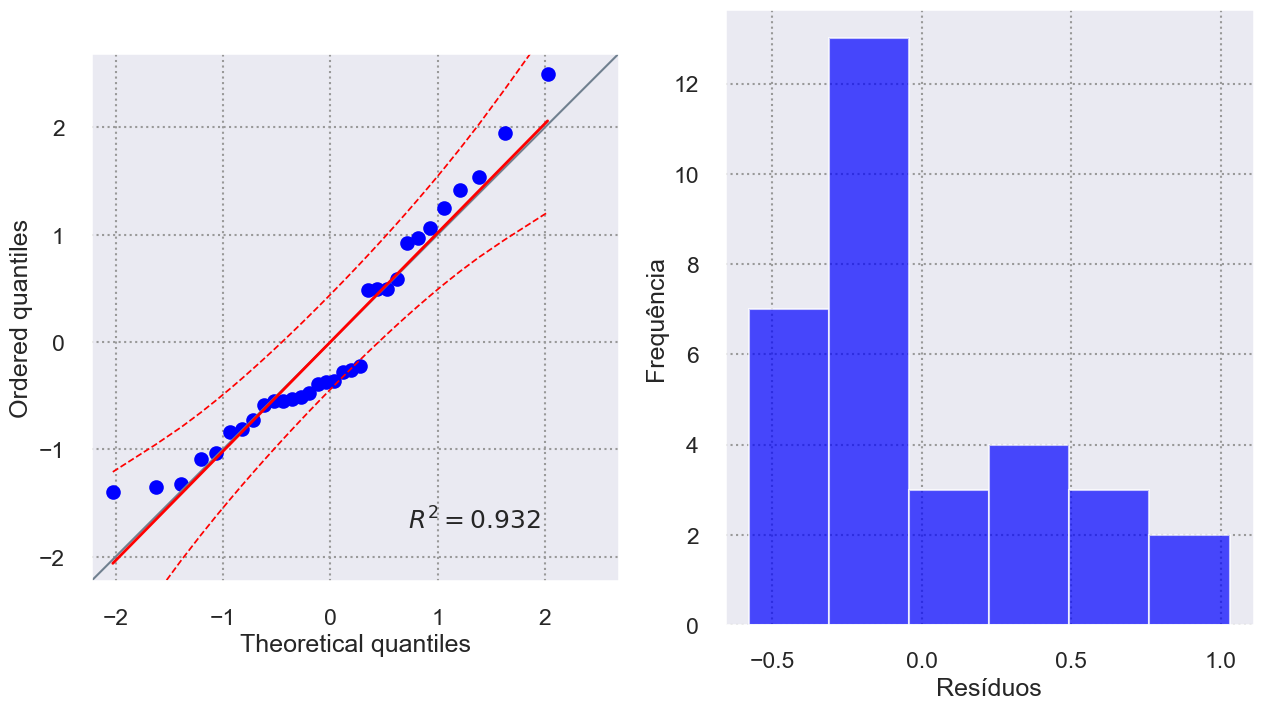

In [78]:
fig, ax = plt.subplots(1,2,figsize=(15,8))



qqplot(res.resid, dist='norm', ax=ax[0])
ax[1].hist(res.resid, bins='auto', color='blue', alpha=0.7)
ax[1].set_xlabel('Resíduos')
ax[1].set_ylabel('Frequência')




plt.show()

In [79]:
st.shapiro(res.resid)

ShapiroResult(statistic=0.9261165261268616, pvalue=0.03056328184902668)

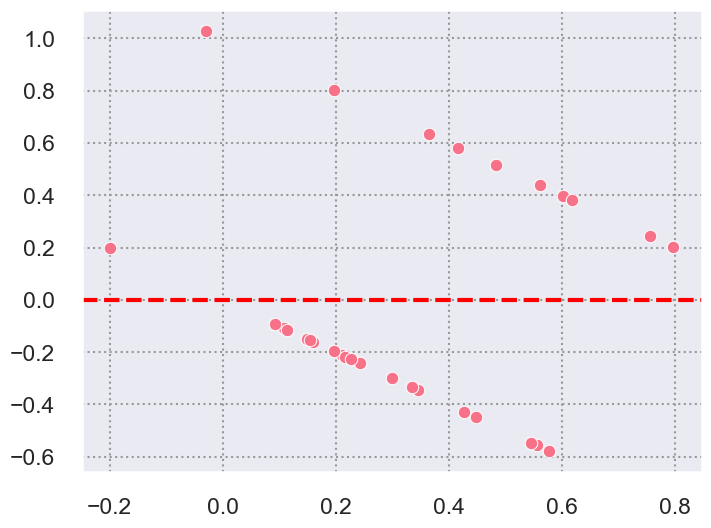

In [80]:
sns.scatterplot(x = res.fittedvalues, y = res.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Teste de White para avaliar Heterocedasticidade

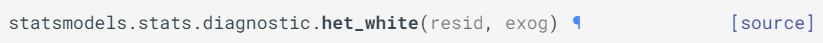

p < 0.05 - dados heterocedasticos


In [81]:
from statsmodels.stats.diagnostic import het_white
white_statistic, p_valor_white, _, _ = het_white(res.resid, x)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")

Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 0.08252118091429139
Valor-p: 0.9595790402229571


Teste de Durbin - Watson

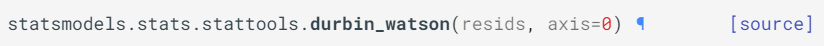

Valor DW próximo a 2 sugere que não há autocorrelação entre $x$ e $y$


In [82]:
dw_statistic = sm.stats.stattools.durbin_watson(res.resid)
print("Teste de Durbin-Watson:")
print("Estatística de teste:", dw_statistic)

Teste de Durbin-Watson:
Estatística de teste: 1.755835978921231


Lagrange Autocorrelation

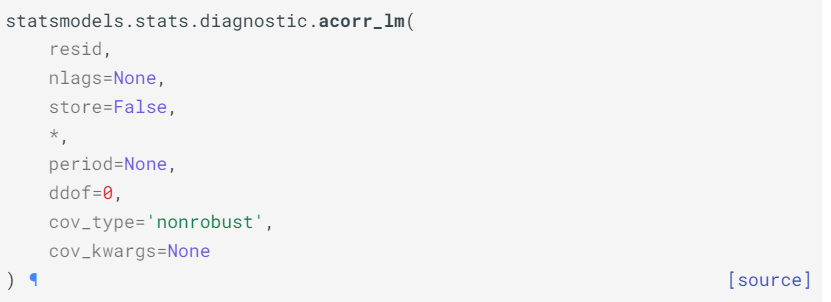

p < 0.05 - Há autocorrelação


In [83]:
from statsmodels.stats.diagnostic import acorr_lm
acorr_lm(res.resid)[3]


0.31068476272859924

<Axes: xlabel='GPA', ylabel='GRADE'>

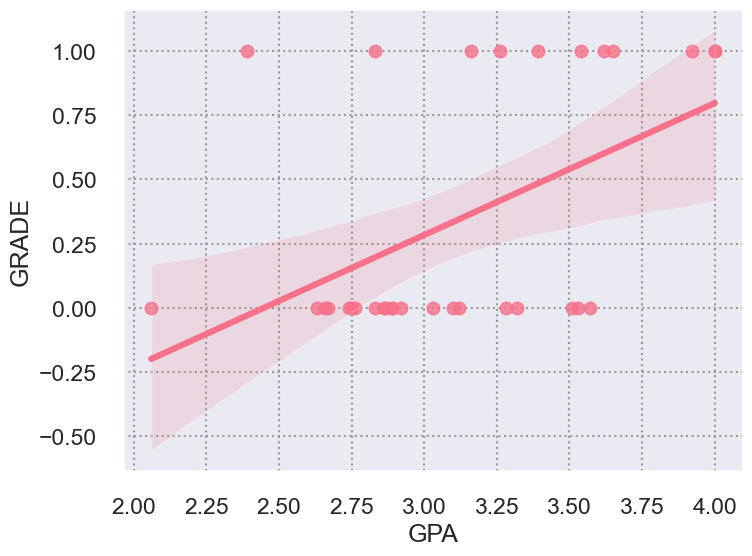

In [84]:
sns.regplot( x = x['GPA'],  y = y)

### Caso nosso modelo não passe apenas no teste de homocedasticidade, podemos usar parâmetros diferentes de correção robusta

chamamos a modelo.get_robustcov_results(cov_type='')

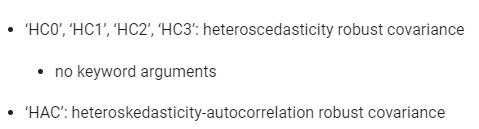


In [274]:
robust_results = res.get_robustcov_results(cov_type='HC1')
print(robust_results.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.222  
Dependent Variable: GRADE            AIC:                38.0776
Date:               2024-06-22 20:05 BIC:                41.0091
No. Observations:   32               Log-Likelihood:     -17.039
Df Model:           1                F-statistic:        10.10  
Df Residuals:       30               Prob (F-statistic): 0.00343
R-squared:          0.247            Scale:              0.18115
------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
GPA       0.5140     0.1618    3.1777   0.0034    0.1837    0.8444
const    -1.2586     0.5145   -2.4460   0.0205   -2.3094   -0.2078
----------------------------------------------------------------
Omnibus:               3.152       Durbin-Watson:          1.756
Prob(Omnibus):         0.207    

Podemos concluir que mesmo havendo um modelos que tenha passado em todos os testes, apenas pela linearidade ter falhada podemos notar o quão mal nossa reta explica os dados


## Regressão linear Múltipla

## **Regressão Múltipla**

A regressão múltipla é uma técnica estatística utilizada para estudar a relação entre uma variável dependente \( Y \) e duas ou mais variáveis independentes \( X_1, X_2, \ldots, X_p \). A fórmula geral para um modelo de regressão múltipla é dada por:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon $$

onde:

- \( $\beta_0$ \) é o intercepto,
- \( $\beta_1$, $\beta_2$, $\ldots$, $\beta_p$ \) são os coeficientes das variáveis independentes,
- \( $X_1$, $X_2$, $\ldots, X_p$ \) são as variáveis independentes,
- \( $\epsilon$ \) é o erro aleatório.

Portanto a regressão múltipla é a linear porém se considerando diversas variáveis em $x$ sendo $x_1$, $x_2$, $x_3$...

Vale ressaltar que as análises dos pressupostos precisam ser iguais mas na múltipla analisamos a colinearidade das variáveis explicativas

- ### Colinearidade

A colinearidade (ou multicolinearidade) ocorre quando duas ou mais variáveis independentes em um modelo de regressão múltipla estão altamente correlacionadas entre si. Isso pode levar a problemas na estimação dos coeficientes do modelo.

#### Fórmula de Colinearidade

A colinearidade entre variáveis independentes pode ser avaliada através do fator de inflação da variância (VIF), calculado pela fórmula:

$$ \text{VIF}\_{j} = \frac{1}{1 - R_j^2} $$

onde:

- \( $\text{VIF}_{j}$ \) é o fator de inflação da variância para a variável independente \( $X_j$ \),
- \( $R_j^2$ \) é o coeficiente de determinação ao regressar \( $X_j$ \) sobre todas as outras variáveis independentes.

Valores elevados de VIF (geralmente acima de 10) indicam uma alta colinearidade entre a variável \( $X_j$ \) e as outras variáveis independentes do modelo.

Esta fórmula ajuda a identificar e avaliar problemas de colinearidade em modelos de regressão múltipla.


In [124]:
from statsmodels.datasets.longley import load_pandas

y = load_pandas().endog
X = load_pandas().exog
x = sm.add_constant(X)
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           4.98e-10
Time:                        17:34:51   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

In [86]:
resid_norm = st.shapiro(res.resid)
dw_statistic = sm.stats.stattools.durbin_watson(res.resid)
white_statistic, p_valor_white, _, _ = het_white(res.resid, x)
autocorr = acorr_lm(res.resid)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.46786877512931824
Estatística de teste DW: 2.559487689280065
Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 16.0
Valor-p: 0.38205166150286374
Correlação: 0.4915923599960128


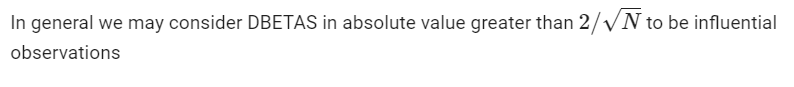

valores acima de 2/len(x) \*\* 0.5


In [87]:
infl = res.get_influence()

In [88]:
2.0 / len(x) ** 0.5

0.5

In [89]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL   dfb_GNP  dfb_UNEMP  dfb_ARMED   dfb_POP  dfb_YEAR
0   -0.016406    -0.234566 -0.045095  -0.121513  -0.149026  0.211057  0.013388
1   -0.020608    -0.289091  0.124453   0.156964   0.287700 -0.161890  0.025958
2   -0.008382     0.007161 -0.016799   0.009575   0.002227  0.014871  0.008103
3    0.018093     0.907968 -0.500022  -0.495996   0.089996  0.711142 -0.040056
4    1.871260    -0.219351  1.611418   1.561520   1.169337 -1.081513 -1.864186
5   -0.321373    -0.077045 -0.198129  -0.192961  -0.430626  0.079916  0.323275
6    0.315945    -0.241983  0.438146   0.471797  -0.019546 -0.448515 -0.307517
7    0.015816    -0.002742  0.018591   0.005064  -0.031320 -0.015823 -0.015583
8   -0.004019    -0.045687  0.023708   0.018125   0.013683 -0.034770  0.005116
9   -1.018242    -0.282131 -0.412621  -0.663904  -0.715020 -0.229501  1.035723
10   0.030947    -0.024781  0.029480   0.035361   0.034508 -0.014194 -0.030805
11   0.005987    -0.079727  0.030276  -0.008883  -0.

print(infl.summary_frame().filter(regex="dfb")) nos ajuda a verificar quais varíaveis são altamente influentes nos dados infl = res.get_influence() (os valores que estiverem acima de 2.0 / len(x) \*\* 0.5 são influentes)


In [90]:
## Teste VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

ds=pd.Series([variance_inflation_factor(x.values, i)   
               for i in range(x.shape[1])],   
              index=x.columns)  
print(ds)  

const      1.364980e+08
GNPDEFL    1.355324e+02
GNP        1.788513e+03
UNEMP      3.361889e+01
ARMED      3.588930e+00
POP        3.991510e+02
YEAR       7.589806e+02
dtype: float64


In [91]:
x_graphs = X
y_graphs = y

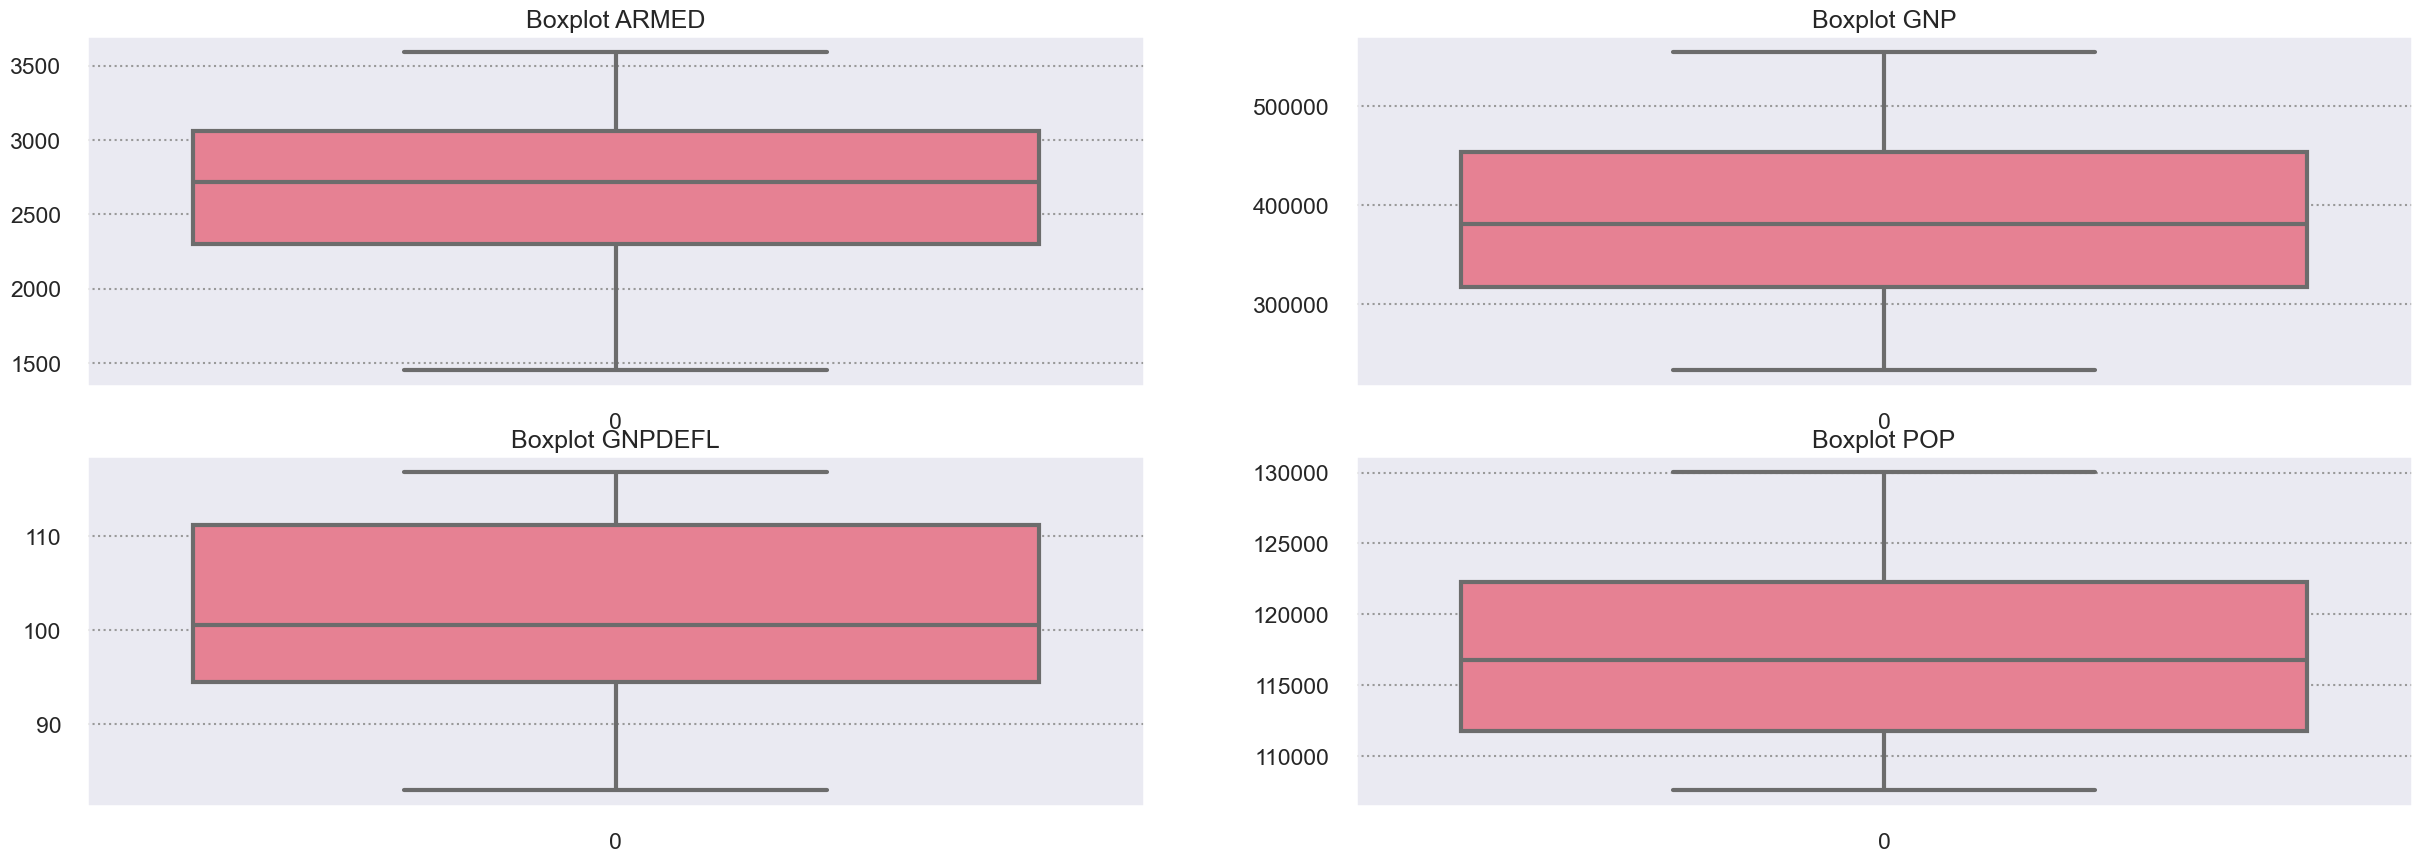

In [213]:
fig, ax = plt.subplots(2,2,figsize=(30,10))

ax[0,0].set_title('Boxplot ARMED')
ax[0,1].set_title('Boxplot GNP')
ax[1,0].set_title('Boxplot GNPDEFL')
ax[1,1].set_title('Boxplot POP')


sns.boxplot(x_graphs['ARMED'], ax=ax[0,0])
sns.boxplot(x_graphs['GNP'], ax=ax[0,1])
sns.boxplot(x_graphs['GNPDEFL'], ax=ax[1,0])
sns.boxplot(x_graphs['POP'], ax=ax[1,1])


plt.show()

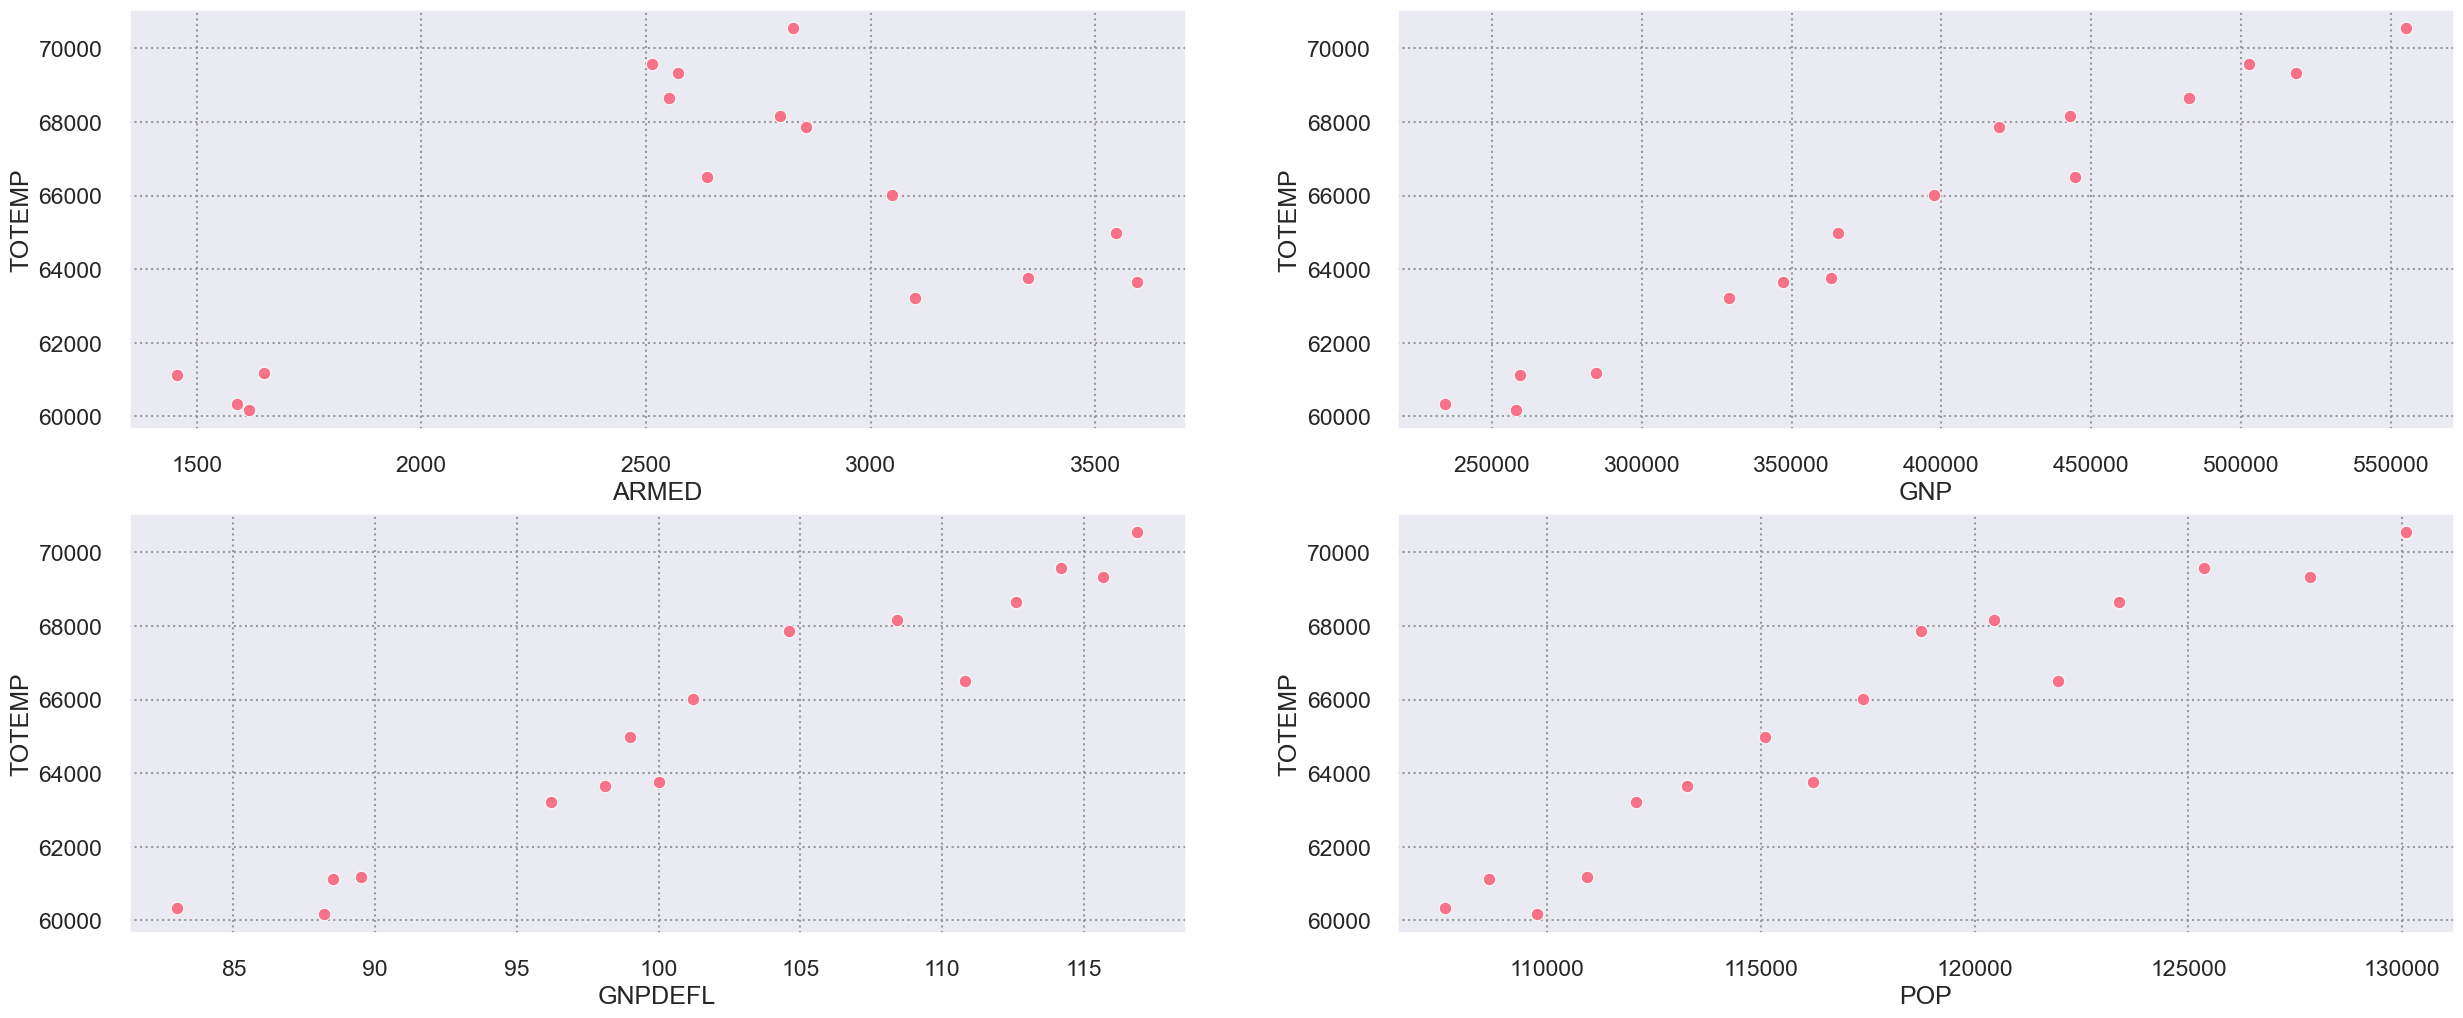

In [215]:
fig, ax = plt.subplots(2,2,figsize=(30,12))
sns.scatterplot(x=x_graphs['ARMED'], y=y_graphs, ax=ax[0,0])
sns.scatterplot(x=x_graphs['GNP'], y=y_graphs, ax=ax[0,1])
sns.scatterplot(x=x_graphs['GNPDEFL'], y=y_graphs, ax=ax[1,0])
sns.scatterplot(x=x_graphs['POP'], y=y_graphs, ax=ax[1,1])
plt.show()

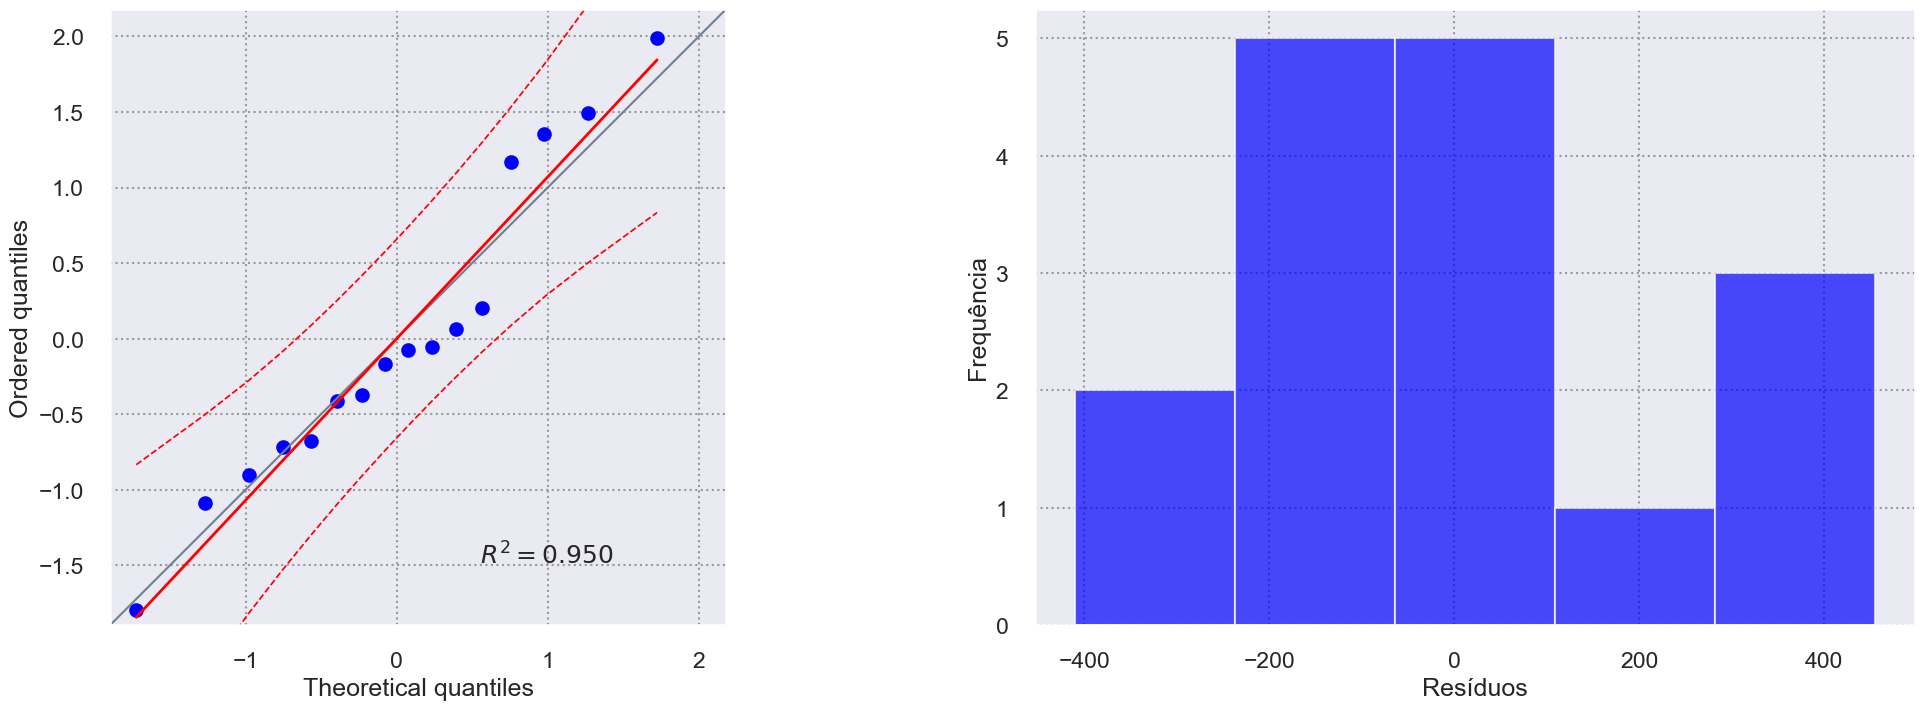

In [216]:
fig, ax = plt.subplots(1,2,figsize=(25,8))



qqplot(res.resid, dist='norm', ax=ax[0])
ax[1].hist(res.resid, bins='auto', color='blue', alpha=0.7)
ax[1].set_xlabel('Resíduos')
ax[1].set_ylabel('Frequência')




plt.show()

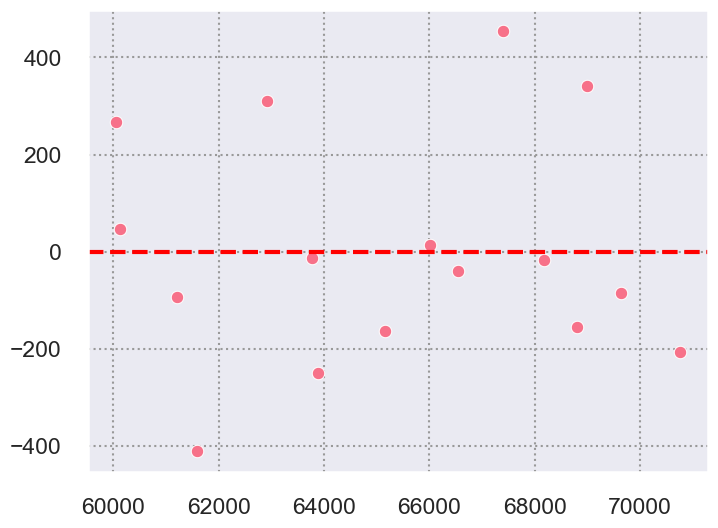

In [95]:
sns.scatterplot(x = res.fittedvalues, y = res.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Nesse poderíamos melhorar o modelo tirando a Var Year (Alta Colinearidade - Muito correlaciona, atrapalha a leitura), melhorar as escalas de $x$ e $y$ e remover a variável ARMED visto que há linearidade entre ela e $y$


## **Regressões Generalizadas**

### E quando nossa variável $y$ não tem distribuição normal? E se estiverem trabalhando com dados de contagem?

#### Nesse caso, usamos os Modelos de Regressão Generalizados (GLMs)

##### Existem situações em que o objeto de estudo central não é uma variável quantitativa contínua, impossibilitando a aplicação da tradicional regressão linear. Aqui, deve-se estar atento aos seus dados. Se a variável target for de contagem, usa-se a família Poisson ou a família Binomial Negativa (para contagens com sobredispersão). Se a variável for binária (sucesso/falha), usa-se a família Binomial. Dados positivos e contínuos, mas assimétricos, podem ser modelados com a família Gamma.

##### Regressão Generalizada serve para modelagem de regressões com heterocedasticidade e distribuições assimétricas ou por contagem e probabilidade da variável target.

$$
g(\mu_i) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}
$$

Onde:

- \( $g(\cdot)$ \) é a função de ligação.
- \( $\mu_i$ \) é a média da distribuição da variável resposta para a i-ésima observação.
- \( $\beta_0$, \beta_1, \ldots, \beta_p \) são os coeficientes do modelo.
- \( $x_{i1}$, $x_{i2}$, $\ldots$, $x_{ip}$ \) são os preditores (variáveis independentes) para a i-ésima observação.

Os modelos mais comuns são:

- Regressão WLS (Weighted Least Squares): Utilizada quando há heterogeneidade nas variâncias dos erros e a aplicação de pesos corrige essas disparidades. (heterogeneidade é comumente avliado em modelos com subpopulações onde se acredita que as variâncias de cada subpopulação é significativamente alta, nesse caso usamos teste de ANOVA ou Levene para verificar, caso haja variãncias significativamente diferentes, preferimos modelos WLS aos OLS)

- Regressão Poisson: Utilizada quando a variável resposta é contagem e segue uma distribuição de Poisson, que é comum em dados de contagem como número de eventos.

- Regressão Binomial: Utilizada para variáveis resposta binárias ou categóricas com duas categorias (como sucesso/falha), sendo equivalente à regressão logística.

- Regressão Gamma: Utilizada para variáveis resposta contínuas positivas que não seguem uma distribuição normal, como tempos de espera. Para dados com outliers não se aconselha o link log e sim link da inversa gaussiana

#### Avaliação

Esses modelos são avaliados como os modelos de regressão simples, porém são mais flexíveis aos pressupostos, podendo estarem apenas próximas de atendeter a homocedasticidade e normalidade de resíduos. Deve-se analisar p Pseudo R² e Deviance Residual para avaliar a variabilidade dos dados ajustados pelo modelo

Vale ressaltar que os modelos GLM'S auxiliam na escalabilidade dos dados, porém modelos de regressão contam com variâncias constantes, caso nota-se pontos de alta variabilidade, vale a pena fazer escalonamento com Sklearn dos dados


### No statsmodelos chamamos a função de Regressão Generalizada com sm.GLM()

#### Escolhemos um parâmetro importante para os dados: Nossa Familia de Distribuição

Por padrão

Usamos a familia conforme a aproximação com a variável $y$

sm.GLM(family=**_Param_**)

- Se contagem, normalmente Poisson -> sm.families.Poisson()

- Binárias, normalmente Binomial -> sm.families.Binomial()

- Gamma para curva assimétricas a direita -> sm.families.Gamma()

- Tweedie - sm.families.Tweedie()

- Gaussian -> sm.families.Gaussian()


In [126]:
data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:           InversePower   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sat, 22 Jun 2024   Deviance:                     0.087389
Time:                        17:35:15   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0

Estatística D: 0.12662714795145902, Valor-p: 0.6381372762472932


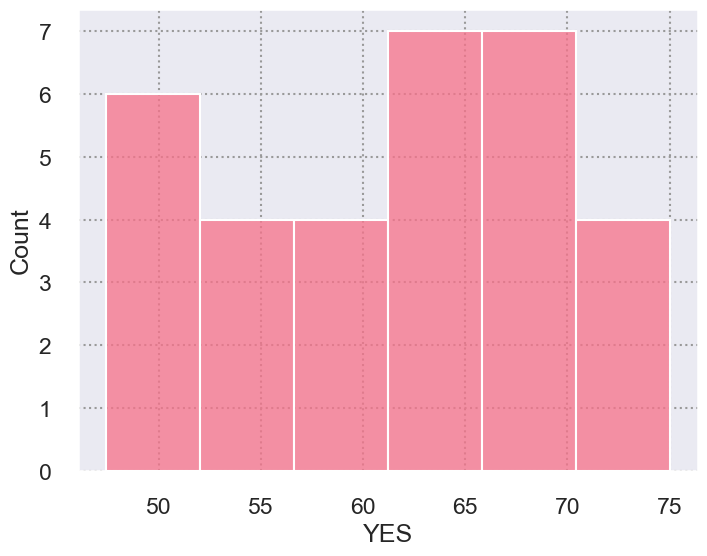

In [127]:
sns.histplot(data.endog)
gg = st.gamma.fit(data.endog, floc=0)
d, p_value = st.kstest(data.endog, 'gamma', args=gg)
print(f'Estatística D: {d}, Valor-p: {p_value}')


### Os resíduos do GLM são calculados de forma diferente segindo a fórmula:

$
\text{resid\_deviance} = \sqrt{2 \cdot \left( \log(L_{\text{null}}) - \log(L_{\text{full}}) \right)}
$

Onde:

- \( $L_{\text{null}}$ \) é o log-likelihood do modelo nulo (sem preditores).
- \( $L_{\text{full}}$ \) é o log-likelihood do modelo completo (com preditores).


In [128]:
resid_norm = st.shapiro(gamma_results.resid_deviance)
dw_statistic = sm.stats.stattools.durbin_watson(gamma_results.resid_deviance)
white_statistic, p_valor_white, _, _ = het_white(gamma_results.resid_deviance, data.exog)
autocorr = acorr_lm(gamma_results.resid_deviance)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.6690750122070312
Estatística de teste DW: 1.6547397224982268
Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 31.999999999995346
Valor-p: 0.41674402994576815
Correlação: 0.9146426499369611


In [129]:
ds=pd.Series([variance_inflation_factor(data.exog.values, i)   
               for i in range(data.exog.shape[1])],   
              index=data.exog.columns)  
print(ds)  

const                 4121.526821
COUTAX                  97.875913
UNEMPF                  54.517275
MOR                      2.593148
ACT                      1.871694
GDP                      1.254730
AGE                      1.546216
COUTAX_FEMALEUNEMP      74.344469
dtype: float64


##### O teste F é feito fora nos modelos GLM -> buscamos p_value < 0.05


In [130]:
f_test = gamma_results.f_test(data.exog)

In [131]:
display(f_test)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1113.9348980091017, p=6.36645845736761e-29, df_denom=24, df_num=8>

Valeria a pena retirar as colunas COUTAX, UNEMPF e COUTAX_FEMALEUNEMP


## Regressões Robustas

### E quando não posso remover outliers dos meus dados ou meus dados não passam dos pressupostos?

#### Nesse caso optamos por regressões robustas que, também podem ser escolhas quando, após a aplicação de uma regressão linear simples, nossos resíduos não tiveram normalidade e notamos heterocedasticidade nos dados

Nesse caso a Avaliação dos modelos se dão por medições BIC e AIC, a ideia dos Modelos Robustos é aplicar diversos modelos e ver qual melhor se encaixa em seus dados e também por resíduos robustos e comparando aos modelos OLS

Alguns exemplos, são:

- #### WLS 

$$
\min_{\beta} \sum_{i=1}^{n} w_i (y_i - x_i^T \beta)^2
$$

- #### Robust M-estimators

$$
\rho(r_i) =
\begin{cases}
\frac{1}{2} r_i^2, & \text{se } |r_i| \leq k \\
k(|r_i| - \frac{1}{2} k), & \text{se } |r_i| > k
\end{cases}
$$

- #### Bisquare

$$
\rho(r_i) =
\begin{cases}
c^2 \left( 1 - \left( 1 - \left( \frac{r_i}{c} \right)^2 \right)^3 \right), & \text{se } |r_i| \leq c \\
c^2, & \text{se } |r_i| > c
\end{cases}
$$

- #### Hubert

$$
\rho(r_i) =
\begin{cases}
\frac{1}{2} r_i^2, & \text{se } |r_i| \leq k \\
k (|r_i| - \frac{1}{2} k), & \text{se } |r_i| > k
\end{cases}
$$

- #### Resíduos Robustos:

$$
r_i = \frac{\rho'(r_i)}{w_i} \cdot \frac{y_i - x_i^T \hat{\beta}}{\sqrt{1 - h_{ii}}}
$$


In [132]:
##Primeiro Modelo

data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)
rlm_model = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              STACKLOSS   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 22 Jun 2024                                         
Time:                        17:35:33                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0265      9.792     -4.190      0.0

In [133]:
rlm_results.conf_int()

0          1
const     -60.218267 -21.834730
AIRFLOW     0.611818   1.046951
WATERTEMP   0.332334   1.519798
ACIDCONC   -0.379995   0.124302

In [134]:
rlm_results.f_test(data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=294.6379980468231, p=1.869160782560137e-15, df_denom=17, df_num=4>

In [135]:
rlm_results.t_test(data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            38.9497      1.466     26.568      0.000      36.076      41.823
c1            39.0775      1.505     25.963      0.000      36.128      42.027
c2            32.8228      1.116     29.422      0.000      30.636      35.009
c3            21.4982      0.957     22.464      0.000      19.623      23.374
c4            19.6461      0.610     32.203      0.000      18.450      20.842
c5            20.5722      0.743     27.682      0.000      19.116      22.029
c6            20.7312      1.250     16.585      0.000      18.281      23.181
c7            20.7312      1.250     16.585      0.000      18.281      23.181
c8            17.2546      1.000     17.262      0.000      15.296      19.214

In [136]:
resid_norm = st.shapiro(rlm_results.resid)
dw_statistic = sm.stats.stattools.durbin_watson(rlm_results.resid)
white_statistic, p_valor_white, _, _ = het_white(rlm_results.resid, data.exog)
autocorr = acorr_lm(rlm_results.resid)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.14562667906284332
Estatística de teste DW: 1.5368256660090829
Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 15.253430155017229
Valor-p: 0.08420579342424861
Correlação: 0.8067229627368446


In [137]:
##Segundo Modelo

rlm_model2 = sm.RLM(data.endog, data.exog, M=sm.robust.norms.LeastSquares())
rlm_results2 = rlm_model2.fit()
print(rlm_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              STACKLOSS   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 22 Jun 2024                                         
Time:                        17:35:43                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0265      9.792     -4.190      0.0

In [138]:
rlm_results2.conf_int()

0          1
const     -63.235400 -16.603949
AIRFLOW     0.451323   0.979957
WATERTEMP   0.573972   2.016600
ACIDCONC   -0.458453   0.154208

In [139]:
rlm_results2.f_test(data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=198.18531719424595, p=5.09753881645461e-14, df_denom=17, df_num=4>

In [140]:
rlm_results2.t_test(data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            38.7654      1.781     21.765      0.000      35.275      42.256
c1            38.9175      1.829     21.284      0.000      35.334      42.501
c2            32.4445      1.355     23.939      0.000      29.788      35.101
c3            22.3022      1.163     19.182      0.000      20.023      24.581
c4            19.7117      0.741     26.595      0.000      18.259      21.164
c5            21.0069      0.903     23.268      0.000      19.237      22.776
c6            21.3895      1.519     14.085      0.000      18.413      24.366
c7            21.3895      1.519     14.085      0.000      18.413      24.366
c8            18.1444      1.214     14.942      0.000      15.764      20.524

In [141]:
resid_norm = st.shapiro(rlm_results2.resid)
dw_statistic = sm.stats.stattools.durbin_watson(rlm_results2.resid)
white_statistic, p_valor_white, _, _ = het_white(rlm_results2.resid, data.exog)
autocorr = acorr_lm(rlm_results2.resid)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.8186475038528442
Estatística de teste DW: 1.4851310343413346
Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 15.028437705507239
Valor-p: 0.09015779753361045
Correlação: 0.9318956411593247


# Regressões Logística e Probit

## Regressão Logística

A regressão logística é um modelo estatístico usado para modelar a probabilidade de ocorrência de um evento binário em função de variáveis explicativas. É amplamente utilizada em diversas áreas, como ciências sociais, biologia, medicina, entre outras.

### Fórmula da Regressão Logística

A função logística (ou sigmoide) é utilizada para transformar a combinação linear das variáveis independentes (\( $X$ \)) em uma probabilidade (\( $p$ \)):

$$ p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k)}} $$

Onde:

- \( $p$ \) é a probabilidade de sucesso (evento ocorrer),
- \( $e$ \) é a base do logaritmo natural,
- \( $\beta_0$, $\beta_1$, $\ldots$, $\beta_k$ \) são os coeficientes a serem estimados,
- \( $X_1$, $X_2$, $\ldots, X_k$ \) são as variáveis independentes.

### Métodos de Cálculo

Os coeficientes \( $\beta$ \) são estimados usando métodos de otimização, como o método da máxima verossimilhança.

---

## Regressão Probit

A regressão Probit é outro modelo utilizado para análise de dados binários, onde a função de distribuição cumulativa normal é aplicada.

### Fórmula da Regressão Probit

Na regressão Probit, a função de distribuição cumulativa normal (\( $\Phi$ \)) é usada para modelar a probabilidade:

$$ p = \Phi(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k) $$

Onde:

- \( $\Phi$ \) é a função de distribuição cumulativa normal padrão,
- \( $p$ \) é a probabilidade de sucesso,
- \( $\beta_0$, $\beta_1$, $\ldots$, $\beta_k$ \) são os coeficientes a serem estimados,
- \( $X_1$, $X_2$, $\ldots$, $X_k$ \) são as variáveis independentes.

### Métodos de Cálculo

Assim como na regressão logística, os coeficientes \( $\beta$ \) na regressão Probit são estimados usando métodos de máxima verossimilhança.

### Avaliação

Os métodos de avaliação são idênticos aos métodos das regressões GLM, analisamos os resíduo de deviance e testes de homocedasticidade. Porém, os modelos logísticos e probabilísticos não assumem distribuição normal dos resíduos, mas grandes resíduos podem impactar seus modelos, portando vale a análise e a heterecedasticidade são menos comuns em modelos de regressões logit e probit, mas se vistos e forem muito discrepantes, vale uma transformação dos dados ou uso de clusters


In [144]:
spector_data = sm.datasets.spector.load_pandas()
spector_data.exog = sm.add_constant(spector_data.exog)
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.3740
Time:                        17:38:20   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.

In [195]:
## Criando df para montar apenas o gráfico
X_g = sm.add_constant(spector_data.exog['GPA'])
y_g = spector_data.endog
dff = pd.DataFrame({'GPA': spector_data.exog['GPA'], 'GRADE': y_g})

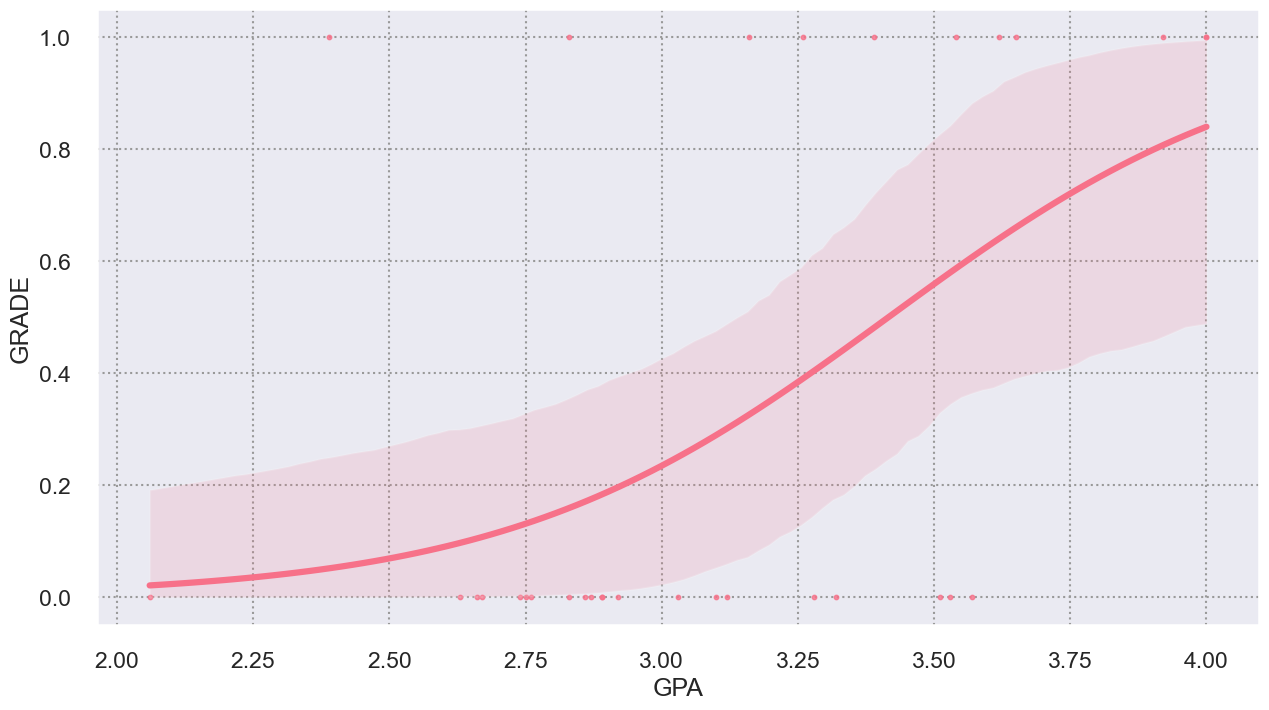

In [205]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x='GPA', y='GRADE', data=dff, logistic=True, scatter_kws={'s': 10}, ax=ax)
plt.show()

In [154]:
resid_norm = st.shapiro(logit_res.resid_dev)
dw_statistic = sm.stats.stattools.durbin_watson(logit_res.resid_dev)
white_statistic, p_valor_white, _, _ = het_white(logit_res.resid_dev, spector_data.exog)
autocorr = acorr_lm(logit_res.resid_dev)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:  Estatística de teste: {white_statistic} - Valor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.24211661517620087
Estatística de teste DW: 2.3060705505332355
Teste de White (Breusch-Pagan) para Homocedasticidade:  Estatística de teste: 10.783664469521977 - Valor-p: 0.21426092764626112
Correlação: 0.5222116293377403


In [156]:
logit_res.f_test(spector_data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.218282215504907, p=0.0926082854567981, df_denom=28, df_num=4>

In [163]:
logit_res.t_test(spector_data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -3.6007      1.229     -2.931      0.003      -6.009      -1.193
c1            -2.7604      0.986     -2.798      0.005      -4.694      -0.827
c2            -1.4679      0.764     -1.920      0.055      -2.966       0.030
c3            -3.6272      1.788     -2.029      0.042      -7.131      -0.123
c4             0.2814      1.158      0.243      0.808      -1.989       2.552
c5            -3.3210      1.278     -2.599      0.009      -5.825      -0.817
c6            -3.6036      1.333     -2.704      0.007      -6.216      -0.992
c7            -2.9121      1.024     -2.845      0.004      -4.918      -0.906
c8            -2.0793      0.929     -2.237      0.025      -3.901      -0.258

In [166]:
print(logit_res.aic)
print(logit_res.bic)

33.77926844426283
39.64221205546174


In [169]:
spector_data = sm.datasets.spector.load_pandas()
spector_data.exog = sm.add_constant(spector_data.exog)
probit_mod = sm.Probit(spector_data.endog, spector_data.exog)
probit_res = probit_mod.fit()
print(probit_res.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                         Probit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.3775
Time:                        17:52:14   Log-Likelihood:                -12.819
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001405
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4523      2.542     -2.931      0.003     -12.435      -2.469
GPA            1.6258      0.

In [170]:
resid_norm = st.shapiro(probit_res.resid_dev)
dw_statistic = sm.stats.stattools.durbin_watson(probit_res.resid_dev)
white_statistic, p_valor_white, _, _ = het_white(probit_res.resid_dev, spector_data.exog)
autocorr = acorr_lm(probit_res.resid_dev)

print(f'P_value Shapiro: {resid_norm[1]}')
print("Estatística de teste DW:", dw_statistic)
print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:  Estatística de teste: {white_statistic} - Valor-p: {p_valor_white}")
print(f'Correlação: {autocorr[3]}')

P_value Shapiro: 0.33784008026123047
Estatística de teste DW: 2.3270148481490445
Teste de White (Breusch-Pagan) para Homocedasticidade:  Estatística de teste: 11.340025045957333 - Valor-p: 0.18316708441478008
Correlação: 0.48575556600265


In [171]:
probit_res.f_test(spector_data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.813525010279566, p=0.0442575671622929, df_denom=28, df_num=4>

In [172]:
probit_res.t_test(spector_data.exog)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.0931      0.636     -3.293      0.001      -3.339      -0.847
c1            -1.6157      0.524     -3.085      0.002      -2.642      -0.589
c2            -0.8782      0.437     -2.011      0.044      -1.734      -0.022
c3            -2.0842      0.999     -2.086      0.037      -4.043      -0.126
c4             0.1372      0.698      0.197      0.844      -1.231       1.505
c5            -1.9231      0.683     -2.815      0.005      -3.262      -0.584
c6            -2.0857      0.703     -2.966      0.003      -3.464      -0.708
c7            -1.6999      0.539     -3.153      0.002      -2.756      -0.643
c8            -1.2329      0.520     -2.369      0.018      -2.253      -0.213

In [173]:
print(probit_res.aic)
print(probit_res.bic)

33.637608137778884
39.50055174897779
